#  1. Wrangling - ingestion, meta-analysis, and type treatment

## 1.0 Libraries and options

In [1]:
# Libraries used in the notebook

# STL
import os 
import re
import math
from collections import Counter

# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# Statistics
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

# Model Selection
from sklearn.model_selection import train_test_split

# Options for prints
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Colors to represent
nova_green = '#BED62F'
nova_dark_grey = '#'

%config Completer.use_jedi = True

## 1.1 Loading the Data

The data is loaded and the head and tail are checked.

In [2]:
df = pd.read_csv('../data/train_data.csv', low_memory=False)

In [3]:
test_df = pd.read_csv('../data/test_data.csv', low_memory=False)

In [4]:
df.tail()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date C-3 Date                   Carrier Name Carrier Type  Claim Identifier Claim Injury Type County of Injury COVID-19 Indicator District Name First Hearing Date Gender  IME-4 Count  Industry Code       Industry Code Description Medical Fee Region  OIICS Nature of Injury Description  WCIO Cause of Injury Code  WCIO Cause of Injury Description  WCIO Nature of Injury Code WCIO Nature of Injury Description  WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  Number of Dependents
593466           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         327160035               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                NaN               NaN                   NaN
593467    2022-12-13           72.0                              N    2022-12-31                       N                  0.0      1950.0  2022-12-31      NaN  TECHNOLOGY INSURANCE CO. INC.  1A. PRIVATE           6165075       2. NON-COMP         SULLIVAN                  N    BINGHAMTON                NaN      F          NaN           48.0  TRANSPORTATION AND WAREHOUSING                  I                                 NaN                       25.0  FROM DIFFERENT LEVEL (ELEVATION)                        90.0   MULTIPLE PHYSICAL INJURIES ONLY                    -9.0                      MULTIPLE    12779                0.0  Not Work Related                   3.0
593468           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         249875936               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                NaN               NaN                   NaN
593469           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         120584215               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                NaN               NaN                   NaN
593470           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         818961390               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                N

In [5]:
display(
    df.head() # all columns are correctly loaded
    , df.tail() # no aggregators to be seen
) # looks_good

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date    C-3 Date                  Carrier Name Carrier Type  Claim Identifier Claim Injury Type County of Injury COVID-19 Indicator District Name First Hearing Date Gender  IME-4 Count  Industry Code                          Industry Code Description Medical Fee Region  OIICS Nature of Injury Description  WCIO Cause of Injury Code WCIO Cause of Injury Description  WCIO Nature of Injury Code WCIO Nature of Injury Description  WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  Number of Dependents
0    2019-12-30           31.0                              N    2020-01-01                       N                 0.00      1988.0  2019-12-31         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE                NaN      M          NaN           44.0                                       RETAIL TRADE                  I                                 NaN                       27.0     FROM LIQUID OR GREASE SPILLS                        10.0                         CONTUSION                    62.0                      BUTTOCKS    13662                0.0  Not Work Related                   1.0
1    2019-08-30           46.0                              N    2020-01-01                       Y              1745.93      1973.0  2020-01-01  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091      4. TEMPORARY          WYOMING                  N     ROCHESTER         2020-02-21      F          4.0           23.0                                       CONSTRUCTION                  I                                 NaN                       97.0                REPETITIVE MOTION                        49.0                    SPRAIN OR TEAR                    38.0                   SHOULDER(S)    14569                1.0  Not Work Related                   4.0
2    2019-12-06           40.0                              N    2020-01-01                       N              1434.80      1979.0  2020-01-01         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889      4. TEMPORARY           ORANGE                  N        ALBANY                NaN      M          NaN           56.0  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II                                 NaN                       79.0   OBJECT BEING LIFTED OR HANDLED                         7.0                        CONCUSSION                    10.0          MULTIPLE HEAD INJURY    12589                0.0  Not Work Related                   6.0
3           NaN            NaN                            NaN    2020-01-01                     NaN                  NaN         NaN         NaN         NaN                           NaN          NaN         957648180               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                                                NaN                NaN                                 NaN                        NaN                              NaN                         NaN                               NaN                     NaN                           NaN      NaN                NaN               NaN                   NaN
4    2019-12-30           61.0                              N    2020-01-01                       N                  NaN      1958.0  2019-12-31         NaN          STATE INSURANCE FUND      2A. SIF           5393887       2. NON-COMP         DUTCHESS                  N        ALBANY                NaN      M          NaN           62.0                  HEALTH CARE AND SOCIAL ASSISTANCE                 II                                 NaN                       16.0  HAND TOOL, UTENSIL; NOT POWERED                        43.0                   

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date C-3 Date                   Carrier Name Carrier Type  Claim Identifier Claim Injury Type County of Injury COVID-19 Indicator District Name First Hearing Date Gender  IME-4 Count  Industry Code       Industry Code Description Medical Fee Region  OIICS Nature of Injury Description  WCIO Cause of Injury Code  WCIO Cause of Injury Description  WCIO Nature of Injury Code WCIO Nature of Injury Description  WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  Number of Dependents
593466           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         327160035               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                NaN               NaN                   NaN
593467    2022-12-13           72.0                              N    2022-12-31                       N                  0.0      1950.0  2022-12-31      NaN  TECHNOLOGY INSURANCE CO. INC.  1A. PRIVATE           6165075       2. NON-COMP         SULLIVAN                  N    BINGHAMTON                NaN      F          NaN           48.0  TRANSPORTATION AND WAREHOUSING                  I                                 NaN                       25.0  FROM DIFFERENT LEVEL (ELEVATION)                        90.0   MULTIPLE PHYSICAL INJURIES ONLY                    -9.0                      MULTIPLE    12779                0.0  Not Work Related                   3.0
593468           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         249875936               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                NaN               NaN                   NaN
593469           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         120584215               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                NaN               NaN                   NaN
593470           NaN            NaN                            NaN    2022-12-31                     NaN                  NaN         NaN         NaN      NaN                            NaN          NaN         818961390               NaN              NaN                NaN           NaN                NaN    NaN          NaN            NaN                             NaN                NaN                                 NaN                        NaN                               NaN                         NaN                               NaN                     NaN                           NaN      NaN                N

## 1.2 Checking the Metadata

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

The metadata summary shows issues in naming convention, missing values, and datatypes.

## 1.3 Unique values

Categorical features will eventually be hot, nans needs to be addressed, and inconsistent values need to be taken care of.

In [7]:
pd.DataFrame(
    {
        'feature_type': [df[column].dtype for column in df.columns],
        'unique_values': df.apply(lambda col: pd.Series.unique(col).tolist())
    }
)

feature_type                                      unique_values
Accident Date                            object  [2019-12-30, 2019-08-30, 2019-12-06, nan, 2019...
Age at Injury                           float64  [31.0, 46.0, 40.0, nan, 61.0, 67.0, 48.0, 33.0...
Alternative Dispute Resolution           object                                     [N, nan, Y, U]
Assembly Date                            object  [2020-01-01, 2020-01-02, 2020-01-03, 2020-01-0...
Attorney/Representative                  object                                        [N, Y, nan]
Average Weekly Wage                     float64  [0.0, 1745.93, 1434.8, nan, 225.0, 512.95, 171...
Birth Year                              float64  [1988.0, 1973.0, 1979.0, nan, 1958.0, 1952.0, ...
C-2 Date                                 object  [2019-12-31, 2020-01-01, nan, 2019-07-31, 2020...
C-3 Date                                 object  [nan, 2020-01-14, 2020-03-04, 2020-01-07, 2020...
Carrier Name                             object  [NEW HAMPSHIRE INSURANCE CO, ZURICH AMERICAN I...
Carrier Type                             object  [1A. PRIVATE, nan, 2A. SIF, 4A. SELF PRIVATE, ...
Claim Identifier                          int64  [5393875, 5393091, 5393889, 957648180, 5393887...
Claim Injury Type                        object  [2. NON-COMP, 4. TEMPORARY, nan, 3. MED ONLY, ...
County of Injury                         object  [ST. LAWRENCE, WYOMING, ORANGE, nan, DUTCHESS,...
COVID-19 Indicator                       object                                        [N, nan, Y]
District Name                            object  [SYRACUSE, ROCHESTER, ALBANY, nan, HAUPPAUGE, ...
First Hearing Date                       object  [nan, 2020-02-21, 2020-08-13, 2020-04-06, 2020...
Gender                                   object                                  [M, F, nan, U, X]
IME-4 Count                             float64  [nan, 4.0, 1.0, 3.0, 2.0, 6.0, 7.0, 5.0, 10.0,...
Industry Code                           float64  [44.0, 23.0, 56.0, nan, 62.0, 72.0, 61.0, 51.0...
Industry Code Description                object  [RETAIL TRADE, CONSTRUCTION, ADMINISTRATIVE AN...
Medical Fee Region                       object                          [I, II, nan, IV, UK, III]
OIICS Nature of Injury Description      float64                                              [nan]
WCIO Cause of Injury Code               float64  [27.0, 97.0, 79.0, nan, 16.0, 31.0, 19.0, 99.0...
WCIO Cause of Injury Description         object  [FROM LIQUID OR GREASE SPILLS, REPETITIVE MOTI...
WCIO Nature of Injury Code              float64  [10.0, 49.0, 7.0, nan, 43.0, 40.0, 71.0, 59.0,...
WCIO Nature of Injury Description        object  [CONTUSION, SPRAIN OR TEAR, CONCUSSION, nan, P...
WCIO Part Of Body Code                  float64  [62.0, 38.0, 10.0, nan, 36.0, 60.0, 14.0, 55.0...
WCIO Part Of Body Description            object  [BUTTOCKS, SHOULDER(S), MULTIPLE HEAD INJURY, ...
Zip Code                                 object  [13662, 14569, 12589, nan, 12603, 11772, 13029...
Agreement Reached                       float64                                    [0.0, 1.0, nan]
WCB Decision                             object                            [Not Work Related, nan]
Number of Dependents                    float64           [1.0, 4.0, 6.0, nan, 5.0, 3.0, 2.0, 0.0]

## 1.4. Missing values

The initial features have many missing rows that will require treatment. Interestingly enough, most columns 

In [8]:
def show_missing(df):
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])*100)))
    output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
    'pc_missing': pc_missing
    })
    return output

show_missing(df)

variable    dtype   count  unique  missing  pc_missing
0                        Accident Date   object  593471    5540    23134           4
1                        Age at Injury  float64  593471     109    19445           3
2       Alternative Dispute Resolution   object  593471       4    19445           3
3                        Assembly Date   object  593471    1096        0           0
4              Attorney/Representative   object  593471       3    19445           3
5                  Average Weekly Wage  float64  593471  120025    48096           8
6                           Birth Year  float64  593471     108    48523           8
7                             C-2 Date   object  593471    2476    34005           6
8                             C-3 Date   object  593471    1649   406226          68
9                         Carrier Name   object  593471    2047    19445           3
10                        Carrier Type   object  593471       9    19445           3
11                    Claim Identifier    int64  593471  593470        0           0
12                   Claim Injury Type   object  593471       9    19445           3
13                    County of Injury   object  593471      64    19445           3
14                  COVID-19 Indicator   object  593471       3    19445           3
15                       District Name   object  593471       9    19445           3
16                  First Hearing Date   object  593471    1095   442673          75
17                              Gender   object  593471       5    19445           3
18                         IME-4 Count  float64  593471      42   460668          78
19                       Industry Code  float64  593471      25    29403           5
20           Industry Code Description   object  593471      21    29403           5
21                  Medical Fee Region   object  593471       6    19445           3
22  OIICS Nature of Injury Description  float64  593471       1   593471         100
23           WCIO Cause of Injury Code  float64  593471      78    35085           6
24    WCIO Cause of Injury Description   object  593471      75    35085           6
25          WCIO Nature of Injury Code  float64  593471      57    35102           6
26   WCIO Nature of Injury Description   object  593471      57    35102           6
27              WCIO Part Of Body Code  float64  593471      58    36527           6
28       WCIO Part Of Body Description   object  593471      55    36527           6
29                            Zip Code   object  593471    8287    48082           8
30                   Agreement Reached  float64  593471       3    19445           3
31                        WCB Decision   object  593471       2    19445           3
32                Number of Dependents  float64  593471       8    19445           3

## 1.4. Dropping useless columns

This initial view of the data gives us condidence that we ought to drop the columns for the features that were either, not present in the test data, were all Nan, or otherwise unary.

In [9]:
# Dropping the chaff i,e, 'a palha'
df = df.drop(columns=['Agreement Reached', 'OIICS Nature of Injury Description', 'WCB Decision'])

In [10]:
test_df = test_df.drop(columns=['OIICS Nature of Injury Description'])

## 1.5 Changing naming convention

As this is analysis is being performed in python we will change the naming convention to snake_case, Python's own naming convention. <br>
To convert any variable name to snake case: 

    - convert all upper case to lower case;
    - replace space with '_';
    - remove all special characters except '_'.

See: https://peps.python.org/pep-0008/#naming-conventions

In [11]:
names_to_snake = {
    'Accident Date': 'accident_date', 
    'Age at Injury': 'age_at_injury', 
    'Alternative Dispute Resolution': 'alternative_dispute_resolution', 
    'Assembly Date': 'assembly_date', 
    'Attorney/Representative': 'attorney_representative', 
    'Average Weekly Wage': 'average_weekly_wage', 
    'Birth Year': 'birth_year', 
    'C-2 Date': 'c_2_date', 
    'C-3 Date': 'c_3_date', 
    'Carrier Name': 'carrier_name', 
    'Carrier Type': 'carrier_type', 
    'Claim Identifier': 'claim_identifier',
    'Claim Injury Type': 'claim_injury_type', 
    'County of Injury': 'county_of_injury', 
    'COVID-19 Indicator': 'covid_19_indicator', 
    'District Name': 'district_name', 
    'First Hearing Date': 'first_hearing_date', 
    'Gender': 'gender', 
    'IME-4 Count': 'ime_4_count', 
    'Industry Code': 'industry_code', 
    'Industry Code Description': 'industry_code_description', 
    'Medical Fee Region': 'medical_fee_region', 
    'OIICS Nature of Injury Description': 'oiics_nature_of_injury_description', 
    'WCIO Cause of Injury Code': 'wcio_cause_of_injury_code', 
    'WCIO Cause of Injury Description': 'wcio_cause_of_injury_description', 
    'WCIO Nature of Injury Code': 'wcio_nature_of_injury_code', 
    'WCIO Nature of Injury Description': 'wcio_nature_of_injury_description', 
    'WCIO Part Of Body Code': 'wcio_part_of_body_code', 
    'WCIO Part Of Body Description': 'wcio_part_of_body_description', 
    'Zip Code': 'zip_code', 
    'Agreement Reached': 'agreement_reached', 
    'WCB Decision': 'wcb_decision', 
    'Number of Dependents': 'number_of_dependents'
}

df.rename(columns=names_to_snake, inplace=True)
test_df.rename(columns=names_to_snake, inplace=True)

In [12]:
datetime_features = [
    'accident_date'
    , 'first_hearing_date'
    , 'assembly_date'
    , 'c_2_date'
    , 'c_3_date'
]

categorical_features = [
    'district_name'
    , 'county_of_injury'
    , 'carrier_name'
    , 'carrier_type'
    , 'industry_code'
    , 'industry_code_description'
    , 'wcio_nature_of_injury_description'
    , 'wcio_nature_of_injury_code'
    , 'wcio_cause_of_injury_description'
    , 'wcio_cause_of_injury_code'
    , 'wcio_part_of_body_description'
    , 'wcio_part_of_body_code'
    , 'medical_fee_region'
    , 'zip_code'
]

metric_features = [
     'birth_year' 
    , 'age_at_injury'
    , 'gender' # For simplicity we will begin by assuming that gender is a binary, and only change it later on if needed
    , 'number_of_dependents'
    , 'average_weekly_wage'
    , 'ime_4_count'
    , 'covid_19_indicator'
    , 'alternative_dispute_resolution'
    , 'attorney_representative'
]

target = 'claim_injury_type'

## 1.6 DataTypes and feature lists

Each variable is coerced to its correct datatype, and lists of features are created.

In [13]:
df[metric_features].apply(lambda feature: pd.Series.unique(feature).tolist())

birth_year                        [1988.0, 1973.0, 1979.0, nan, 1958.0, 1952.0, ...
age_at_injury                     [31.0, 46.0, 40.0, nan, 61.0, 67.0, 48.0, 33.0...
gender                                                            [M, F, nan, U, X]
number_of_dependents                       [1.0, 4.0, 6.0, nan, 5.0, 3.0, 2.0, 0.0]
average_weekly_wage               [0.0, 1745.93, 1434.8, nan, 225.0, 512.95, 171...
ime_4_count                       [nan, 4.0, 1.0, 3.0, 2.0, 6.0, 7.0, 5.0, 10.0,...
covid_19_indicator                                                      [N, nan, Y]
alternative_dispute_resolution                                       [N, nan, Y, U]
attorney_representative                                                 [N, Y, nan]
dtype: object

In [14]:
for feature in metric_features:
    try:
        df[feature] = df[feature].astype('float64')
    except ValueError:
        df[feature] = df[feature].apply(lambda x: 1 if x in ['M', 'Y'] else 0 if x in ['F', 'N'] else np.nan if x == 'X' else np.nan)
        
for feature in metric_features:
    try:
        test_df[feature] = df[feature].astype('float64')
    except ValueError:     
       test_df[feature] = df[feature].astype('float64') 
# Display unique values in each feature column of metric_features
df[metric_features].apply(lambda feature: pd.Series(feature).unique().tolist())

birth_year                        [1988.0, 1973.0, 1979.0, nan, 1958.0, 1952.0, ...
age_at_injury                     [31.0, 46.0, 40.0, nan, 61.0, 67.0, 48.0, 33.0...
gender                                                              [1.0, 0.0, nan]
number_of_dependents                       [1.0, 4.0, 6.0, nan, 5.0, 3.0, 2.0, 0.0]
average_weekly_wage               [0.0, 1745.93, 1434.8, nan, 225.0, 512.95, 171...
ime_4_count                       [nan, 4.0, 1.0, 3.0, 2.0, 6.0, 7.0, 5.0, 10.0,...
covid_19_indicator                                                  [0.0, nan, 1.0]
alternative_dispute_resolution                                      [0.0, nan, 1.0]
attorney_representative                                             [0.0, 1.0, nan]
dtype: object

In [15]:
# for feature in datetime_features:
    # We address datetimes shortly after in this notebook

In [16]:
df[categorical_features].apply(lambda feature: pd.Series.unique(feature).tolist())

district_name                        [SYRACUSE, ROCHESTER, ALBANY, nan, HAUPPAUGE, ...
county_of_injury                     [ST. LAWRENCE, WYOMING, ORANGE, nan, DUTCHESS,...
carrier_name                         [NEW HAMPSHIRE INSURANCE CO, ZURICH AMERICAN I...
carrier_type                         [1A. PRIVATE, nan, 2A. SIF, 4A. SELF PRIVATE, ...
industry_code                        [44.0, 23.0, 56.0, nan, 62.0, 72.0, 61.0, 51.0...
industry_code_description            [RETAIL TRADE, CONSTRUCTION, ADMINISTRATIVE AN...
wcio_nature_of_injury_description    [CONTUSION, SPRAIN OR TEAR, CONCUSSION, nan, P...
wcio_nature_of_injury_code           [10.0, 49.0, 7.0, nan, 43.0, 40.0, 71.0, 59.0,...
wcio_cause_of_injury_description     [FROM LIQUID OR GREASE SPILLS, REPETITIVE MOTI...
wcio_cause_of_injury_code            [27.0, 97.0, 79.0, nan, 16.0, 31.0, 19.0, 99.0...
wcio_part_of_body_description        [BUTTOCKS, SHOULDER(S), MULTIPLE HEAD INJURY, ...
wcio_part_of_body_code               [62.0,

In [17]:
for feature in categorical_features:
    df[feature] = df[feature].apply(lambda x: x if x else np.nan).astype('category')
    test_df[feature] = df[feature].apply(lambda x: x if x else np.nan).astype('category')

In [18]:
df[categorical_features].apply(lambda feature: pd.Series.unique(feature).tolist())

district_name                        [SYRACUSE, ROCHESTER, ALBANY, nan, HAUPPAUGE, ...
county_of_injury                     [ST. LAWRENCE, WYOMING, ORANGE, nan, DUTCHESS,...
carrier_name                         [NEW HAMPSHIRE INSURANCE CO, ZURICH AMERICAN I...
carrier_type                         [1A. PRIVATE, nan, 2A. SIF, 4A. SELF PRIVATE, ...
industry_code                        [44.0, 23.0, 56.0, nan, 62.0, 72.0, 61.0, 51.0...
industry_code_description            [RETAIL TRADE, CONSTRUCTION, ADMINISTRATIVE AN...
wcio_nature_of_injury_description    [CONTUSION, SPRAIN OR TEAR, CONCUSSION, nan, P...
wcio_nature_of_injury_code           [10.0, 49.0, 7.0, nan, 43.0, 40.0, 71.0, 59.0,...
wcio_cause_of_injury_description     [FROM LIQUID OR GREASE SPILLS, REPETITIVE MOTI...
wcio_cause_of_injury_code            [27.0, 97.0, 79.0, nan, 16.0, 31.0, 19.0, 99.0...
wcio_part_of_body_description        [BUTTOCKS, SHOULDER(S), MULTIPLE HEAD INJURY, ...
wcio_part_of_body_code               [62.0,

In [19]:
# The target variable is secretly an ordinal variable, which we will decode into the target, while preserving the original descriptor

df['target'] = df['claim_injury_type'].str[0]
df['target'] = df['target'].astype('float64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   accident_date                      570337 non-null  object  
 1   age_at_injury                      574026 non-null  float64 
 2   alternative_dispute_resolution     574021 non-null  float64 
 3   assembly_date                      593471 non-null  object  
 4   attorney_representative            574026 non-null  float64 
 5   average_weekly_wage                545375 non-null  float64 
 6   birth_year                         544948 non-null  float64 
 7   c_2_date                           559466 non-null  object  
 8   c_3_date                           187245 non-null  object  
 9   carrier_name                       574026 non-null  category
 10  carrier_type                       574026 non-null  category
 11  claim_identifier          

## 1.7 Claim Id to index

Claim identifier makes sense as the id, as it indexes the predicitons that we need to submit, so we process it and then turn it into our index.

In [21]:
# We check for duplicate identifiers

df[df.duplicated(keep=False, subset=['claim_identifier'])]


accident_date  age_at_injury  alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year c_2_date c_3_date carrier_name carrier_type  claim_identifier claim_injury_type county_of_injury  covid_19_indicator district_name first_hearing_date  gender  ime_4_count industry_code industry_code_description medical_fee_region wcio_cause_of_injury_code wcio_cause_of_injury_description wcio_nature_of_injury_code wcio_nature_of_injury_description wcio_part_of_body_code wcio_part_of_body_description zip_code  number_of_dependents  target
257901           NaN            NaN                             NaN    2021-05-21                      NaN                  NaN         NaN      NaN      NaN          NaN          NaN         292668076               NaN              NaN                 NaN           NaN                NaN     NaN          NaN           NaN                       NaN                NaN                       NaN                              NaN                        NaN                               NaN                    NaN                           NaN      NaN                   NaN     NaN
526445           NaN            NaN                             NaN    2022-09-05                      NaN                  NaN         NaN      NaN      NaN          NaN          NaN         292668076               NaN              NaN                 NaN           NaN                NaN     NaN          NaN           NaN                       NaN                NaN                       NaN                              NaN                        NaN                               NaN                    NaN                           NaN      NaN                   NaN     NaN

In [22]:
# Given that these entries are essentially empty we delete them.

df = df.loc[~df.duplicated(subset=['claim_identifier']), :]

Calculating the unique lengths in the 'claim_identifier' column shows us that there are two lengths for id.

In [23]:
# Calculating the unique lengths in the 'claim_identifier' column

df['claim_identifier'].astype(str).str.len().value_counts()

claim_identifier
7    574026
9     19444
Name: count, dtype: int64

In [24]:
# The length matches the common number of missing entries.

filtered_df = df[df['claim_identifier'].astype(str).str.len() == 9]
filtered_df.shape[0]

19444

In [25]:
# We drop them

df = df.drop(filtered_df.index)

In [26]:
# And reset the index using 'claim_identifier'

df.set_index(keys='claim_identifier', inplace=True)
test_df.set_index(keys='claim_identifier', inplace=True)

# 2. Initial Exploration

Now we perform a very high level exploration of the data, looking at aggregates, plotting some histograms and boxplots

## 2.0 Plotting the fundamentals

A few helpers

In [29]:
# Helper functions for aggregations

def mode(x): return x.mode().iloc[0] if not x.mode().empty else None
def _25(x): return x.quantile(0.25)
def _75(x): return x.quantile(0.75)
def _90(x): return x.quantile(0.90)
def _95(x): return x.quantile(0.95)
def _98(x): return x.quantile(0.98)        


# Metric aggregations 

metric_functions = [
    'sum'
    , 'mean' 
    , 'std' 
    , 'var' 
    , 'skew' 
    , 'kurt' 
    , 'min' 
    , _25 
    , 'median'
    , _75
    , _90
    , _95
    , _98
    , 'max'
    , mode
]

# Categorical aggregators

categorical_functions = [
    'count' 
    , 'unique' 
    , mode
]


def get_aggregations(_data, _type, selected):
    # Map each selected column to the list of aggregation functions (_type)
    agg_dict = {column: _type for column in _data[selected].columns}

    # Perform aggregation and transpose the result
    result = _data[selected].agg(agg_dict).round(2).T
    
    return result

### 2.0.1 Aggregates 

For metric, categorical_features - as we will not perform time series analysis.

In [30]:
get_aggregations(df, metric_functions, metric_features)

sum     mean      std          var    skew       kurt  min     _25  median     _75      _90      _95      _98        max  mode
birth_year                      1.028190e+09  1886.77   414.64    171930.00   -4.33      16.73  0.0  1965.0  1977.0  1989.0  1996.00  1999.00  2001.00     2018.0   0.0
age_at_injury                   2.417469e+07    42.11    14.26       203.25   -0.04      -0.43  0.0    31.0    42.0    54.0    61.00    64.00    68.00      117.0  31.0
gender                          3.352180e+05     0.59     0.49         0.24   -0.36      -1.87  0.0     0.0     1.0     1.0     1.00     1.00     1.00        1.0   1.0
number_of_dependents            1.725843e+06     3.01     2.00         4.00   -0.00      -1.25  0.0     1.0     3.0     5.0     6.00     6.00     6.00        6.0   6.0
average_weekly_wage             2.678273e+08   491.09  6092.92  37123651.22  378.98  160021.04  0.0     0.0     0.0   841.0  1550.08  1977.45  2523.17  2828079.0   0.0
ime_4_count                     4.259440e+05     3.21     2.83         8.02    2.59      13.21  1.0     1.0     2.0     4.0     7.00     9.00    12.00       73.0   1.0
covid_19_indicator              2.752100e+04     0.05     0.21         0.05    4.23      15.91  0.0     0.0     0.0     0.0     0.00     0.00     1.00        1.0   0.0
alternative_dispute_resolution  2.609000e+03     0.00     0.07         0.00   14.73     215.02  0.0     0.0     0.0     0.0     0.00     0.00     0.00        1.0   0.0
attorney_representative         1.817350e+05     0.32     0.47         0.22    0.79      -1.38  0.0     0.0     0.0     1.0     1.00     1.00     1.00        1.0   0.0

We can conclude immediatelly that we have outliers in 'average_weekly_wage', with the maximum value far exceeding the 98th percentile of weekly earners; while 'age at injury', has a minimum value of '0' which makes no sense, and some claimants have deliveres an extremely large ammount of examinations. 

In [31]:
get_aggregations(df, categorical_functions, categorical_features + ['target'])

count                                             unique                               mode
district_name                      574026  ['SYRACUSE', 'ROCHESTER', 'ALBANY', 'HAUPPAUGE...                                NYC
county_of_injury                   574026  ['ST. LAWRENCE', 'WYOMING', 'ORANGE', 'DUTCHES...                            SUFFOLK
carrier_name                       574026  ['NEW HAMPSHIRE INSURANCE CO', 'ZURICH AMERICA...               STATE INSURANCE FUND
carrier_type                       574026  ['1A. PRIVATE', '2A. SIF', '4A. SELF PRIVATE',...                        1A. PRIVATE
industry_code                      564068  [44.0, 23.0, 56.0, 62.0, 72.0, ..., NaN, 22.0,...                               62.0
industry_code_description          564068  ['RETAIL TRADE', 'CONSTRUCTION', 'ADMINISTRATI...  HEALTH CARE AND SOCIAL ASSISTANCE
wcio_nature_of_injury_description  558369  ['CONTUSION', 'SPRAIN OR TEAR', 'CONCUSSION', ...                     STRAIN OR TEAR
wcio_nature_of_injury_code         558369  [10.0, 49.0, 7.0, 43.0, 40.0, ..., 64.0, 38.0,...                               52.0
wcio_cause_of_injury_description   558386  ['FROM LIQUID OR GREASE SPILLS', 'REPETITIVE M...                            LIFTING
wcio_cause_of_injury_code          558386  [27.0, 97.0, 79.0, 16.0, 31.0, ..., 41.0, 91.0...                               56.0
wcio_part_of_body_description      556944  ['BUTTOCKS', 'SHOULDER(S)', 'MULTIPLE HEAD INJ...                    LOWER BACK AREA
wcio_part_of_body_code             556944  [62.0, 38.0, 10.0, 36.0, 60.0, ..., 45.0, 64.0...                               42.0
medical_fee_region                 574026  ['I', 'II', 'IV', 'UK', 'III']
Categories (5, ...                                 IV
zip_code                           545389  ['13662', '14569', '12589', '12603', '11772', ...                              11236
target                             574026           [2.0, 4.0, 3.0, 5.0, 6.0, 1.0, 8.0, 7.0]                                2.0

The modal claimant is requests compensation due to a strain or tear in the lower back area sustained while performing a lifting activity, most often the WCB decides for the non-compensation. 

### 2.0.2 Histograms, Countplots

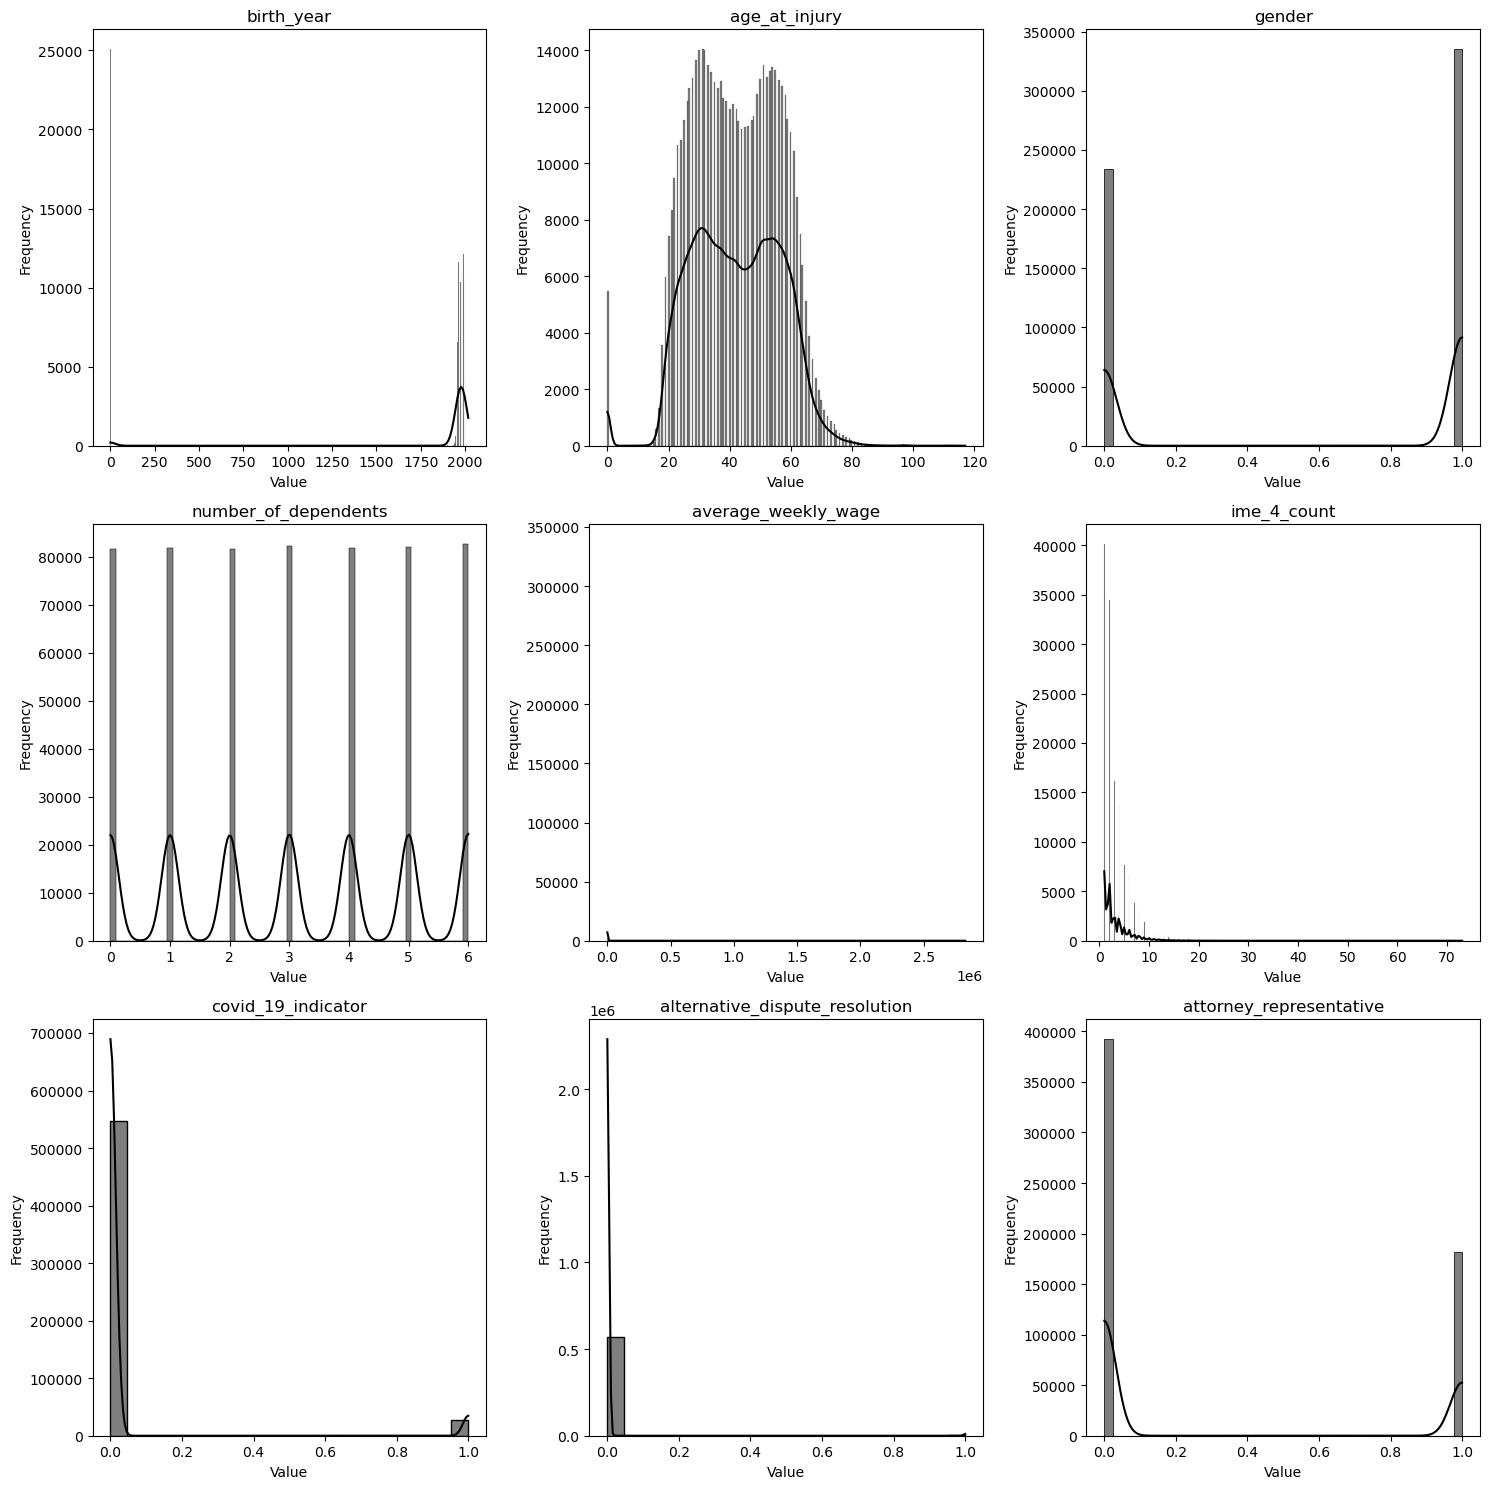

In [32]:
target = metric_features
num_features = len(target)
num_columns = 3
num_rows = (num_features + num_columns - 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration if there's more than one row
axes = axes.flatten()

# Loop through each numeric feature to plot histograms with Seaborn
for ax, feature in zip(axes, target):
    sns.histplot(df[feature], color='black', kde=True, ax=ax)  # kde adds a density line
    ax.set_title(f'{feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any empty subplots if the number of features is not even
for i in range(len(target), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

The only new piece of information that we gather is that number of dependents is essentially a uniform distribution, so we would do well in check later how well it discriminates the target.

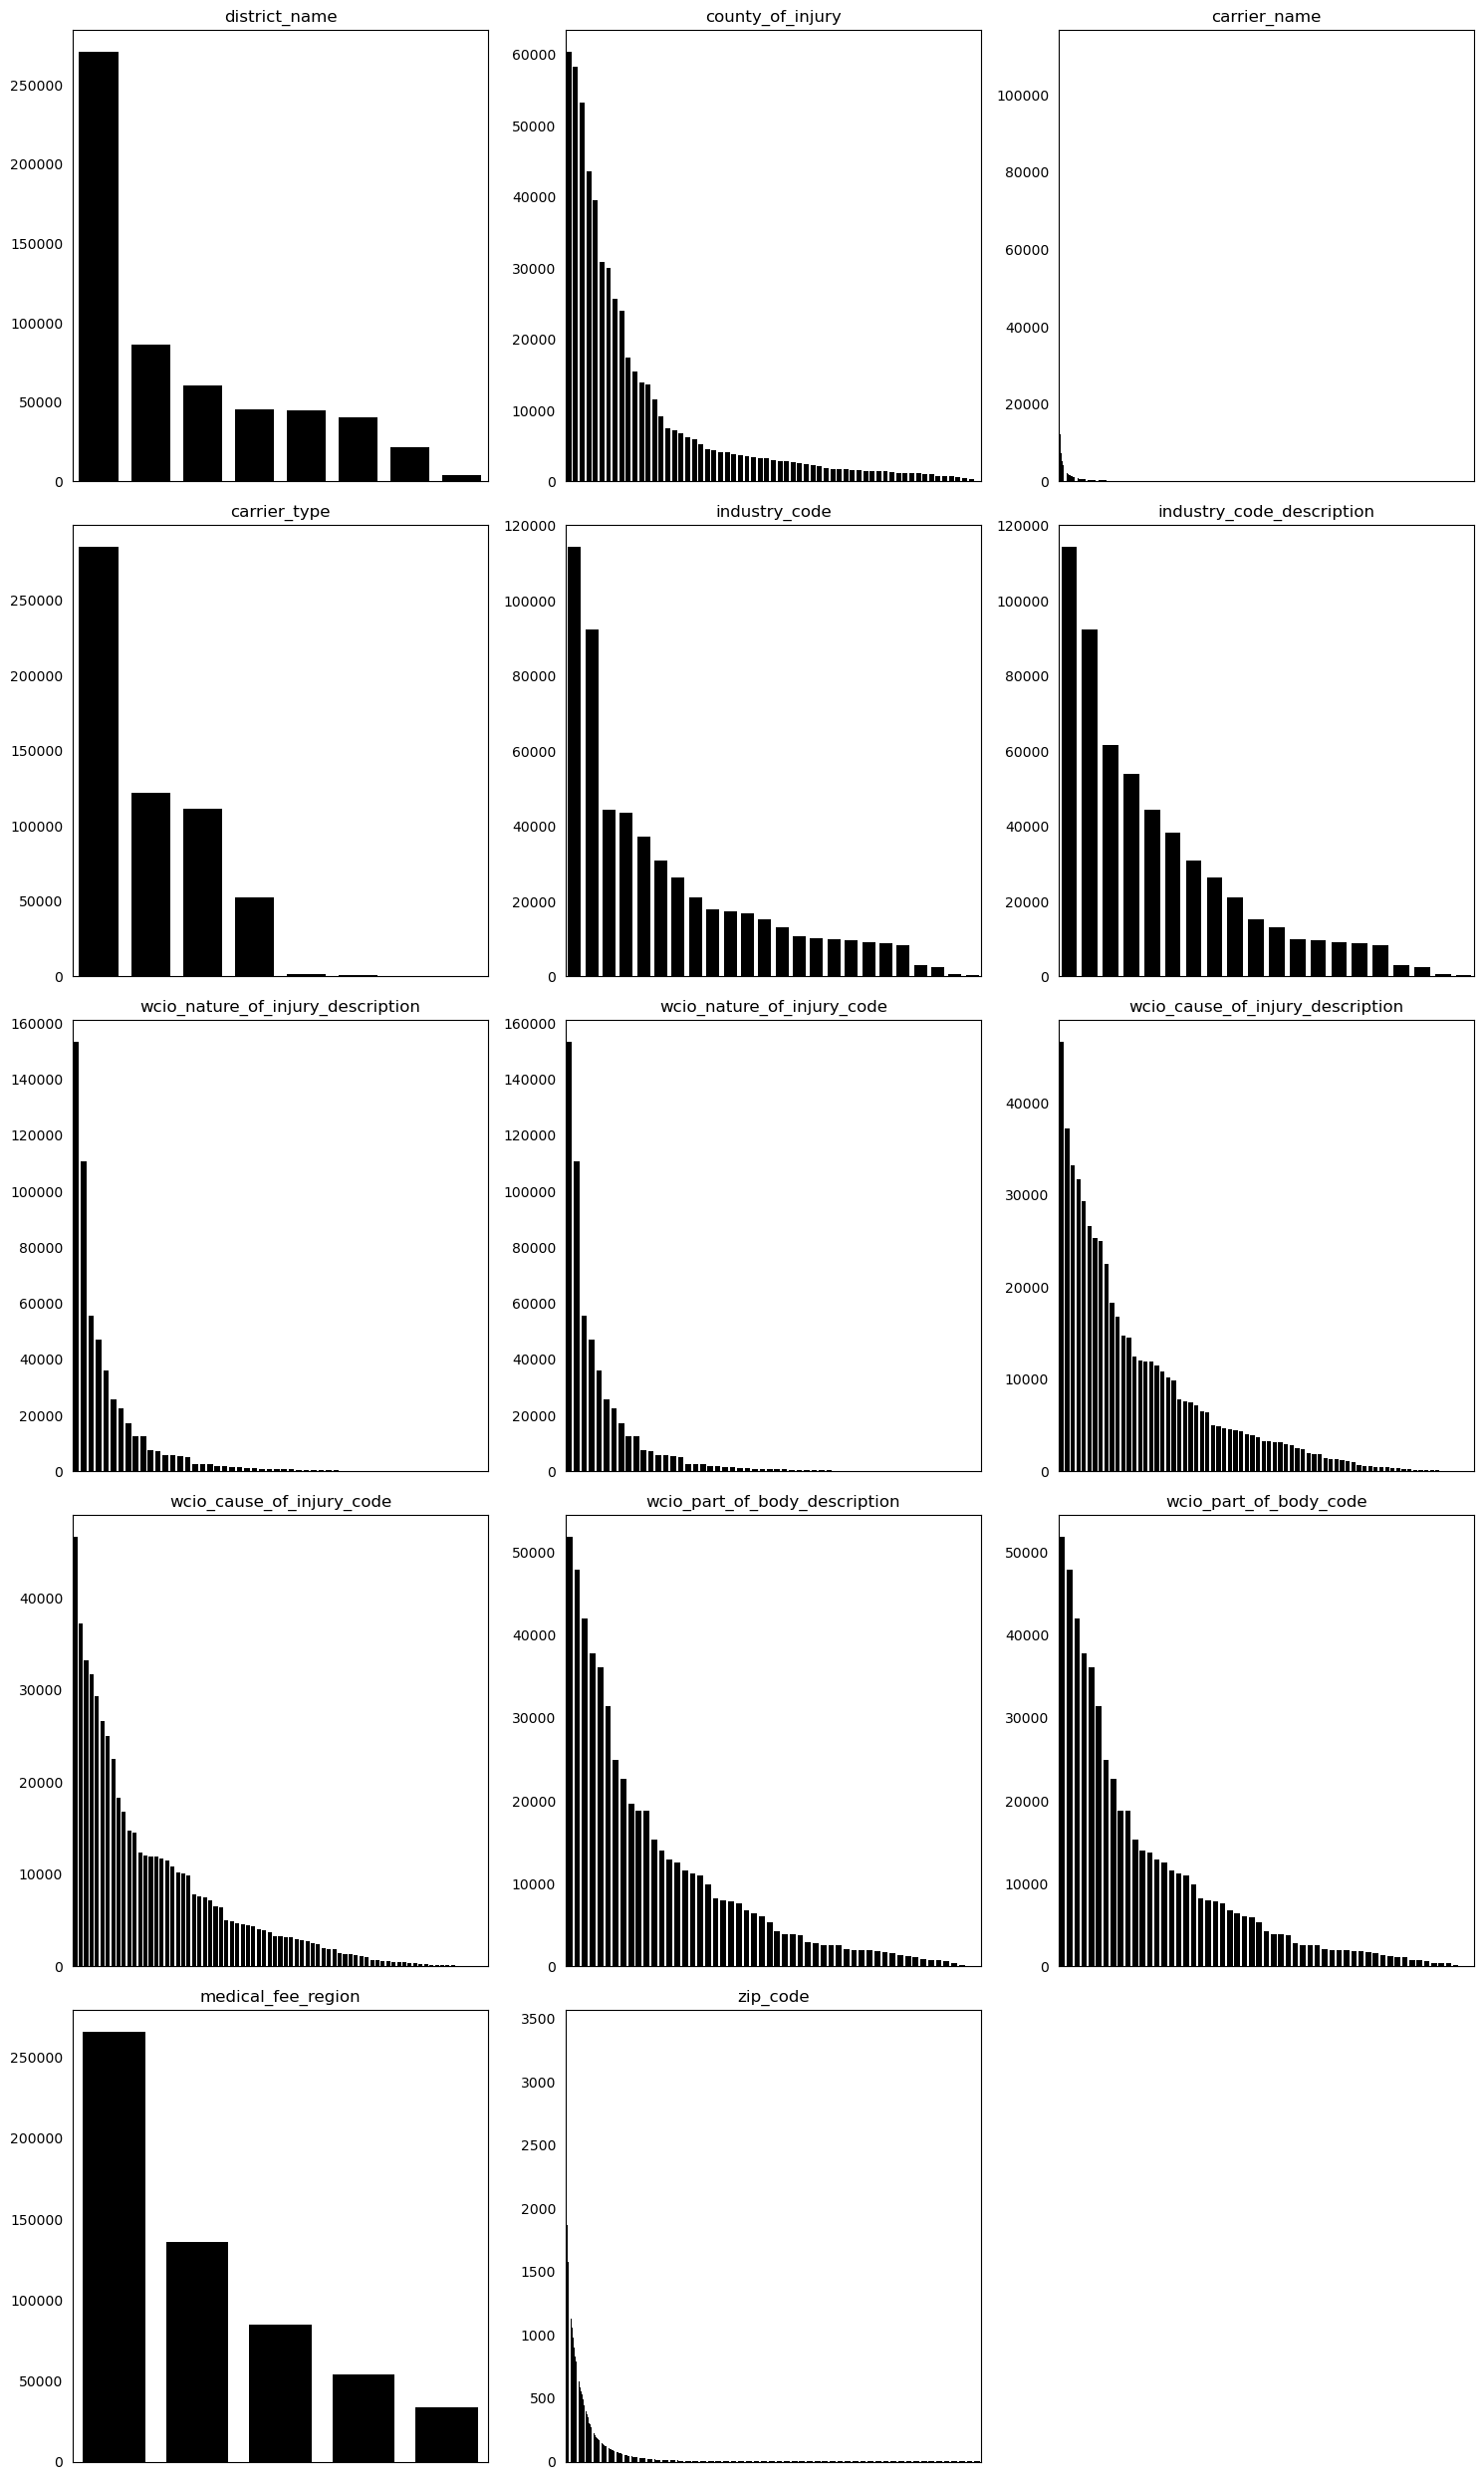

In [33]:
# Parameters for subplots
target = categorical_features
num_features = len(target)
num_columns = 3
num_rows = (num_features + num_columns - 1) // num_columns

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Loop through each feature and create a count plot
for ax, feature in zip(axes, target):
    sns.countplot(data=df, x=feature, color='black', ax=ax, order=df[feature].value_counts().index, width=.75)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label
    ax.set_xticklabels([])  # Remove x-axis category labels
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)  # Remove ticks

# Hide any empty subplots if the number of features is not a multiple of the number of columns
for i in range(len(target), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


At a high level we can see that most categories in each of these features have a relatively small number of observations, this makes us consider the need to find some common denominators for their aggregation into larger groups; either using some socio-demographical argument, or using entropy, to sort them into meaningful buckets. 

### 2.0.3 and, Boxplots 

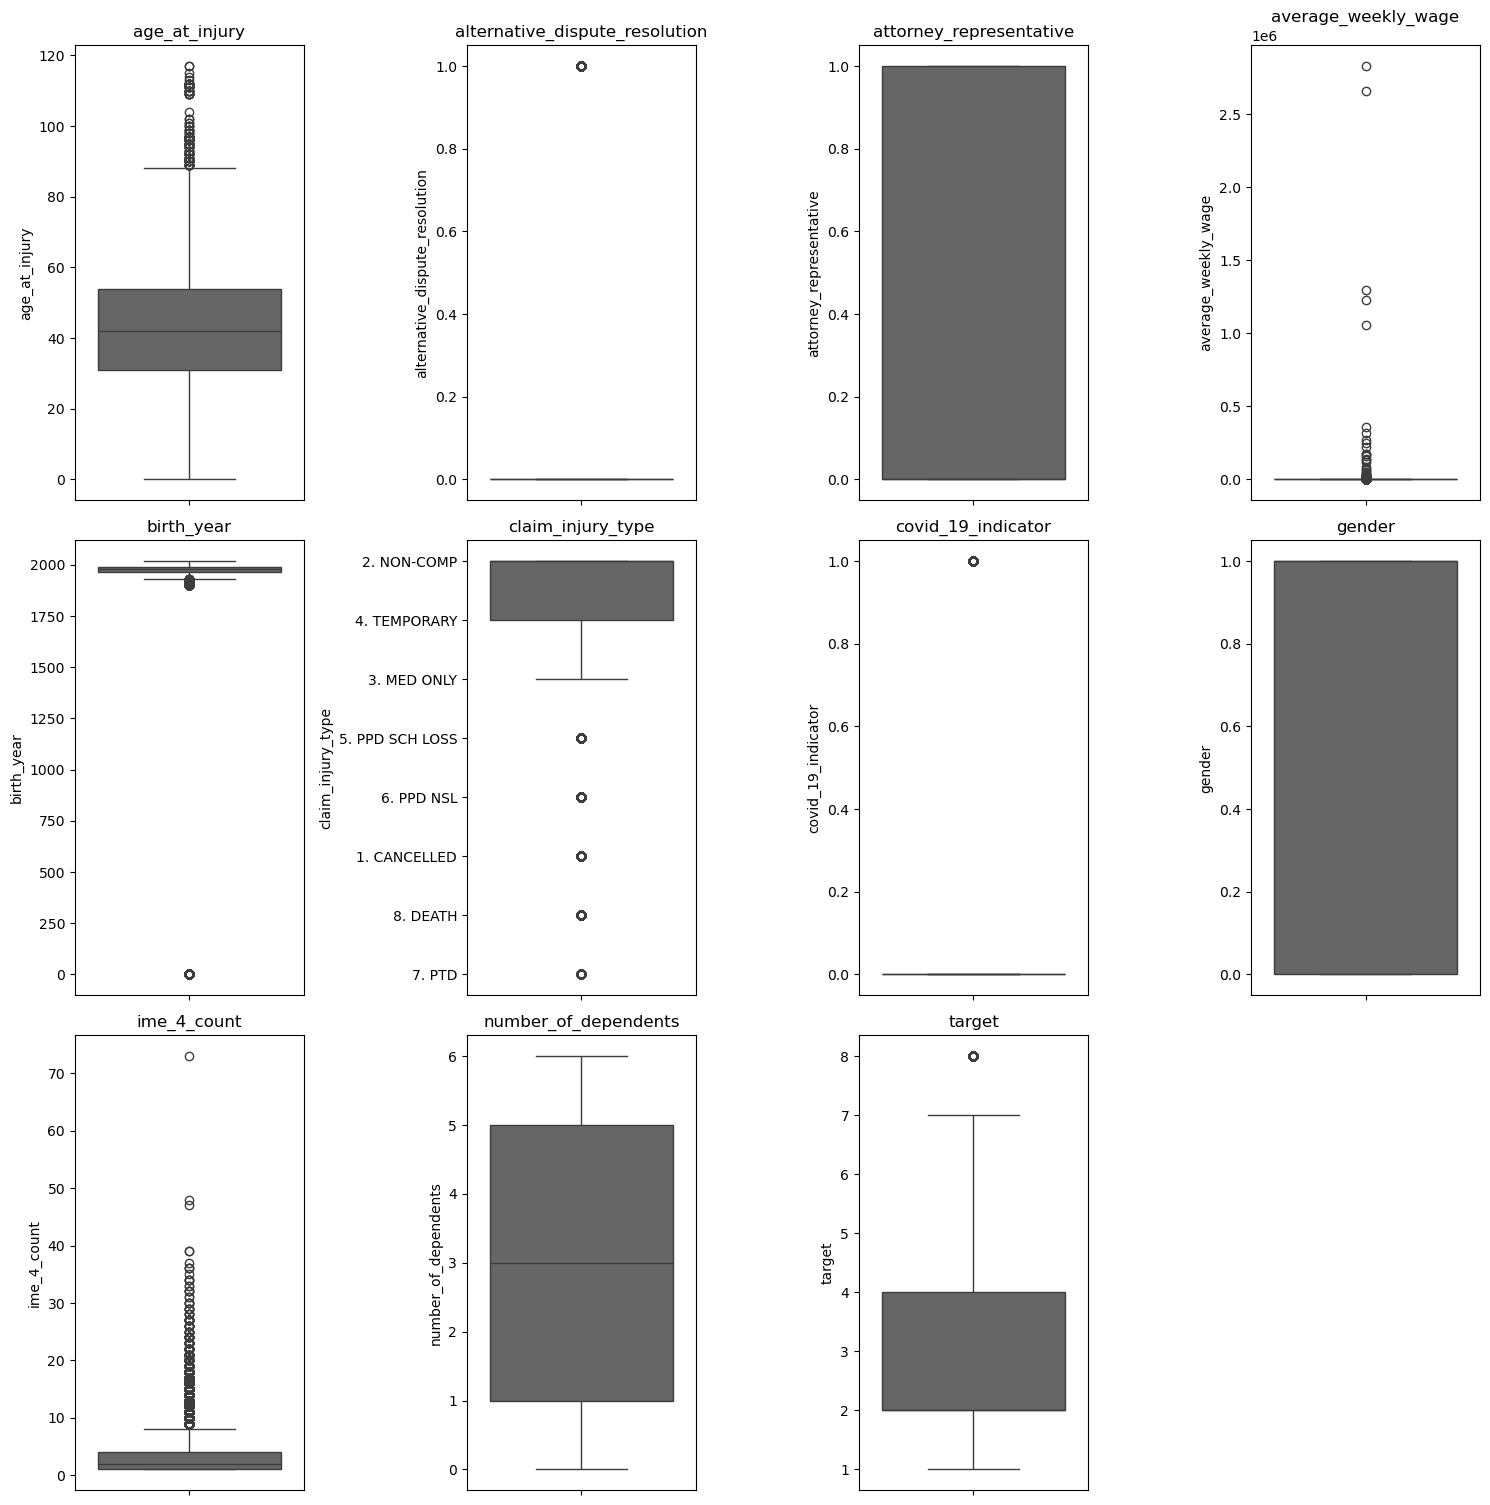

In [34]:
target = df.drop(columns=categorical_features + datetime_features).columns
num_features = len(target)
num_columns = 4
num_rows = (num_features + num_columns - 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration if there's more than one row
axes = axes.flatten()

# Loop through each numeric feature to plot histograms with Seaborn
for ax, feature in zip(axes, target):
    sns.boxplot(y=df[feature], color='#666666', ax=ax)  
    ax.set_title(f'{feature}')

# Hide any empty subplots if the number of features is not even
for i in range(len(target), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## 2.1 Multivariate Analysis

Now we take a more closer look variables and their interplay

In [35]:
# A helper function to remove outliers using the IQR method
def remove_outliers(col_data):
    q1, q3 = col_data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return col_data[(col_data >= lower_bound) & (col_data <= upper_bound)]


Now we process the data in a way that allows us to efficiently create these visualizations.

In [36]:
# Column categorization
datetime_columns = datetime_features
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.difference(datetime_columns)
categorical_columns = categorical_columns.difference(
    [col for col in df.select_dtypes(include=['object', 'category']).columns if 'description' in col or 'claim_injury_type' in col]
)
numeric_columns = df.select_dtypes(include=[np.number]).columns.difference(binary_columns)
num_columns = list(binary_columns) + list(numeric_columns)

# Convert binary columns to boolean (True/False)
for col in binary_columns:
    df[col] = df[col].astype('bool')

# Convert categorical columns to 'category' type (for efficient memory usage)
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert numeric columns to float (if not already)
for col in numeric_columns:
    df[col] = df[col].astype('float')

# Filtered dataset for plotting without dropping values globally
df_clean = df.sample(30000, random_state=42)  # Because we are not insane 
for col in numeric_columns:
    df_clean[col] = remove_outliers(df[col])



### 2.1.1 Scatter Plots

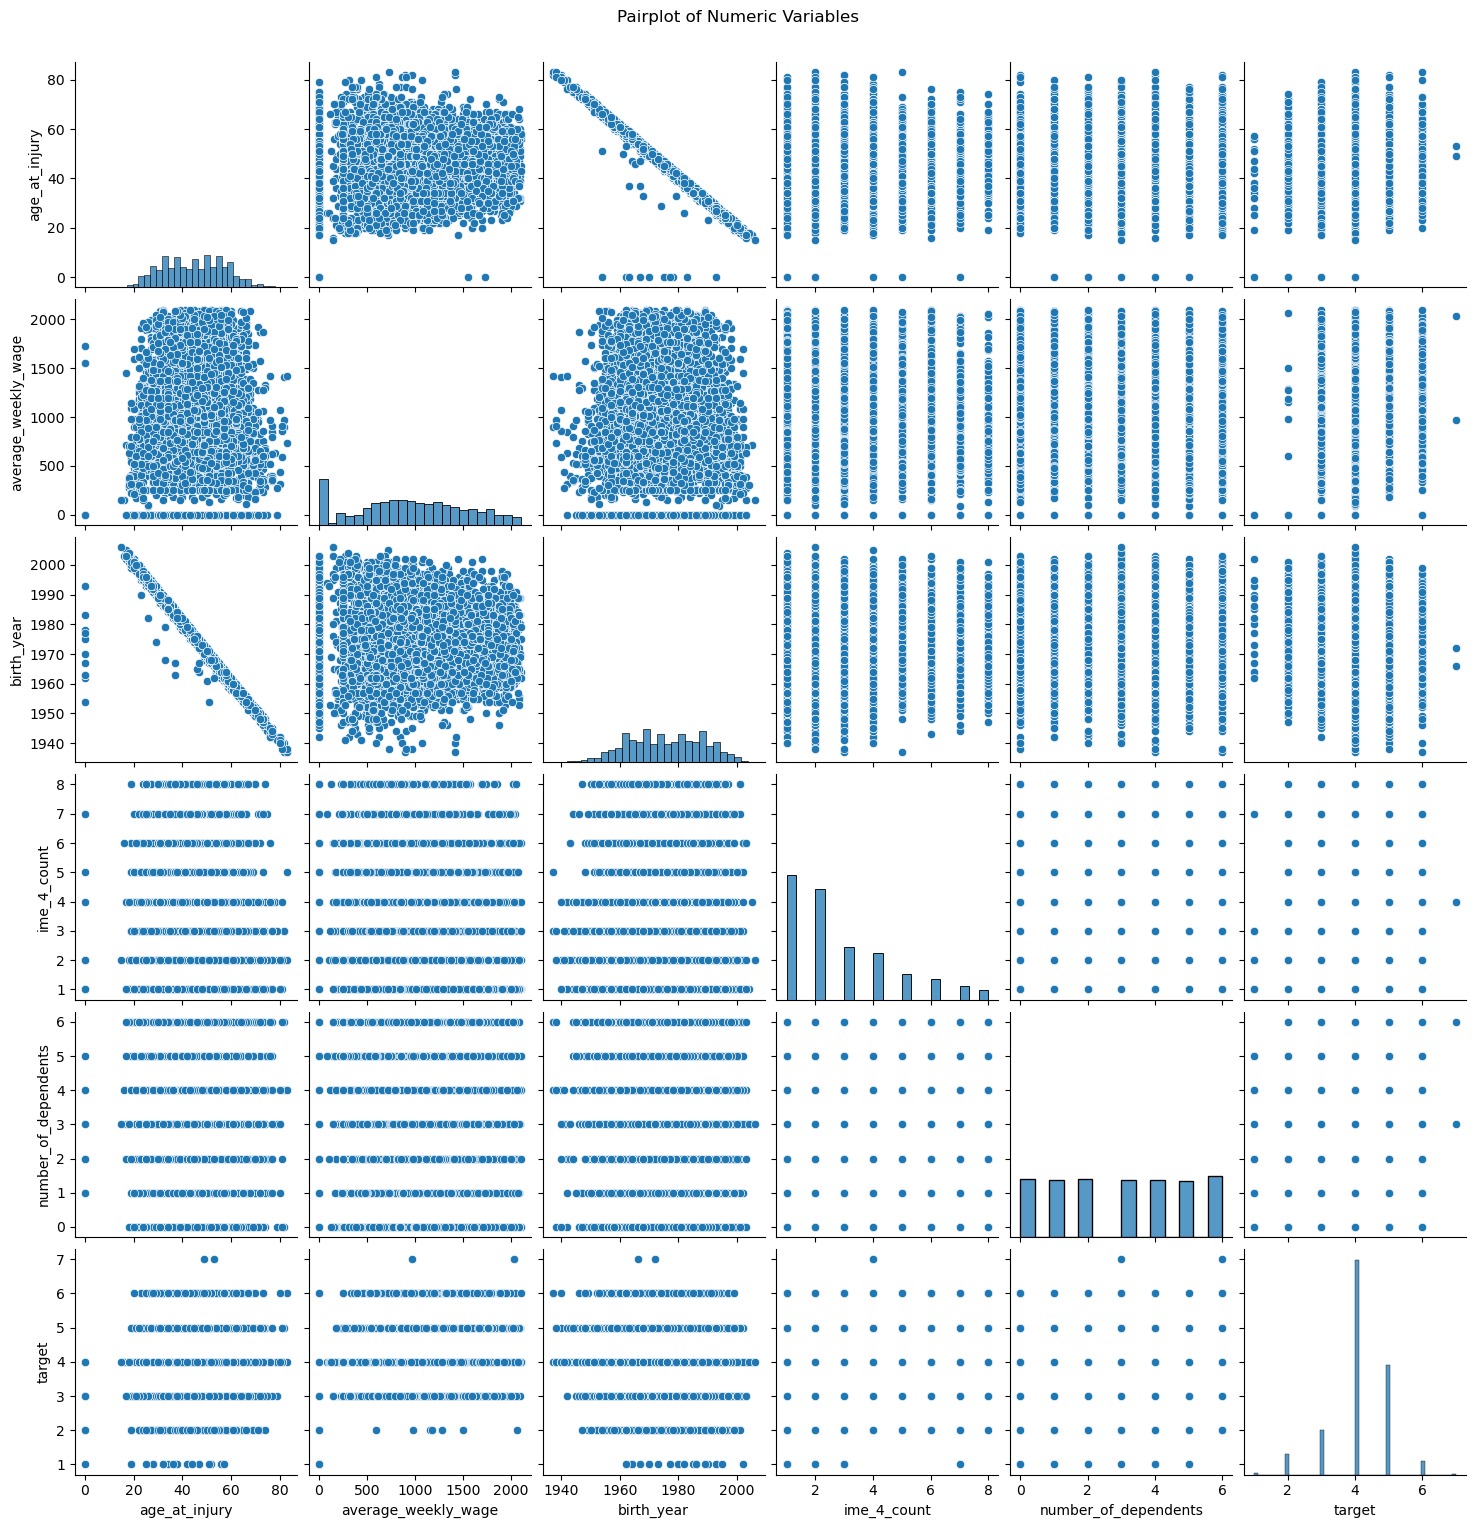

In [37]:
# Generate the pairplot
g = sns.pairplot(
    df_clean[numeric_columns].dropna()
)

# Set the title for the pairplot
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


The scatter plots between numeric variables in the pairplot do not show much useful information. unless the relationship between age_at_injury and ime_4_count, it appears that there's a relatively high density of data points around lower values of both variables. This could indicate that younger individuals or those who had fewer "ime_4_count" occurrences have specific clustering patterns, potentially linked to common injury patterns. 

- **Weak or No Correlation**: The scatter plots between numeric features display random points without any clear pattern. This indicates that the dataset may need substantial work. Some observations include:

**What This Implies**

These observations suggest that the dataset requires further attention


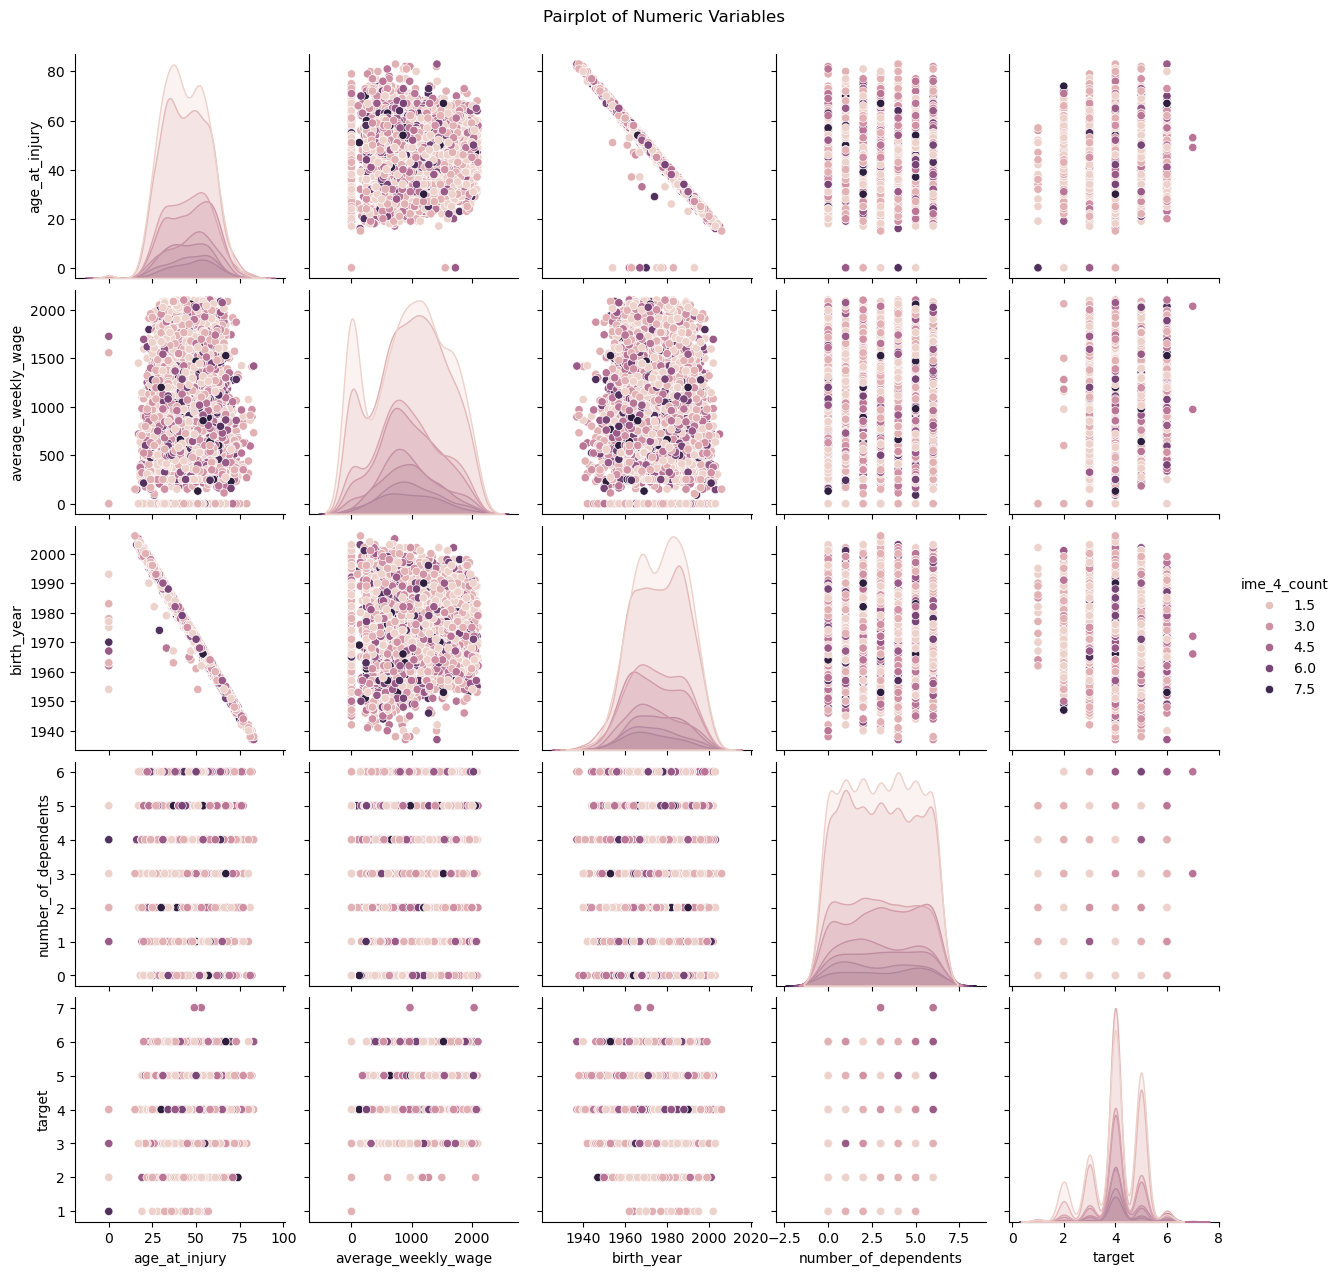

In [38]:
# Generate the pairplot with KDE and hue
g = sns.pairplot(
    df_clean[numeric_columns].dropna(), 
    hue='ime_4_count', 
    diag_kind="kde"
)

# Set the title for the pairplot
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


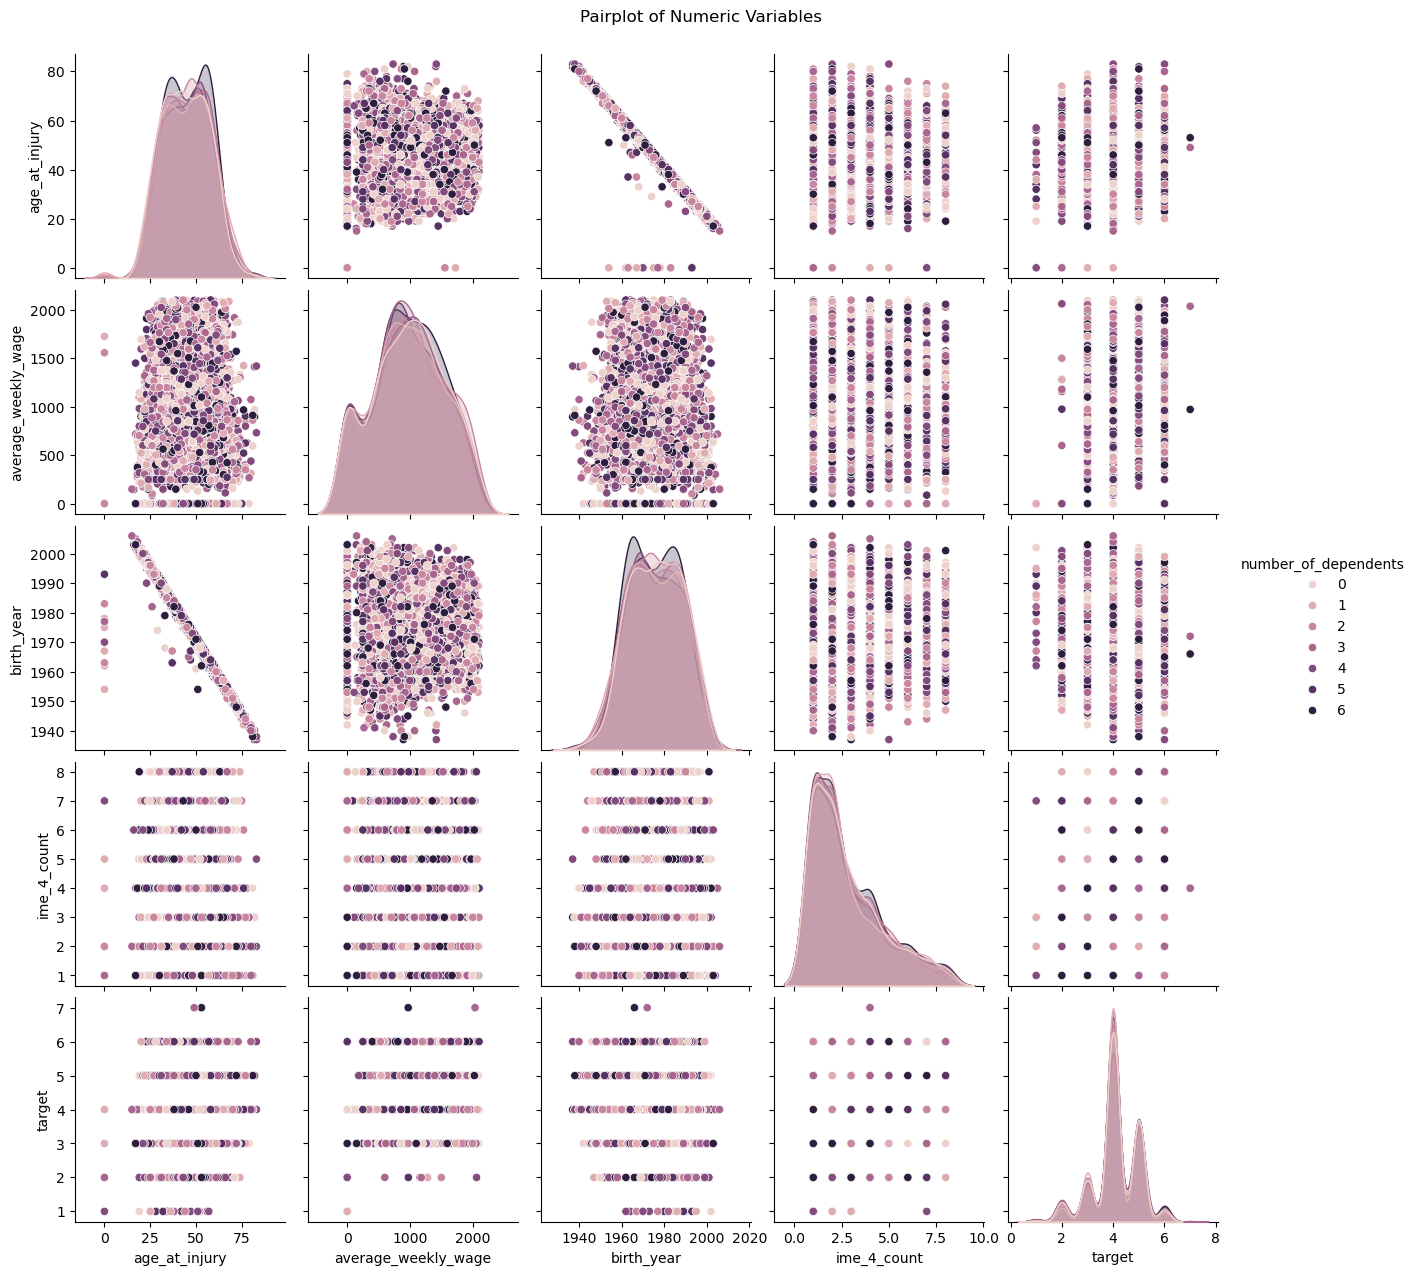

In [39]:
# Generate the pairplot with KDE and hue
g = sns.pairplot(
    df_clean[numeric_columns].dropna(), 
    hue='number_of_dependents', 
    diag_kind="kde"
)

# Set the title for the pairplot
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


#### Quickly checking age_at_injury and ime_4_count association


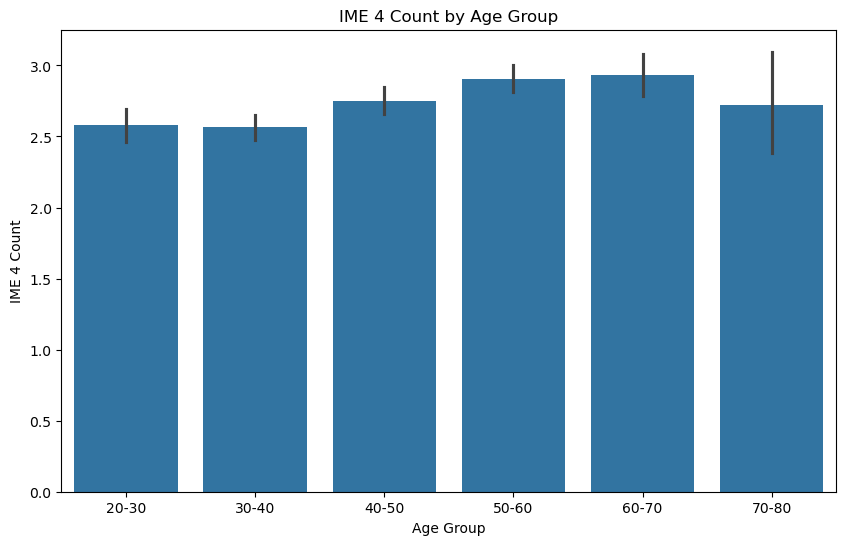

In [40]:
age_bins = pd.cut(df['age_at_injury'], bins=[0, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])
plt.figure(figsize=(10, 6))
sns.barplot(x=age_bins, y='ime_4_count', data=df_clean)
plt.title("IME 4 Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("IME 4 Count")
plt.show()

In our analysis, we observe that older individuals tend to have more claim requests. This makes sense when considering the following:

**Possible Explanation**

As people age, they generally face more health challenges, which might cause them to file more claims. However, the increased number of claims from older individuals might also reflect **increased persistence**. Older people, who may not recover as quickly or easily from injuries or health issues, are likely to be more persistent in seeking compensation or medical attention. 

On the other hand, younger individuals might be less inclined to pursue claims, even if their claim is accepted, due to their **faster recovery** or less perceived need for ongoing support.


### 2.1.2 Binary Variables and Target

Binary variables are compared with the target variable to assess their influence. Note that 'number_of_dependents' and 'gender' have minimal impact, so these variables may be deprioritized in further analysis.


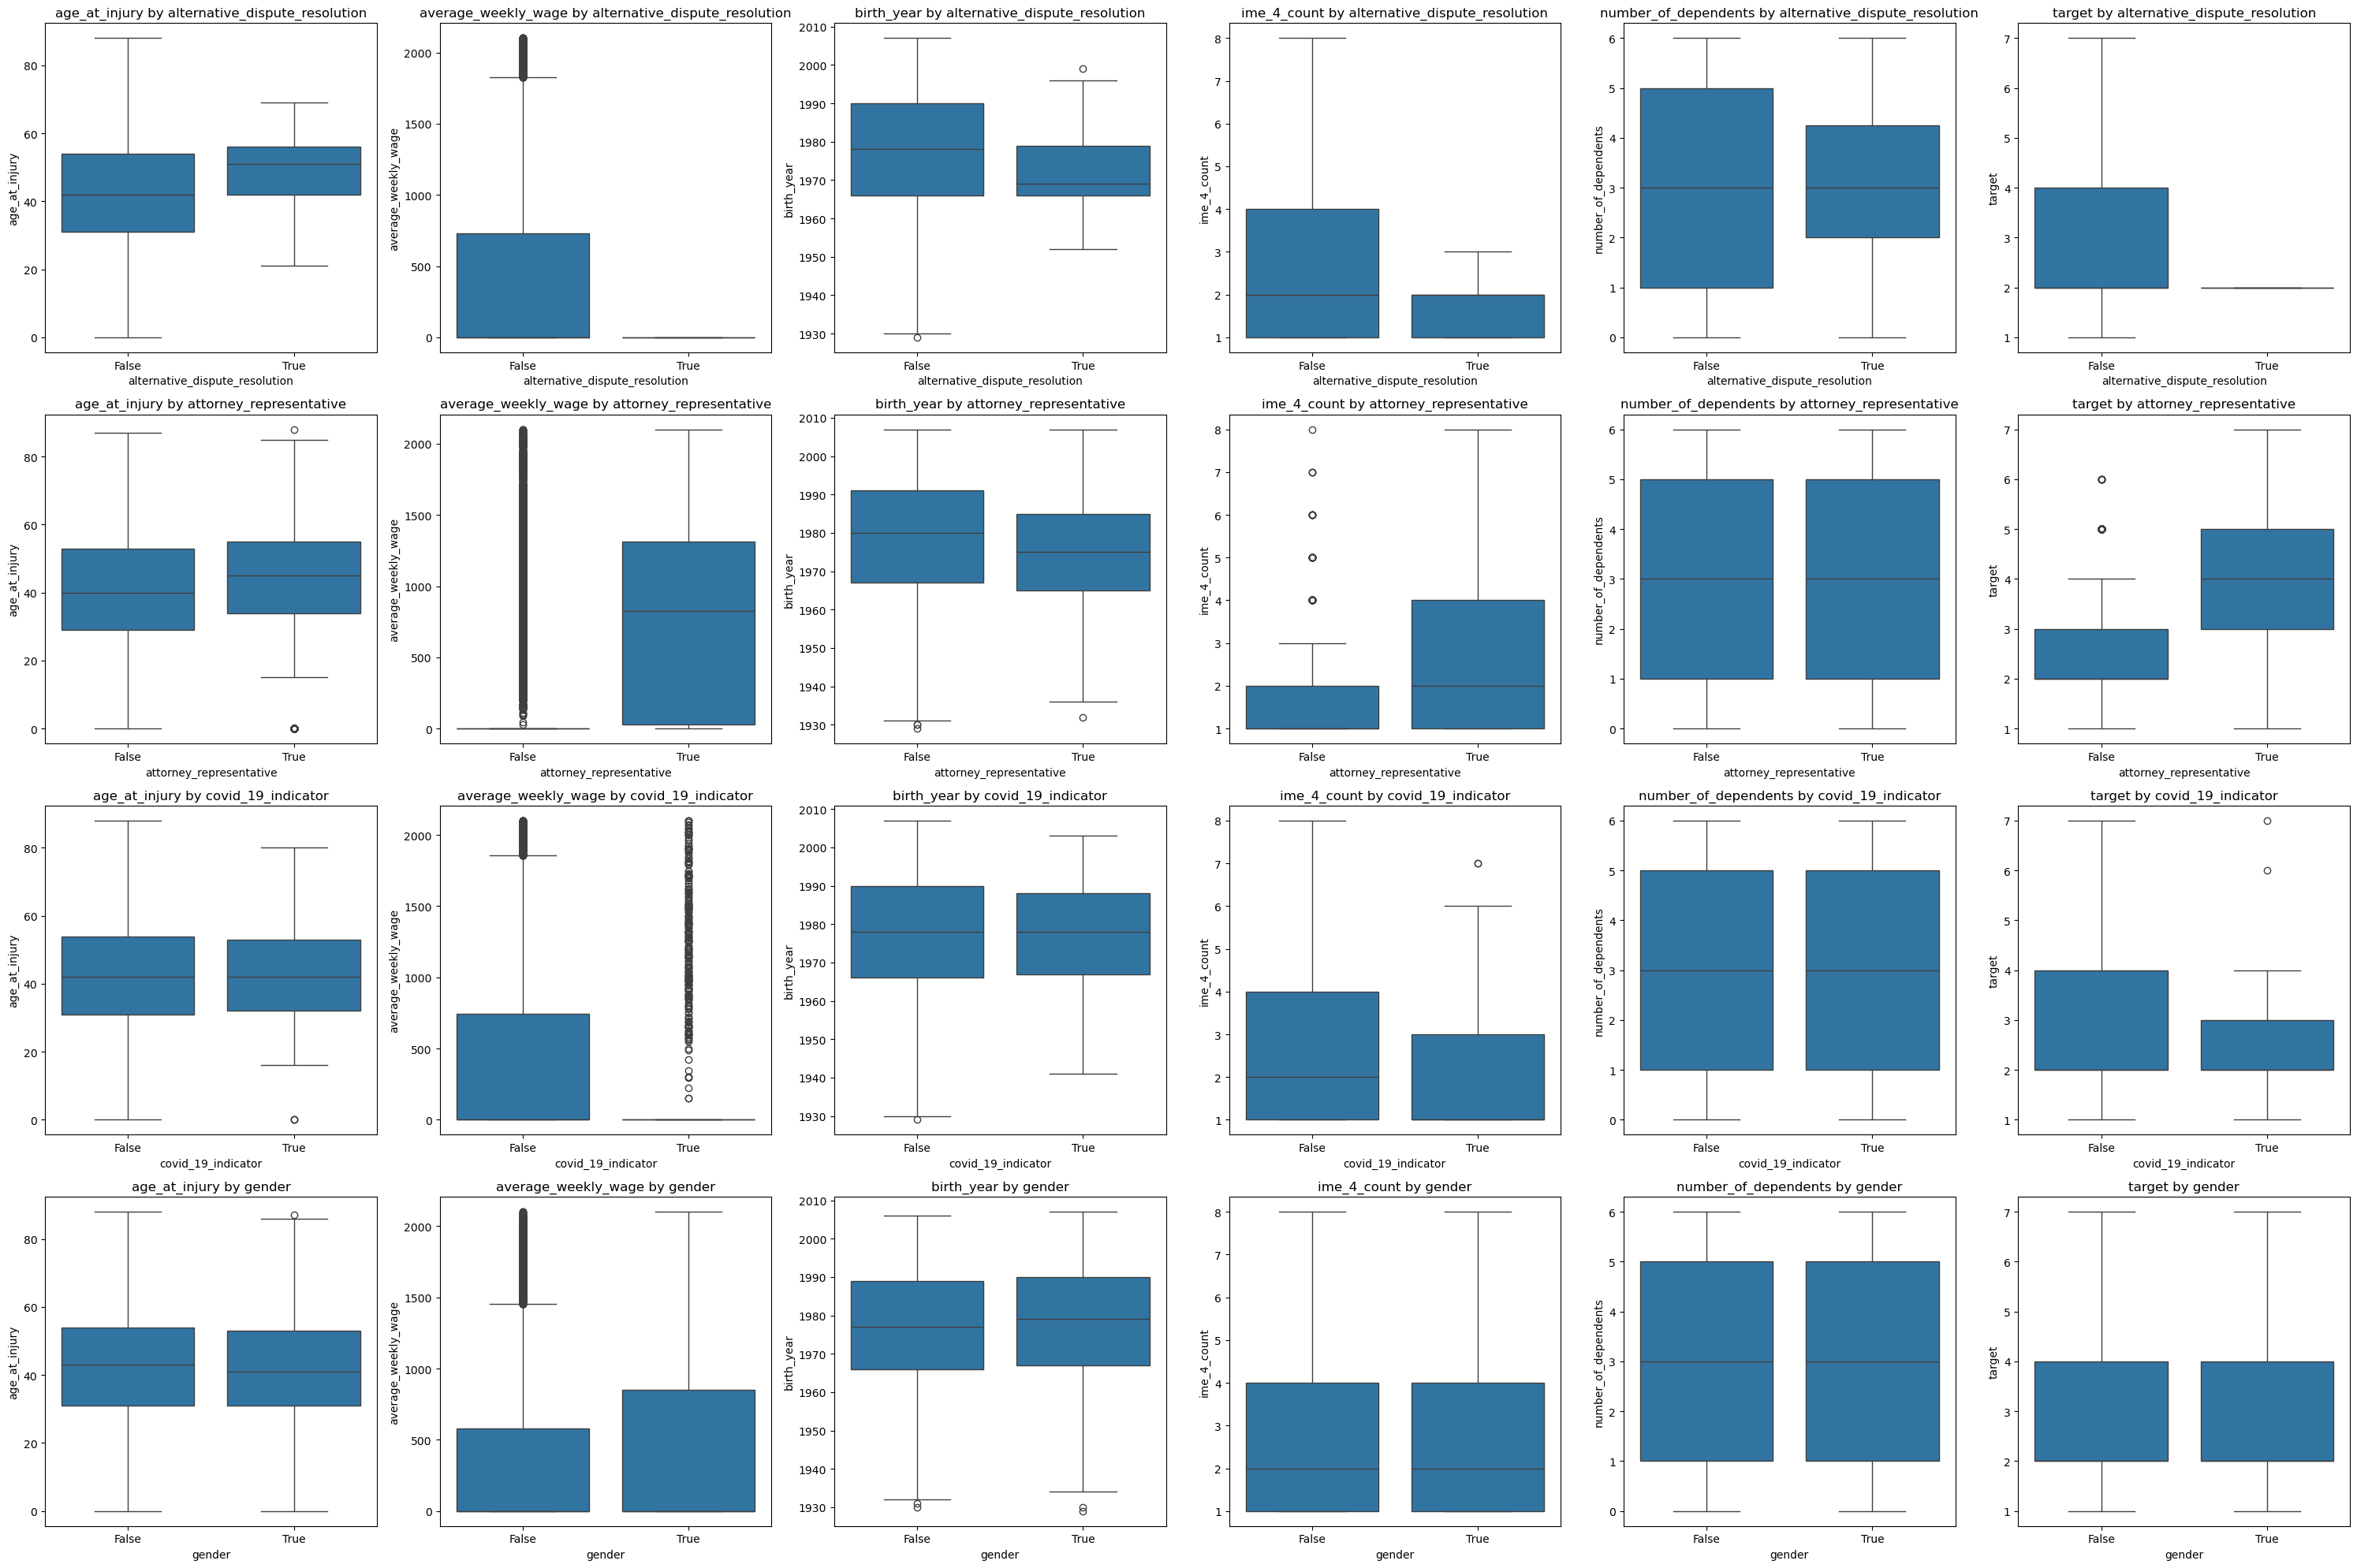

In [41]:
n_binary = len(binary_columns)
n_numeric = len(numeric_columns)
fig, axes = plt.subplots(nrows=n_binary, ncols=n_numeric, figsize=(5 * n_numeric, 5 * n_binary))

# Flatten the axes array for easier iteration
axes = axes.flatten() if n_binary * n_numeric > 1 else [axes]

# Generate each plot in a loop
for i, (binary_col, num_col) in enumerate([(b, n) for b in binary_columns for n in numeric_columns]):
    sns.boxplot(x=binary_col, y=num_col, data=df_clean, ax=axes[i])
    axes[i].set_title(f"{num_col} by {binary_col}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 2.1.3 Analysis of Binary Variables on Target

The final column of boxplots (labeled "target by ...") illustrates the distribution of the `target` variable across each binary category (`alternative_dispute_resolution`, `attorney_representative`, `covid_19_indicator`, and `gender`). Observing the median lines and spread of these boxplots provides insights into the influence each binary variable has on the `target` outcome:

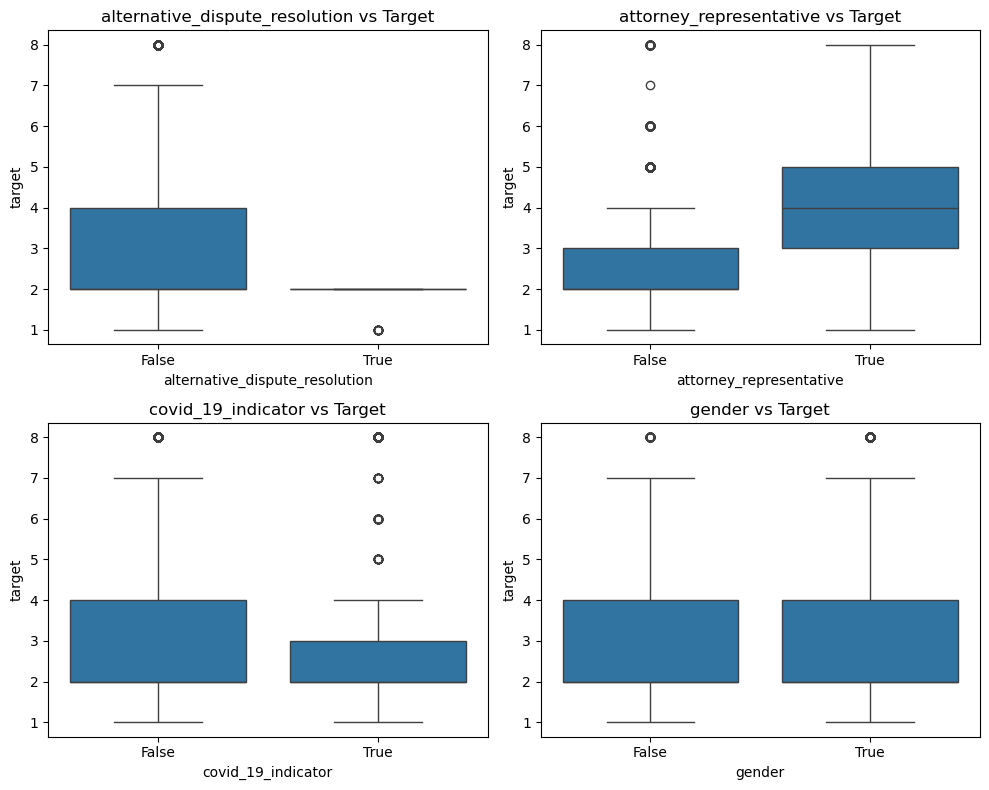

In [42]:
# Box plot of binary variables against target, combining into one plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(binary_columns):
    if col != 'target':  # Ensure target is not included here
        sns.boxplot(x=col, y='target', data=df, ax=axes[i])
        axes[i].set_title(f"{col} vs Target")

plt.tight_layout()
plt.show()

- **Alternative Dispute Resolution**: The `target` values differ significantly between True and False values, indicating some influence from this variable.
  
- **Attorney Representative**: There’s a trend where the `target` tends to be lower for cases without attorney representation, suggesting that represented cases may be associated with higher `target` values.

- **COVID-19 Indicator**: Cases flagged with the COVID-19 indicator appear to have a marginally different distribution in `target`, though the overall influence remains subtle.

- **Gender**: The `target` distributions are quite similar across genders, indicating minimal influence of gender on the `target` variable.

These observations help identify which binary variables might warrant further investigation for their impact on `target` and which have less significant effects.

### 2.1.4 Joint Density Plots for Target Analysis

In these joint density plots, we use the target variable as the hue to highlight its influence on relationships between pairs of features. Each pair is selectively filtered for outliers before plotting.


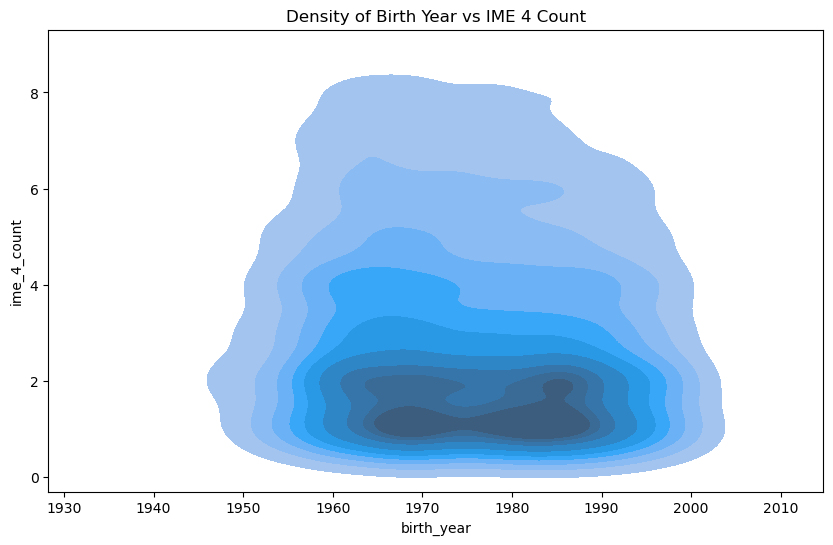

In [43]:
# Remove rows with NaN values in relevant columns
df_clean = df_clean.dropna(subset=['birth_year', 'ime_4_count', 'target'])

# Apply outlier removal for birth_year and ime_4_count
x_data = remove_outliers(df_clean['birth_year'])
y_data = remove_outliers(df_clean['ime_4_count'])

# Filter the data after outlier removal
data_filtered = df_clean.loc[x_data.index.intersection(y_data.index)]

# Plotting the KDE without the 'hue' argument
plt.figure(figsize=(10, 6))  # Set the figure size
sns.kdeplot(
    data=data_filtered, x='birth_year', y='ime_4_count', 
    fill=True, thresh=0.05, levels=10
)

# Set the title of the plot
plt.title("Density of Birth Year vs IME 4 Count")

# Show the plot
plt.show()


## 2.2 Association and Correlation

### 2.2.1 Pearson

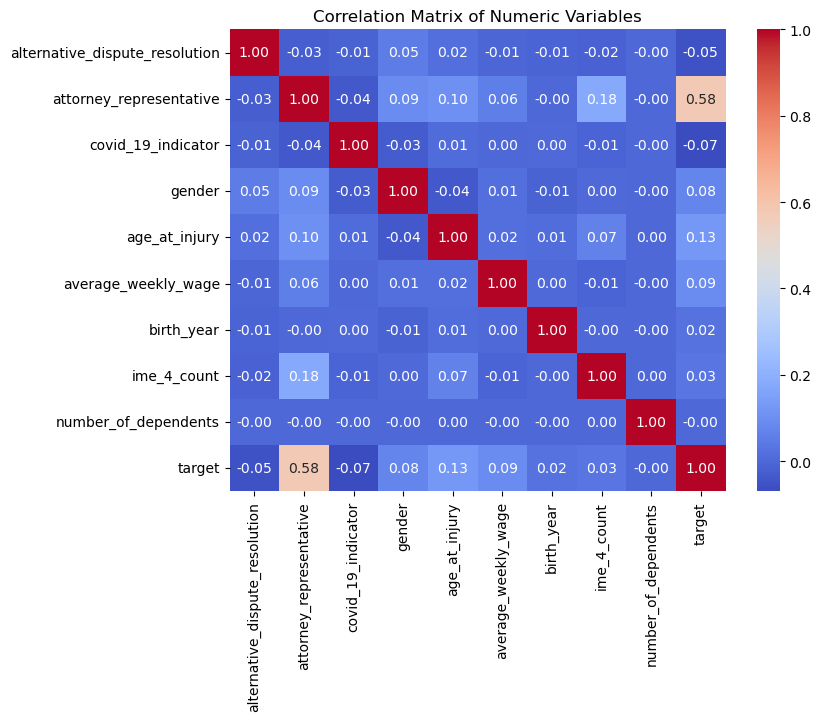

In [44]:
correlation_matrix = df[num_columns].corr("pearson")

# Plotting the full correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

Our previous analysis indicated a relationship between the presence of an attorney and the target variable. The correlation matrix further supports this observation, showing a significant association between the attorney status and the target. This reinforces the idea that claims involving an attorney tend to follow different patterns, likely due to the legal complexities or persistence involved in such cases. 

### 2.2.2 Spearman

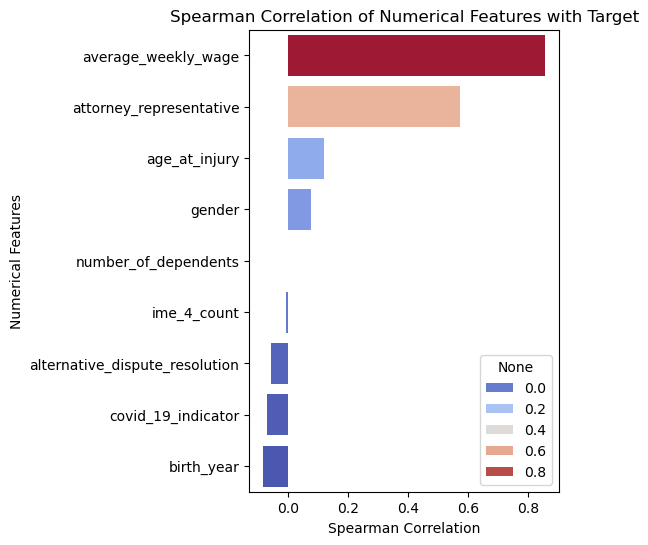

In [45]:
# Calculate Spearman correlation of each numerical feature with the target column
spearman_corr_target = df[num_columns].corrwith(df['target'], method='spearman').sort_values(ascending=False)

#  Plot the correlations as a bar chart
plt.figure(figsize=(4, 6)) 
sns.barplot(x=spearman_corr_target[1:].values, y=spearman_corr_target.index[1:], hue=spearman_corr_target[1:], palette='coolwarm')
plt.xlabel("Spearman Correlation")
plt.ylabel("Numerical Features")
plt.title("Spearman Correlation of Numerical Features with Target")
plt.show()


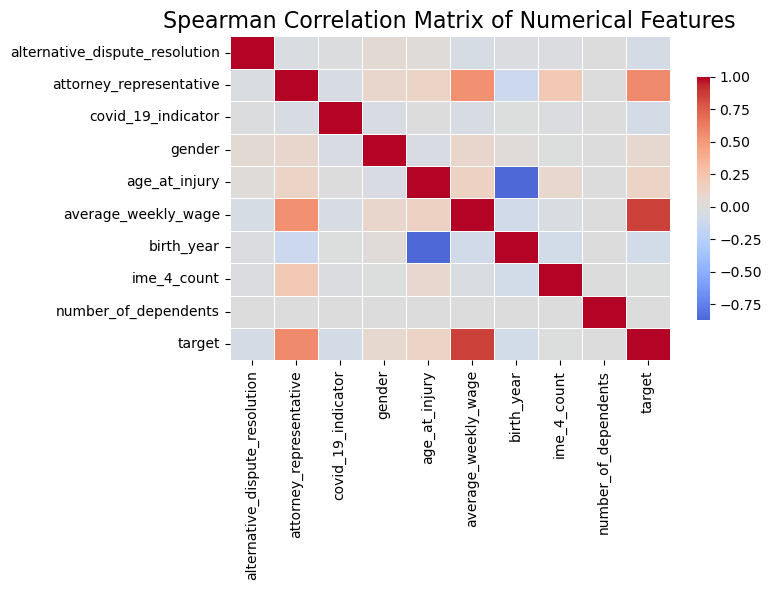

In [46]:
# Calculate the Spearman correlation matrix
spearman_corr_matrix = df[num_columns].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Increase figure size for better readability
sns.heatmap(spearman_corr_matrix, annot=False, cmap='coolwarm', center=0, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .75})

# Adjust axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.title("Spearman Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### 2.2.3 Crammer's V

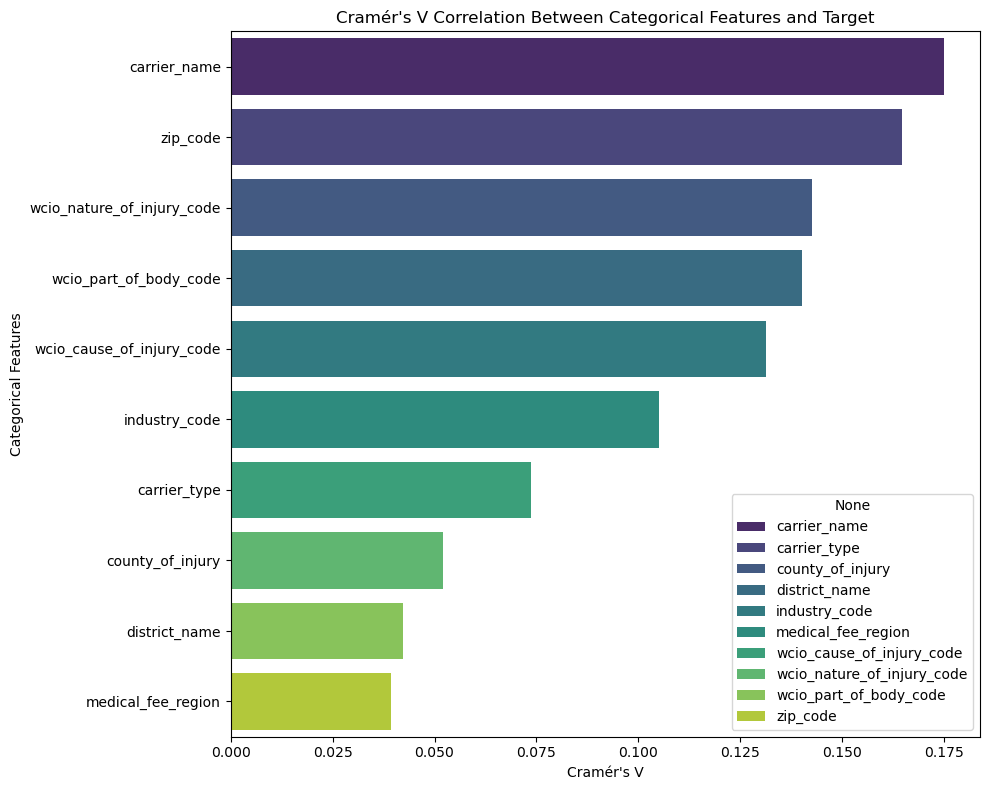

In [47]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calculate Cramér's V for each categorical feature against the target
cramers_v_values = {}

for feature in categorical_columns:
    cramers_v_values[feature] = cramers_v(df[feature], df['target'])

# Convert results to a DataFrame for easier reading
cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['Cramers V'])
cramers_v_df = cramers_v_df.sort_values(by='Cramers V', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=cramers_v_df['Cramers V'], y=cramers_v_df.index, hue=categorical_columns, palette='viridis')
plt.title("Cramér's V Correlation Between Categorical Features and Target")
plt.xlabel("Cramér's V")
plt.ylabel("Categorical Features")
plt.tight_layout()
plt.show()

The carrier name, kind of strange. Otherwise zip code shows a relatively strong association with the target. This could imply geographical differences that affect the target, potentially due to regional policies, local economic factors, or area-specific risk levels.

## 2.3 Feature Analysis - a deeper dive into select variables

Before closing the exploration portion of this notebook we analyze the remaining variables that we have not had the need to analyze thus far, with respect to the target in a more targeted fashion. 

### 2.3.0 Covid-19 Indicator

In [48]:
grouped_data = df.groupby(['covid_19_indicator', 'claim_injury_type']).size()

grouped_data

covid_19_indicator  claim_injury_type
False               1. CANCELLED          12086
                    2. NON-COMP          272457
                    3. MED ONLY           66673
                    4. TEMPORARY         142459
                    5. PPD SCH LOSS       48263
                    6. PPD NSL             4179
                    7. PTD                   84
                    8. DEATH                304
True                1. CANCELLED            391
                    2. NON-COMP           18621
                    3. MED ONLY            2233
                    4. TEMPORARY           6048
                    5. PPD SCH LOSS          17
                    6. PPD NSL               32
                    7. PTD                   13
                    8. DEATH                166
dtype: int64

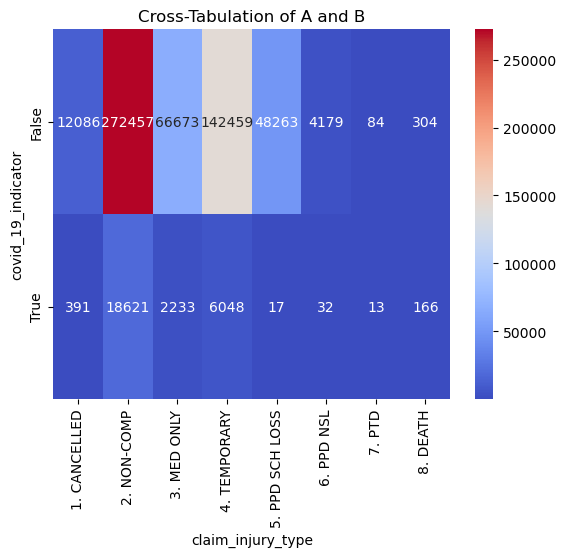

In [49]:
cross_tab = pd.crosstab(df['covid_19_indicator'], df['claim_injury_type'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Cross-Tabulation of A and B')
plt.show()

In [50]:
#Checking the most common types of industry when there is the influence of Covid-19
filtered_data = df[df['covid_19_indicator'] == 1] 

grouped_withindus = filtered_data.groupby(['claim_injury_type', 'industry_code'], observed=False).size()

grouped_withindus

claim_injury_type  industry_code
1. CANCELLED       11.0                0
                   21.0                0
                   22.0                0
                   23.0                2
                   31.0                1
                   32.0                3
                   33.0                2
                   42.0                0
                   44.0                7
                   45.0                0
                   48.0               20
                   49.0                4
                   51.0                2
                   52.0                3
                   53.0                2
                   54.0                3
                   55.0                0
                   56.0                5
                   61.0                7
                   62.0              143
                   71.0                7
                   72.0                2
                   81.0                8
                   92.0 

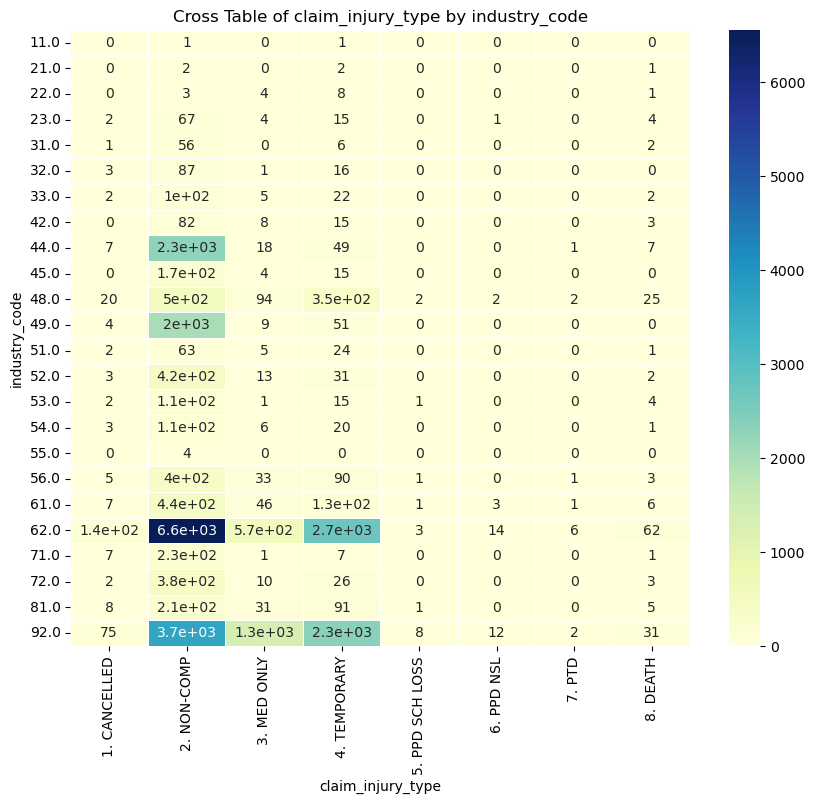

In [51]:
grouped_df = grouped_withindus.reset_index(name='Count')

pivot_df = grouped_df.pivot(index='industry_code', columns='claim_injury_type', values='Count')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", linewidths=.5)

plt.title("Cross Table of claim_injury_type by industry_code")

plt.xlabel("claim_injury_type")
plt.ylabel("industry_code")
plt.show()

During the COVID-19 pandemic, industries with essential and public-facing roles, such as Health Care and Social Assistance, Public Administration, Retail Trade, and Transportation and Warehousing, saw notable increases in injury claims, particularly in "Non-Comp" and "Temporary" categories. This trend suggests that pandemic-related factors—such as increased exposure risk, heightened stress, and higher workloads—contributed to a rise in short-term, non-compensable injuries rather than severe or permanent disabilities.

In [52]:
contingency_table = pd.crosstab(df['covid_19_indicator'], df['claim_injury_type'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

print("Expected frequencies:", expected)

Chi-square statistic: 5768.746177872479
p-value: 0.0
Degrees of freedom: 7
Expected frequencies: [[1.18788049e+04 2.77122608e+05 6.56023830e+04 1.41387007e+05
  4.59652723e+04 4.00910857e+03 9.23494493e+01 4.47466404e+02]
 [5.98195059e+02 1.39553916e+04 3.30361695e+03 7.11999308e+03
  2.31472770e+03 2.01891432e+02 4.65055067e+00 2.25335960e+01]]


The categorical correlation analysis shows a statistically significant association between the variables, with a Chi-square statistic of 5768.75 (p-value = 0.0), indicating that the observed patterns are unlikely due to chance. Although Cramer's V is 0.10, suggesting a small association, this is notable in large datasets where even minor correlations can be meaningful.

### 2.3.1 District Name

In [53]:
grouped_data = df.groupby(['district_name', 'claim_injury_type'], observed=False).size()

grouped_data

district_name  claim_injury_type
ALBANY         1. CANCELLED           1411
               2. NON-COMP           45170
               3. MED ONLY           11780
               4. TEMPORARY          21269
               5. PPD SCH LOSS        5923
               6. PPD NSL              528
               7. PTD                   22
               8. DEATH                 68
BINGHAMTON     1. CANCELLED            271
               2. NON-COMP           11894
               3. MED ONLY            3654
               4. TEMPORARY           4971
               5. PPD SCH LOSS         979
               6. PPD NSL               75
               7. PTD                    5
               8. DEATH                 15
BUFFALO        1. CANCELLED            878
               2. NON-COMP           23885
               3. MED ONLY            4618
               4. TEMPORARY          11661
               5. PPD SCH LOSS        4066
               6. PPD NSL              453
               7. PTD

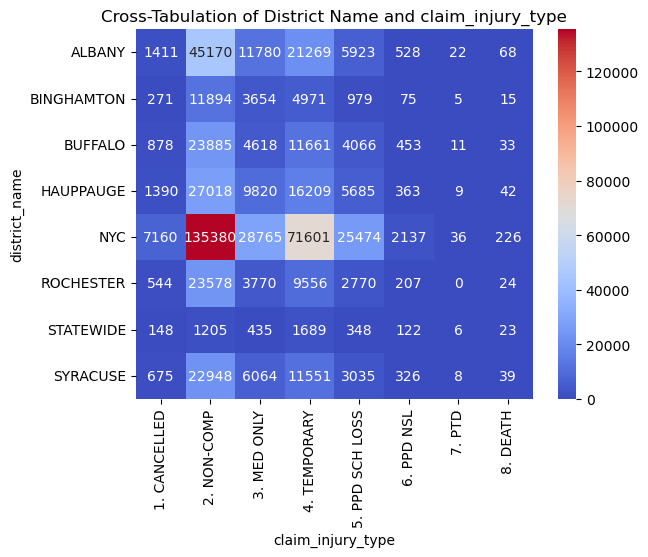

In [54]:
cross_tab = pd.crosstab(df['district_name'], df['claim_injury_type'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Cross-Tabulation of District Name and claim_injury_type')
plt.show()

The cross-tabulation reveals significant variation in claim injury types across districts, with NYC showing particularly high counts, especially in "Non-Comp" and "Temporary" claims. 

Other districts, like Hauppauge, Buffalo, and Syracuse, also show notable but smaller concentrations in similar categories, indicating that claim patterns vary widely by region. This regional disparity highlights potential differences in job types, working conditions, or claim filing practices across districts, with NYC having the most pronounced impact.


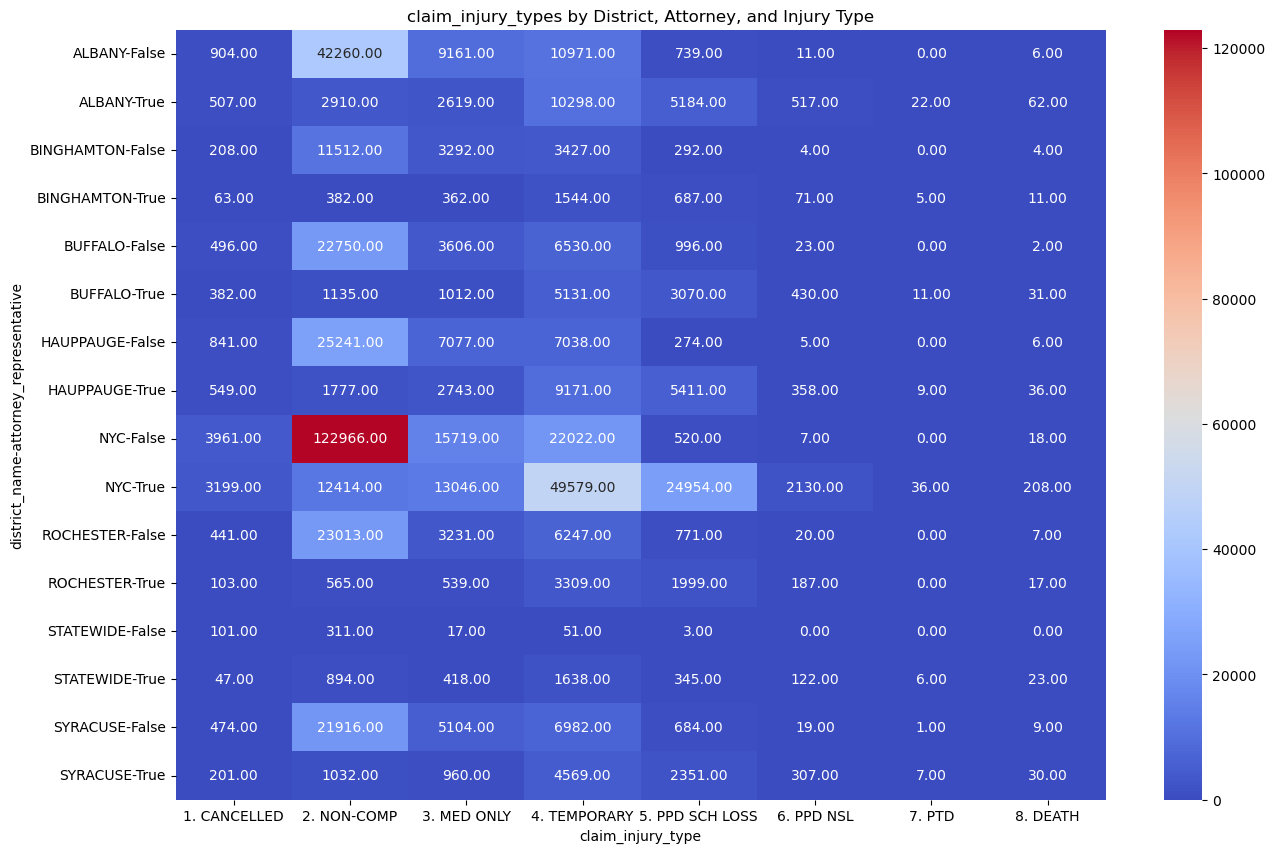

In [55]:
# Group the data by the specified columns
grouped_data = df.groupby(['district_name', 'claim_injury_type', 'attorney_representative'], observed=False).size()

# Convert the GroupBy object to a DataFrame for easier manipulation
grouped_df = grouped_data.reset_index(name='Count')

# Pivot the DataFrame to create a matrix-like structure
pivot_table = grouped_df.pivot_table(index=['district_name', 'attorney_representative'],
                                    columns='claim_injury_type',
                                    values='Count',
                                    observed=False,
                                    fill_value=0)

# Visualize the data using a heatmap
# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('claim_injury_types by District, Attorney, and Injury Type')
plt.show()

This cross-tabulation adds insight into how the presence of an attorney or representative affects claim injury types across different districts. In general, having an attorney ("-Y" rows) is associated with fewer overall claims, but these claims often show higher counts in categories like "PPD NSL" (Permanent Partial Disability with No Significant Loss) and "Temporary" claims, especially in NYC. For example, in NYC, the "Temporary" claims are significantly higher when an attorney is involved (49,313 vs. 21,962 without an attorney), suggesting that legal representation may lead to claims with potentially longer or more substantial recovery periods.

### 2.3.3 C-3 Date

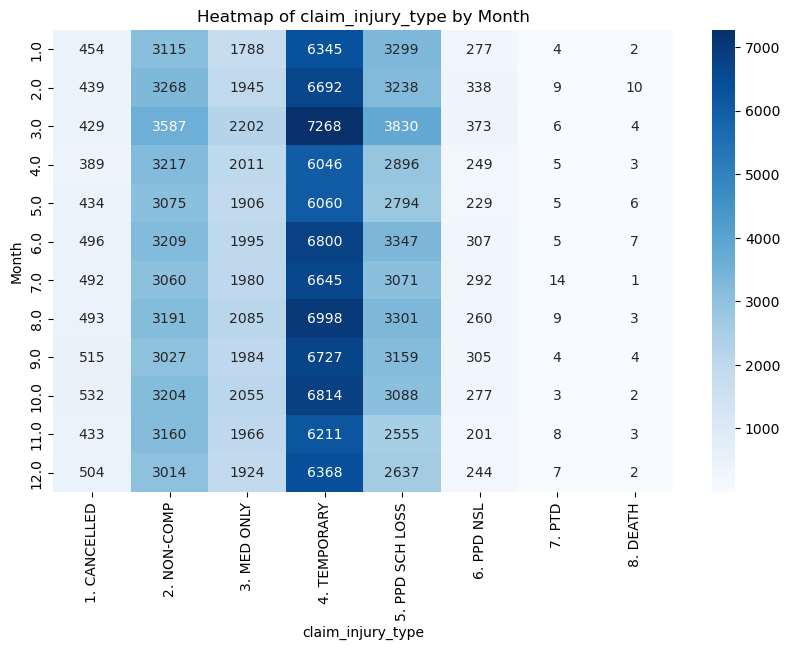

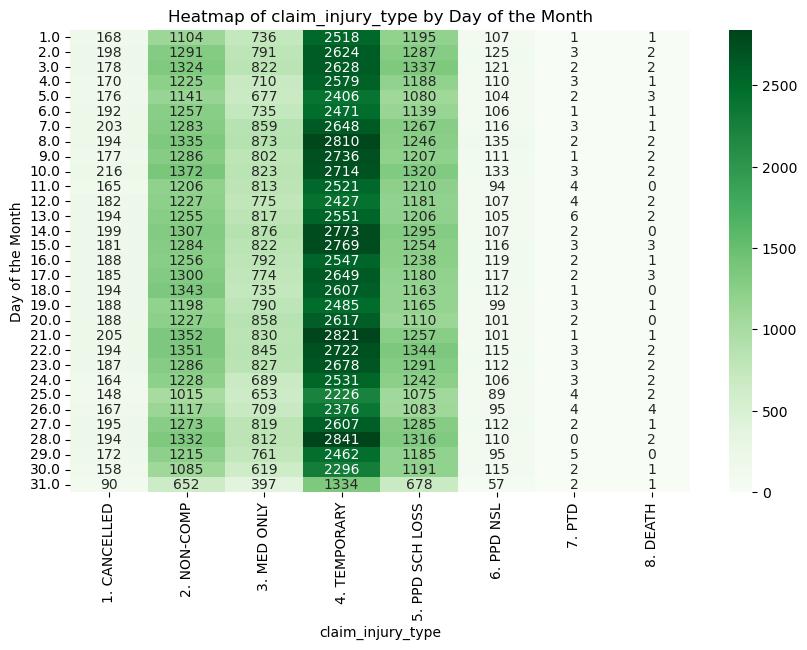

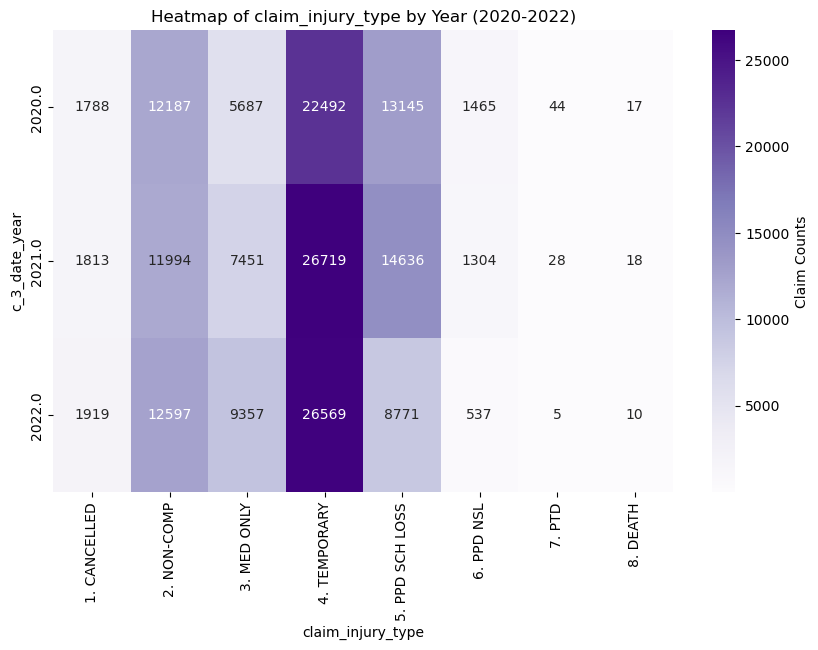

In [56]:
# Make sure 'c_3_date' is in datetime format

df_c3 = df.copy()  # Create a copy of df as df_c3
df_c3['c_3_date'] = pd.to_datetime(df_c3['c_3_date'], errors='coerce')  # Convert 'c_3_date' to datetime

# Create the new columns for 'Month', 'Day', and 'Year' from 'c_3_date'
df_c3['c_3_date_month'] = df_c3['c_3_date'].dt.month
df_c3['c_3_date_day'] = df_c3['c_3_date'].dt.day
df_c3['c_3_date_year'] = df_c3['c_3_date'].dt.year

# Filter out NaN values from both 'c_3_date' and 'claim_injury_type'
df_c3_clean = df_c3.dropna(subset=['c_3_date', 'claim_injury_type'])

# Heatmap of "Month" vs. "claim_injury_type"
month_claim_ct = pd.crosstab(df_c3_clean['c_3_date_month'], df_c3_clean['claim_injury_type'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(month_claim_ct, annot=True, cmap="Blues", fmt="d")
plt.title("Heatmap of claim_injury_type by Month")
plt.xlabel("claim_injury_type")
plt.ylabel("Month")
plt.show()

# Heatmap of "Day" vs. "claim_injury_type"
dow_claim_ct = pd.crosstab(df_c3_clean['c_3_date_day'], df_c3_clean['claim_injury_type'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dow_claim_ct, annot=True, cmap="Greens", fmt="d")
plt.title("Heatmap of claim_injury_type by Day of the Month")
plt.xlabel("claim_injury_type")
plt.ylabel("Day of the Month")
plt.show()

# Cross-tabulation for year and claim injury type
year_claim_ct = pd.crosstab(df_c3_clean['c_3_date_year'], df_c3_clean['claim_injury_type'])

# Filter to include only years from 2020 to 2022
year_claim_ct = year_claim_ct[(year_claim_ct.index >= 2020) & (year_claim_ct.index <= 2022)]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(year_claim_ct, annot=True, cmap="Purples", fmt="d", cbar_kws={'label': 'Claim Counts'})
plt.title("Heatmap of claim_injury_type by Year (2020-2022)")
plt.show()


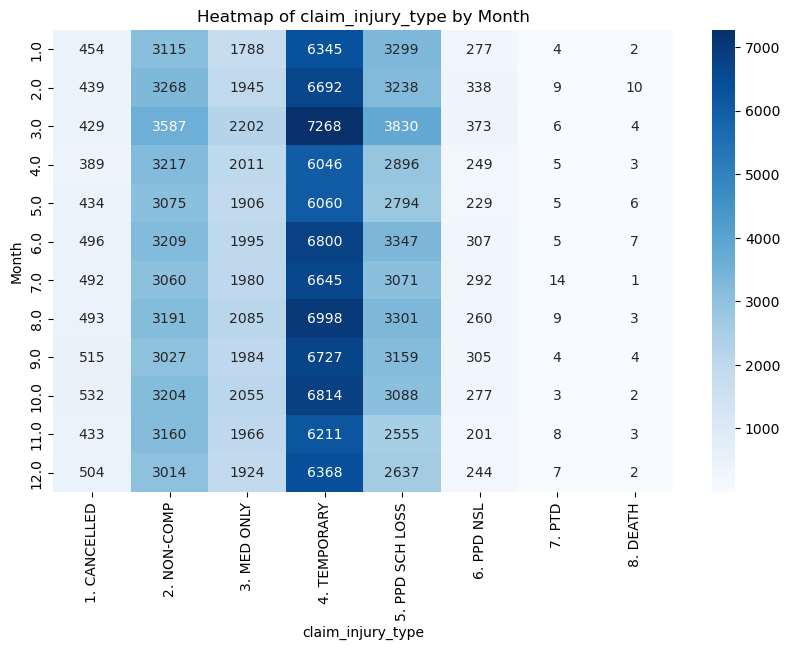

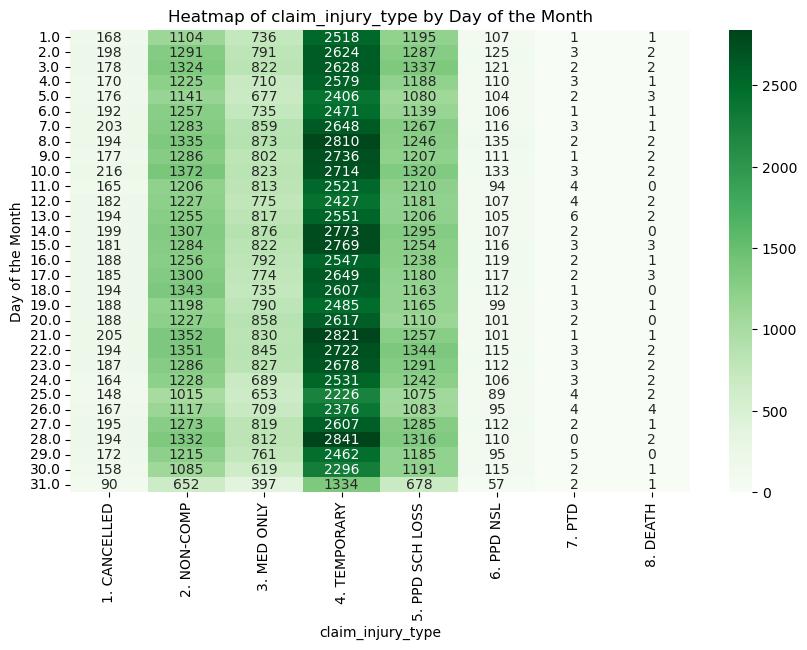

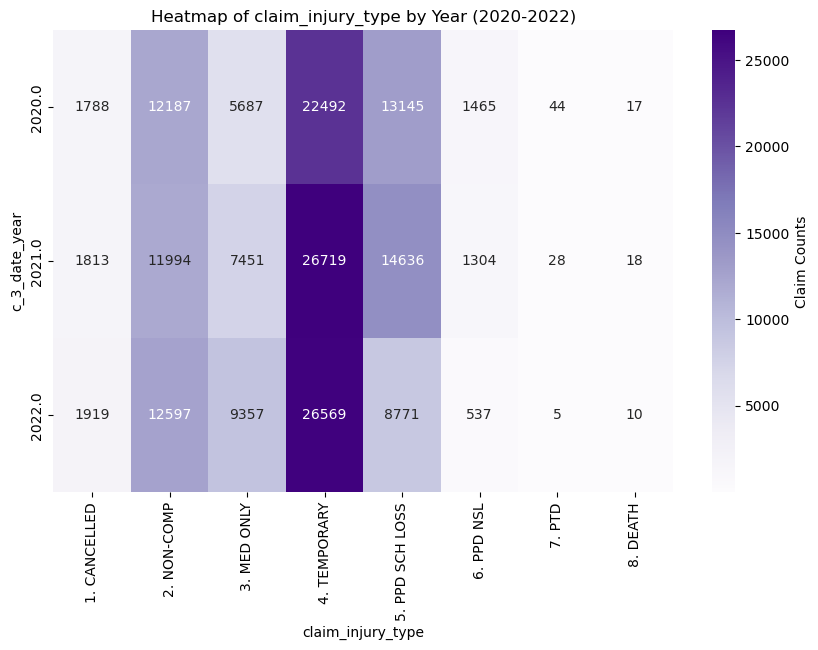

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure 'c_3_date' is in datetime format
df_c3 = df.copy()  # Create a copy of df as df_c3
df_c3['c_3_date'] = pd.to_datetime(df_c3['c_3_date'], errors='coerce')  # Convert 'c_3_date' to datetime

# Create the new columns for 'Month', 'Day', and 'Year' from 'c_3_date'
df_c3['c_3_date_month'] = df_c3['c_3_date'].dt.month
df_c3['c_3_date_day'] = df_c3['c_3_date'].dt.day
df_c3['c_3_date_year'] = df_c3['c_3_date'].dt.year

# Filter out NaN values from both 'c_3_date' and 'claim_injury_type'
df_c3_clean = df_c3.dropna(subset=['c_3_date', 'claim_injury_type'])

# Heatmap of "Month" vs. "claim_injury_type"
month_claim_ct = pd.crosstab(df_c3_clean['c_3_date_month'], df_c3_clean['claim_injury_type'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(month_claim_ct, annot=True, cmap="Blues", fmt="d")
plt.title("Heatmap of claim_injury_type by Month")
plt.xlabel("claim_injury_type")
plt.ylabel("Month")
plt.show()

# Heatmap of "Day" vs. "claim_injury_type"
dow_claim_ct = pd.crosstab(df_c3_clean['c_3_date_day'], df_c3_clean['claim_injury_type'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dow_claim_ct, annot=True, cmap="Greens", fmt="d")
plt.title("Heatmap of claim_injury_type by Day of the Month")
plt.xlabel("claim_injury_type")
plt.ylabel("Day of the Month")
plt.show()

# Cross-tabulation for year and claim injury type
year_claim_ct = pd.crosstab(df_c3_clean['c_3_date_year'], df_c3_clean['claim_injury_type'])

# Filter to include only years from 2020 to 2022
year_claim_ct = year_claim_ct[(year_claim_ct.index >= 2020) & (year_claim_ct.index <= 2022)]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(year_claim_ct, annot=True, cmap="Purples", fmt="d", cbar_kws={'label': 'Claim Counts'})
plt.title("Heatmap of claim_injury_type by Year (2020-2022)")
plt.show()


In [58]:
# Perform one-way ANOVA on 'month' with 'claim_injury_type' as the grouping variable
anova_result = stats.f_oneway(
    *[df_c3_clean[df_c3_clean['claim_injury_type'] == claim_type]['c_3_date'].dt.month for claim_type in df_c3_clean['claim_injury_type'].unique()]
)

# Print the results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")


ANOVA F-statistic: 22.057706068677515
ANOVA p-value: 4.967681056152684e-30


### 2.3.4 Gender

In [59]:
grouped_gender = df.groupby(['gender', 'claim_injury_type'], observed=False).size()

grouped_gender

gender  claim_injury_type
False   1. CANCELLED           4171
        2. NON-COMP          129243
        3. MED ONLY           28110
        4. TEMPORARY          56128
        5. PPD SCH LOSS       14625
        6. PPD NSL             1691
        7. PTD                   23
        8. DEATH                 60
True    1. CANCELLED           8306
        2. NON-COMP          161835
        3. MED ONLY           40796
        4. TEMPORARY          92379
        5. PPD SCH LOSS       33655
        6. PPD NSL             2520
        7. PTD                   74
        8. DEATH                410
dtype: int64

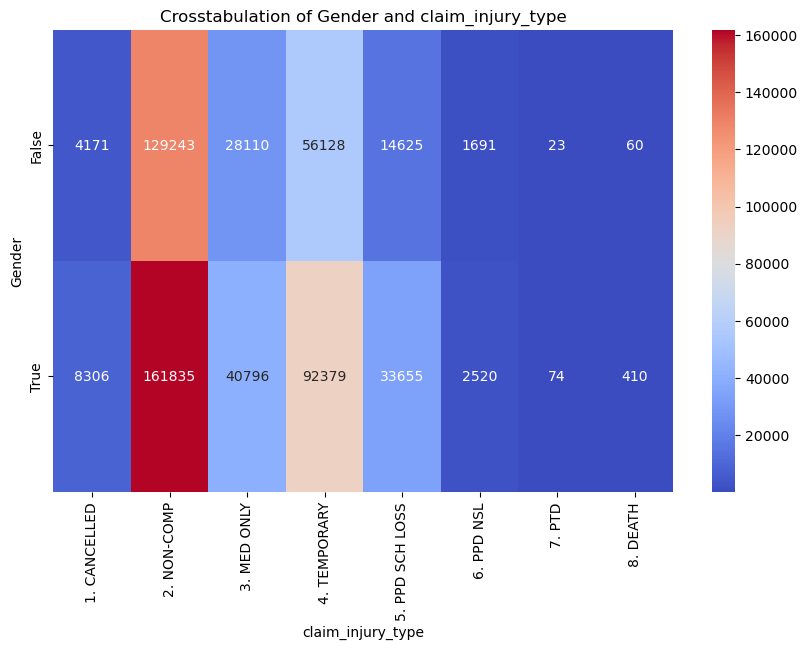

In [60]:
crosstab = pd.crosstab(df['gender'], df['claim_injury_type'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Crosstabulation of Gender and claim_injury_type')
plt.xlabel('claim_injury_type')
plt.ylabel('Gender')
plt.show()

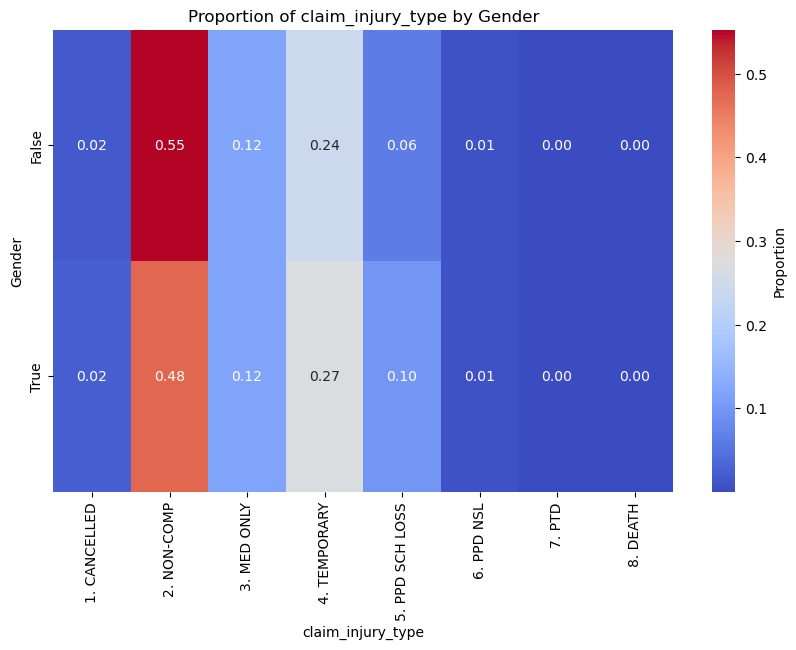

In [61]:
# Create the crosstab with proportions
crosstab = pd.crosstab(df['gender'], df['claim_injury_type'], normalize='index')  # normalize by row (Gender)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of claim_injury_type by Gender')
plt.xlabel('claim_injury_type')
plt.ylabel('Gender')
plt.show()


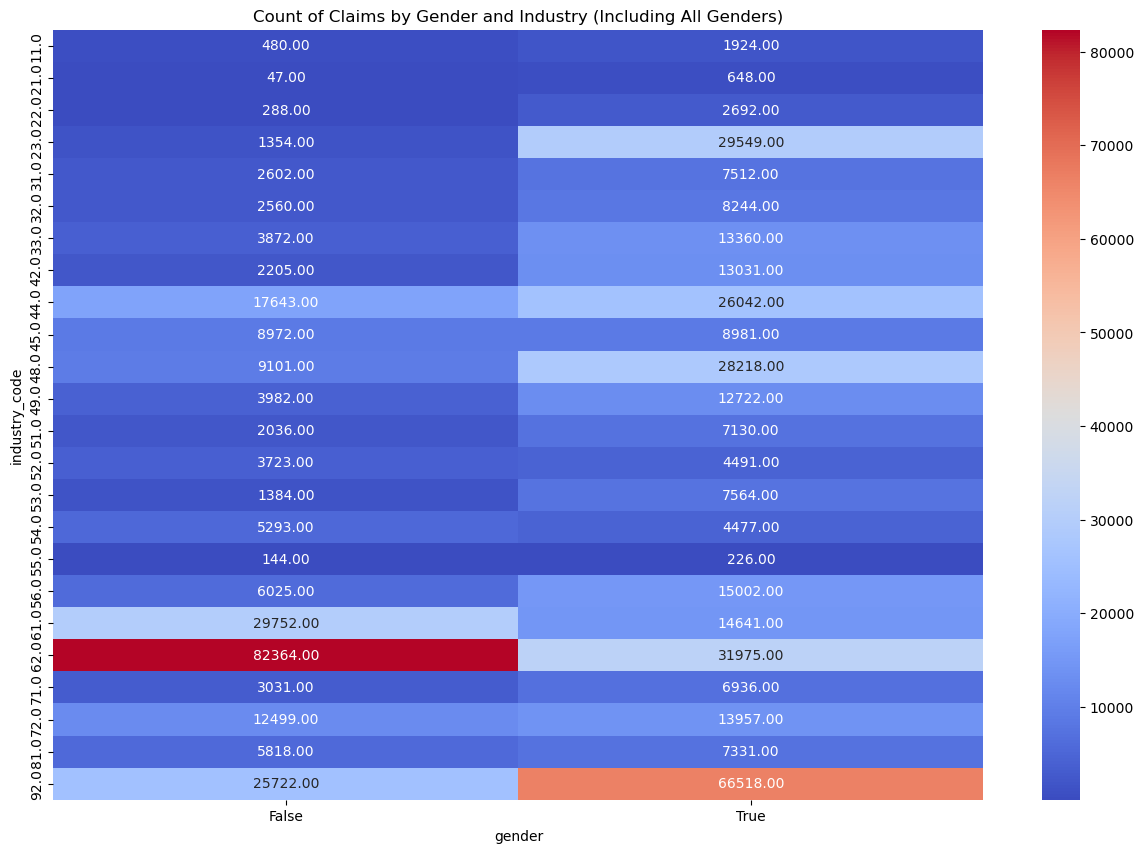

In [62]:
filtered_df = df.copy()  

# Group the data by gender and industry, counting the occurrences
grouped_data = filtered_df.groupby(['gender', 'industry_code'], observed=False).size()

# Convert the GroupBy object to a DataFrame
grouped_df = grouped_data.reset_index(name='Count')

# Pivot the DataFrame to create a matrix-like structure
pivot_table = grouped_df.pivot_table(index='industry_code',
                                      columns='gender',
                                      values='Count',
                                      observed=False,
                                      fill_value=0)

# Visualize the data using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Count of Claims by Gender and Industry (Including All Genders)')
plt.show()

The heatmap displays the distribution of injury claims by gender across various industries, revealing notable gender and industry disparities. The Health Care and Social Assistance industry stands out, with a significantly high number of claims, particularly among females, suggesting greater representation or risk within this sector. Similarly, Public Administration and Transportation and Warehousing show elevated claims for males. Overall, the data highlights industry-specific risk trends and gender imbalances, which may reflect differing occupational exposures or workforce compositions across sectors.

In [63]:
crosstab = pd.crosstab(df['gender'], df['claim_injury_type'])

chi2, p, dof, expected = stats.chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 4772.282113531735
p-value: 0.0
Degrees of freedom: 7
Expected frequencies: [[5.08732066e+03 1.18682946e+05 2.80954490e+04 6.05516333e+04
  1.96854886e+04 1.71697582e+03 3.95503810e+01 1.91635867e+02]
 [7.38967934e+03 1.72395054e+05 4.08105510e+04 8.79553667e+04
  2.85945114e+04 2.49402418e+03 5.74496190e+01 2.78364133e+02]]


The Chi-square analysis (statistic = 5657.86, p-value = 0.0) indicates a highly significant association between the variables studied. The observed and expected claim frequencies differ considerably, confirming that the distribution of claim types varies across the categories analyzed. With 21 degrees of freedom, this outcome underscores that factors like COVID-19 status, industry, and other demographic or situational variables meaningfully affect injury claim patterns. However, the moderate expected frequencies suggest that while these factors are impactful.

### 2.3.5 IME-4 Count   

In [64]:
grouped_ime4 = df.groupby(['ime_4_count', 'claim_injury_type'], observed=False).size()


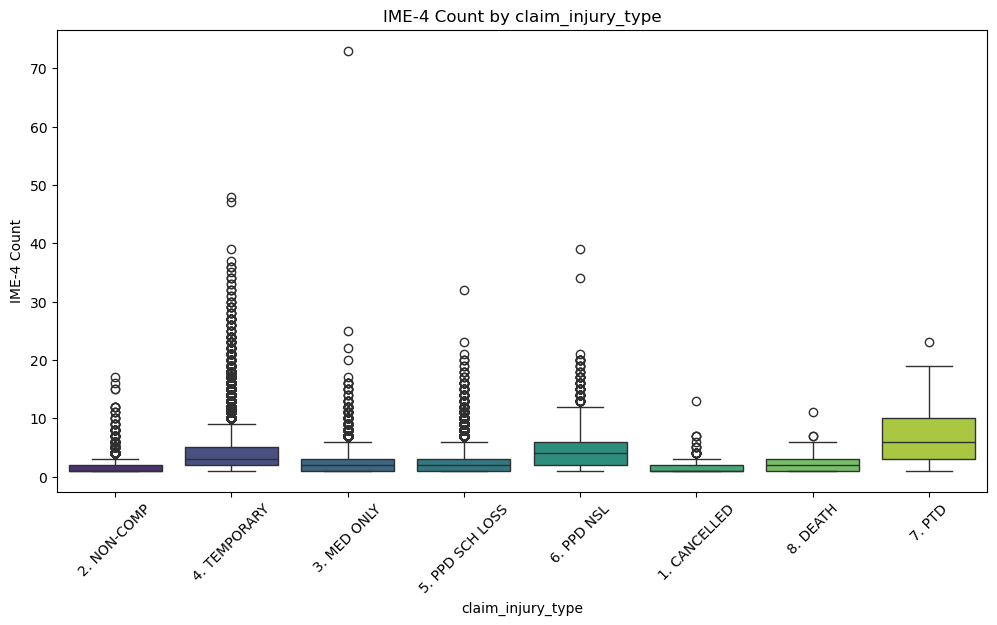

In [65]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='claim_injury_type', y='ime_4_count', data=df, hue='claim_injury_type', palette='viridis', legend=False)
plt.title('IME-4 Count by claim_injury_type')
plt.xlabel('claim_injury_type')
plt.ylabel('IME-4 Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


 More severe claim injury types (e.g., temporary, PPD SCH LOSS, PPD NSL, and PTD) tend to have a higher number of IME-4 forms.
 This suggests that more serious injuries might require additional medical examinations and evaluations, leading to a higher number of IME-4 forms.

### 2.3.6 Age at Injury

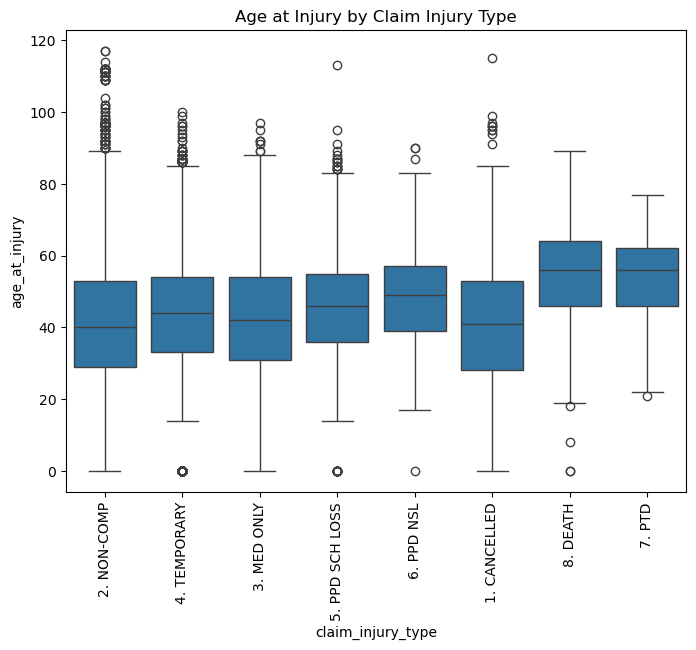

In [66]:
# Example: relationship between 'Age at Injury' and target
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='claim_injury_type', y='age_at_injury')
plt.title("Age at Injury by Claim Injury Type")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()



## Key Insights 

Below a summary of the key insights we have found to be driving claim types.

- Males have a higher incidence of most injury types, especially Non-Compensable and Temporary claims.

- The Non-Compensable claim type (2. NON-COMP) has the highest count across most injury severity codes.

-  Temporary claims (4. TEMPORARY) are the second most frequent claim type. This indicates that many injuries are serious enough to require compensation but are not considered permanent disabilities.
  
 - These claims are spread across various WCIO injury severity codes, with higher counts for lower severity codes (15 and 30), suggesting that temporary injuries are more common for less severe injuries.
      
- The Med-Only claim type (3. MED ONLY) is also relatively common, primarily associated with lower severity codes. This type is likely awarded for injuries that require medical attention but no wage replacement.

- The most severe injury types (e.g., Death, Permanent Total Disability (PTD), and Permanent Partial Disability Scheduled Loss (PPD SCH LOSS)) have low counts across all WCIO Nature of Injury Codes. This reflects that such outcomes are rare relative to non-compensable or temporary injuries.

- WCIO Nature of Injury Code values in the chart, ranging from 15 to 90, appear to affect the claim type distribution, with lower severity codes (e.g., 15, 30) having higher claim counts.
Darker bars (higher severity codes like 75 and 90) are less frequent across all claim types, indicating that severe injuries are less common in the dataset.


# 3. Feature Treament and Engineering

## 3.0 Parsing the absence of information, and time intelligence

The next sequence of steps extracts all usefull information from dates, and missing data before solving deterministically for some of our date data's inconsitencies.

In [27]:
# Lists to store different types of new columns and feature names
distances = []
dates = []
missing = []

# Mapping for the columns
col_mapping = {
    'c_2_date': 'c2',
    'c_3_date': 'c3',
    'assembly_date': 'asb',
    'first_hearing_date': 'fh'
}

### 3.0.0 Capturing absence

In [28]:
# Feature name lists to categorize different features
missing = []
missing_features = []
date_distance_features = []

# Step 1: Coerce missing values to NaT format and calculate missing values
for col in df.columns:
    if col in datetime_features:
        # Coerce missing values to NaT format
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Ensure any remaining NaN values are converted to NaT for consistency
        df[col] = df[col].where(df[col].notna(), pd.NaT)
        
    # Calculate missing values and store them as 'nan_<mapped value>'
    missing_col_name = f'missing_{col}'
    missing.append(df[col].isna().astype('float64').rename(missing_col_name))
    
    # Append the missing indicator to `missing_features`
    missing_features.append(missing_col_name)

df = pd.concat([df] + missing, axis=1)


In [29]:
# Feature name lists to categorize different features
test_missing = []

# Step 1: Coerce missing values to NaT format and calculate missing values
for col in test_df.columns:
    if col in datetime_features:
        # Coerce missing values to NaT format
        test_df[col] = pd.to_datetime(test_df[col], errors='coerce')
        
        # Ensure any remaining NaN values are converted to NaT for consistency
        test_df[col] = test_df[col].where(test_df[col].notna(), pd.NaT)
        
    # Calculate missing values and store them as 'nan_<mapped value>'
    missing_col_name = f'missing_{col}'
    test_missing.append(test_df[col].isna().astype('float64').rename(missing_col_name))
    
test_df = pd.concat([test_df] + test_missing, axis=1)


#### Last observation carried forward

After capturing missingness, we need to impute using the LOCF method, before the remainder so as to not polute the set with a tremendous ammount of nan.

In [30]:
missing_dates = [
    'missing_assembly_date',
    'missing_c_2_date',
    'missing_c_3_date'
]

filling_dates = [
    'assembly_date', # Luckily there are no missing assembly dates
    'c_2_date',
    'c_3_date'
]

df.loc[df[missing_dates].any(axis=1), filling_dates] = \
    df.loc[
        df[missing_dates].any(axis=1)
        , filling_dates
    ].apply(
        lambda row: row.fillna(row.min() + pd.Timedelta(days=3)), axis=1
    )


In [31]:
test_df.loc[test_df[missing_dates].any(axis=1), filling_dates] = \
    test_df.loc[
        test_df[missing_dates].any(axis=1)
        , filling_dates
    ].apply(
        lambda row: row.fillna(row.min() + pd.Timedelta(days=3)), axis=1
    )

### 3.0.1 Capturing distances in time

In [32]:
distances = []

# Step 2: Calculate pairwise date distances and store in `distances` list
for i, col in enumerate(datetime_features):
    for other_col in datetime_features[i+1:]:
        # Use the mapping to define the column name for the distance feature
        col_num = col_mapping.get(col, -1)
        other_col_num = col_mapping.get(other_col, -1)
        
        if col_num == -1 or other_col_num == -1:
            continue  # Skip if one of the columns isn't in the mapping
        
        col_name = f'dd_{col_num}_{other_col_num}'
        
        # Calculate the distance in days if both dates are not NaT
        distances.append(
            df.apply(
                lambda row: (row[col] - row[other_col]).days
                            if pd.notna(row[col]) and pd.notna(row[other_col])
                            else np.nan,
                axis=1
            ).astype('float64').rename(col_name)
        )
        
        # Append the distance feature name to `date_distance_features`
        date_distance_features.append(col_name)

In [33]:
test_distances = []

# Step 2: Calculate pairwise date distances and store in `distances` list
for i, col in enumerate(datetime_features):
    for other_col in datetime_features[i+1:]:
        # Use the mapping to define the column name for the distance feature
        col_num = col_mapping.get(col, -1)
        other_col_num = col_mapping.get(other_col, -1)
        
        if col_num == -1 or other_col_num == -1:
            continue  # Skip if one of the columns isn't in the mapping
        
        col_name = f'dd_{col_num}_{other_col_num}'
        
        # Calculate the distance in days if both dates are not NaT
        test_distances.append(
            test_df.apply(
                lambda row: (row[col] - row[other_col]).days
                            if pd.notna(row[col]) and pd.notna(row[other_col])
                            else np.nan,
                axis=1
            ).astype('float64').rename(col_name)
        )     

### 3.0.2 Capturing magnitude in time

In [34]:
dates = []

# Step 3: Convert each datetime column and create basic date-related features
for col in df.columns:
    if col in datetime_features:
        
        # Extract year, month, and day features
        year_col = f'{col}_year'
        month_col = f'{col}_month'
        day_col = f'{col}_day'
        
        dates.append(df[col].dt.year.rename(year_col).astype('float64'))
        dates.append(df[col].dt.month.rename(month_col).astype('float64'))
        dates.append(df[col].dt.day.rename(day_col).astype('float64'))
        
        # Extend `datetime_features` with new year, month, and day features
        datetime_features.extend([year_col, month_col, day_col])

# Step 4: Concatenate all the new features into the original DataFrame
df = pd.concat([df] + distances + dates, axis=1)

# At the end, we have the following lists:
# - `datetime_features`: Holds the names of the original datetime columns plus the new year, month, and day features.
# - `date_distance_features`: Holds the names of the calculated date distance features.
# - `missing_features`: Holds the names of all the missing indicator columns.

# Example display of results to verify structure
print("Datetime Features:", datetime_features)
print("Date Distance Features:", date_distance_features)
print("Missing Features:", missing_features)

df.head()  # looks_good, absolutely insane, but good

Datetime Features: ['accident_date', 'first_hearing_date', 'assembly_date', 'c_2_date', 'c_3_date', 'accident_date_year', 'accident_date_month', 'accident_date_day', 'assembly_date_year', 'assembly_date_month', 'assembly_date_day', 'c_2_date_year', 'c_2_date_month', 'c_2_date_day', 'c_3_date_year', 'c_3_date_month', 'c_3_date_day', 'first_hearing_date_year', 'first_hearing_date_month', 'first_hearing_date_day']
Date Distance Features: ['dd_fh_asb', 'dd_fh_c2', 'dd_fh_c3', 'dd_asb_c2', 'dd_asb_c3', 'dd_c2_c3']
Missing Features: ['missing_accident_date', 'missing_age_at_injury', 'missing_alternative_dispute_resolution', 'missing_assembly_date', 'missing_attorney_representative', 'missing_average_weekly_wage', 'missing_birth_year', 'missing_c_2_date', 'missing_c_3_date', 'missing_carrier_name', 'missing_carrier_type', 'missing_claim_injury_type', 'missing_county_of_injury', 'missing_covid_19_indicator', 'missing_district_name', 'missing_first_hearing_date', 'missing_gender', 'missing_ime_

accident_date  age_at_injury  alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year   c_2_date   c_3_date                  carrier_name carrier_type claim_injury_type county_of_injury  covid_19_indicator district_name first_hearing_date  gender  ime_4_count industry_code                          industry_code_description medical_fee_region wcio_cause_of_injury_code wcio_cause_of_injury_description wcio_nature_of_injury_code wcio_nature_of_injury_description wcio_part_of_body_code wcio_part_of_body_description zip_code  number_of_dependents  target  missing_accident_date  missing_age_at_injury  missing_alternative_dispute_resolution  missing_assembly_date  missing_attorney_representative  missing_average_weekly_wage  missing_birth_year  missing_c_2_date  missing_c_3_date  missing_carrier_name  missing_carrier_type  missing_claim_injury_type  missing_county_of_injury  missing_covid_19_indicator  missing_district_name  \
claim_identifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
5393875             2019-12-30           31.0                             0.0    2020-01-01                      0.0                 0.00      1988.0 2019-12-31 2020-01-03    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE       2. NON-COMP     ST. LAWRENCE                 0.0      SYRACUSE                NaT     1.0          NaN          44.0                                       RETAIL TRADE                  I                      27.0     FROM LIQUID OR GREASE SPILLS                       10.0                         CONTUSION                   62.0                      BUTTOCKS    13662                   1.0     2.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               1.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0   
5393091             2019-08-30           46.0                             0.0    2020-01-01                      1.0              1745.93      1973.0 2020-01-01 2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE      4. TEMPORARY          WYOMING                 0.0     ROCHESTER         2020-02-21     0.0          4.0          23.0                                       CONSTRUCTION                  I                      97.0                REPETITIVE MOTION                       49.0                    SPRAIN OR TEAR                   38.0                   SHOULDER(S)    14569                   4.0     4.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0   
5393889             2019-

In [35]:
# Step 3: Convert each datetime column and create basic date-related features
test_dates = []

for col in test_df.columns:
    if col in datetime_features:
        
        # Extract year, month, and day features
        year_col = f'{col}_year'
        month_col = f'{col}_month'
        day_col = f'{col}_day'
        
        test_dates.append(test_df[col].dt.year.rename(year_col).astype('float64'))
        test_dates.append(test_df[col].dt.month.rename(month_col).astype('float64'))
        test_dates.append(test_df[col].dt.day.rename(day_col).astype('float64'))
        

# Step 4: Concatenate all the new features into the original DataFrame
test_df = pd.concat([test_df] + test_distances + test_dates, axis=1)


test_df.head()  # looks_good, absolutely insane, but good


accident_date  age_at_injury  alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year   c_2_date   c_3_date                  carrier_name carrier_type county_of_injury  covid_19_indicator district_name first_hearing_date  gender  ime_4_count industry_code                          industry_code_description medical_fee_region wcio_cause_of_injury_code wcio_cause_of_injury_description wcio_nature_of_injury_code wcio_nature_of_injury_description wcio_part_of_body_code wcio_part_of_body_description zip_code  number_of_dependents  missing_accident_date  missing_age_at_injury  missing_alternative_dispute_resolution  missing_assembly_date  missing_attorney_representative  missing_average_weekly_wage  missing_birth_year  missing_c_2_date  missing_c_3_date  missing_carrier_name  missing_carrier_type  missing_county_of_injury  missing_covid_19_indicator  missing_district_name  missing_first_hearing_date  missing_gender  \
claim_identifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
6165911             2022-12-24           31.0                             0.0    2023-01-02                      0.0                 0.00      1988.0 2023-01-02 2023-01-05    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE     ST. LAWRENCE                 0.0      SYRACUSE                NaT     1.0          NaN          44.0                                       RETAIL TRADE                  I                      27.0     FROM LIQUID OR GREASE SPILLS                       10.0                         CONTUSION                   62.0                      BUTTOCKS    13662                   1.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               1.0                   0.0                   0.0                       0.0                         0.0                    0.0                         1.0             0.0   
6166141             2022-11-20           46.0                             0.0    2023-01-02                      1.0              1745.93      1973.0 2023-01-02 2023-01-05  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE          WYOMING                 0.0     ROCHESTER                NaT     0.0          4.0          23.0                                       CONSTRUCTION                  I                      97.0                REPETITIVE MOTION                       49.0                    SPRAIN OR TEAR                   38.0                   SHOULDER(S)    14569                   4.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               1.0                   0.0                   0.0                       0.0                         0.0                    0.0                         1.0             0.0   
6165907             2022-12-26           40.0                

### 3.0.3. Capturing the structure of time

#### Keep it simple stupid

From the investigation of the documentation available online, it became obvious that several facts about them are important, as well as their orders. The process begins when a claim is put forth, by any party to the issue; this includes an employer, a worker, a healthcare service provider, or a legal representative of the worker; moreover, the board can also be made aware and take action if the situation is notorious and obvious enough.

This means that there are several orders to consider:

- C2, C3, Assembly
- C2, Assembly, C3
- C3, Assembly, C2
- C3, C2, Assembly
- Assembly, C2, C3
- Assembly, C3, C2

However, while there cannot be a first hearing before having been assembled, there can definetly be the case that a first hearing takes place before the submission of a document, so we can expand further as:

- C3, C2, Assembly, first_hearing
- C2, C3, Assembly, first_hearing

- C2, Assembly, first_hearing, C3
- C2, Assembly, C3, first_hearing

- C3, Assembly, first_hearing, C2
- C3, Assembly, C2, first_hearing
 
- Assembly, first_hearing, C2, C3
- Assembly, C2, first_hearing, C3
- Assembly, C2, C3, first_hearing

- Assembly, first_hearing, C3, C2
- Assembly, C3, first_hearing, C2
- Assembly, C3, C2, first_hearing


But we can definetly be smart about this, and create an encoding rule for this information, one that preferably is resistant to the case when dates are the same. Instead of creating 12 distinct categories, let each date be assigned 4 bits, such that, the first two bits encode how many other dates are the same for the observation, and the second two what position it occupies in the order; that way we can use 16 bits to represent.

In [36]:
def encode_dates(df):
    # Initialize a list to store the names of the 16 binary columns
    do_columns = [f'do_{i+1}' for i in range(16)]

    # Iterate over the rows of the dataframe
    for _, row in df.iterrows():
        # Extract the dates from the row
        c2_date = row['c_2_date']
        c3_date = row['c_3_date']
        assembly_date = row['assembly_date']
        first_hearing_date = row['first_hearing_date']
        
        # Put the dates in a list to facilitate ordering and comparisons
        dates = [c2_date, c3_date, assembly_date, first_hearing_date]
        
        # Initialize a list to store the binary values
        binary_vector = []
        
        # Iterate through each date and calculate its 4-bit encoding
        for i, date in enumerate(dates):
            # Count how many other dates are equal to the current date
            matches = sum(1 for other_date in dates if date == other_date)
            
            # Determine the position of the current date in the order
            ordered_dates = sorted(dates)  # Sort the dates to determine the order
            position = ordered_dates.index(date)  # Find the position of the date in the sorted list
            
            # Encode the current date into a 4-bit group
            # First two bits: number of matches (between 0-3)
            # Last two bits: position in the order (between 0-3)
            binary_value = f'{matches:02b}{position:02b}'
            binary_vector.extend([bit for bit in binary_value])  # Split into individual bits and add to the vector
        
        # Now, assign the binary values to the corresponding columns
        for col, value in zip(do_columns, binary_vector):
            df.at[_, col] = value  # Assign each bit to its respective column
        
    return df


df = encode_dates(df)
test_df = encode_dates(test_df)

# Creating the list of these new features
date_order_features = [f'do_{i+1}' for i in range(16)]

# Casting them as type float for consistency
for feature in date_order_features:
    df[feature] = df[feature].astype('float64')
    test_df[feature] = test_df[feature].astype('float64')



In [37]:
# Viewing the resulting DataFrame with the encoded date order
df[['c_2_date', 'c_3_date', 'assembly_date', 'first_hearing_date'] + [f'do_{i+1}' for i in range(16)]] # looks_good


c_2_date   c_3_date assembly_date first_hearing_date  do_1  do_2  do_3  do_4  do_5  do_6  do_7  do_8  do_9  do_10  do_11  do_12  do_13  do_14  do_15  do_16
claim_identifier                                                                                                                                                              
5393875          2019-12-31 2020-01-03    2020-01-01                NaT   0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0
5393091          2020-01-01 2020-01-14    2020-01-01         2020-02-21   1.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0
5393889          2020-01-01 2020-01-04    2020-01-01                NaT   1.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0
5393887          2019-12-31 2020-01-03    2020-01-01                NaT   0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0
5393863          2019-12-31 2020-01-03    2020-01-01                NaT   0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0
...                     ...        ...           ...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...    ...
6165265          2022-12-30 2023-01-02    2022-12-30                NaT   1.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0
6165285          2022-12-31 2023-01-03    2022-12-31                NaT   1.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0
6165506          2022-12-31 2023-01-03    2022-12-31                NaT   1.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0
6165339          2022-12-31 2023-01-03    2022-12-31                NaT   1.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0
6165075          2022-12-31 2023-01-03    2022-12-31                NaT   1.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0

[574026 rows x 20 columns]

### 3.0.4 Deterministic imputation of dates, or, solving for time. 

The relation between accident_date, birth_year, and age can be expressed in the language of algebra using a simple linear combination, therefore, we may use this to our advantage and impute however many values are possible and useful to us, and then do away with one of them. We decided to drop birth year, as it is the more extemporaneous of the trio.

In [38]:
# filling age_at_injury
mask = df['age_at_injury'].isnull() & df['accident_date'].notnull() & df['birth_year'].notnull()
df.loc[mask, 'age_at_injury'] = df['accident_date_year'] - df['birth_year']

# filling birth_year
# mask = df['birth_year'].isnull() & df['accident_date'].notnull() & df['age_at_injury'].notnull()
# df.loc[mask, 'birth_year'] = df['accident_date_year'] - df['age_at_injury']

# For the actual accident date the best we can do is fill in the year, otherwise we would be introducing bias into the model towards the 1st of the year with respect to any patterns that might exist in the missingness of the data, however our previous investigation showed that age at birth was always '0' for these observations, which means that we have insufficient information with which to carry out the imputation.

# filling accident_date_year
mask = df['accident_date_year'].isnull() & df['birth_year'].notnull() & df['age_at_injury'].notnull()
df.loc[mask, 'accident_date_year'] = df['age_at_injury'] + df['birth_year']


In [39]:
# filling age_at_injury
mask = test_df['age_at_injury'].isnull() & test_df['accident_date'].notnull() & test_df['birth_year'].notnull()
test_df.loc[mask, 'age_at_injury'] = test_df['accident_date_year'] - test_df['birth_year']

# filling accident_date_year
mask = test_df['accident_date_year'].isnull() & test_df['birth_year'].notnull() & test_df['age_at_injury'].notnull()
test_df.loc[mask, 'accident_date_year'] = test_df['age_at_injury'] + test_df['birth_year']


##### *In a future iteration of this notebook we might consider extracting information such as weekdays, and holidays.*

## 3.1 Correcting Inconsistent values - issue by issue

Inconsistent values are those that are either impossible, or that are not allowed according to the domains rules, the next steps are dedicated to discussing and correcting them, issue by issue.

### 3.1.0. Accident date is missing

This is perhaps one of the more interesting puzzles in the entire dataset; but when we consider the logic of claims, and claimants we can derive meaning from this absence. For one, all of these claimants fail to provide an age at injury, as there is no injury to be had.

In [40]:
[df.loc[df['accident_date'].isna(), col].value_counts() for col in df.columns]

[Series([], Name: count, dtype: int64),
 age_at_injury
 0.0    3689
 Name: count, dtype: int64,
 alternative_dispute_resolution
 0.0    3672
 1.0      17
 Name: count, dtype: int64,
 assembly_date
 2021-04-06    16
 2020-09-29    15
 2021-03-25    14
 2020-07-13    14
 2022-07-19    14
 2020-01-30    13
 2021-01-29    13
 2020-07-16    13
 2021-11-17    13
 2020-11-04    13
 2021-05-13    13
 2021-04-20    12
 2020-09-03    12
 2021-03-23    12
 2020-12-29    11
 2020-10-19    11
 2020-06-17    11
 2020-07-23    11
 2020-07-21    11
 2022-11-16    11
 2020-08-10    11
 2020-08-31    11
 2021-03-15    11
 2020-01-13    11
 2020-01-17    11
 2022-03-28    10
 2020-08-18    10
 2021-04-27    10
 2020-03-11    10
 2020-10-15    10
 2021-04-21    10
 2022-05-19    10
 2021-12-20    10
 2022-07-26    10
 2022-05-17    10
 2020-08-07    10
 2020-02-13    10
 2020-04-20    10
 2020-07-14    10
 2020-01-23    10
 2021-03-09     9
 2021-03-04     9
 2020-12-03     9
 2021-01-28     9
 2020-04-27

In [41]:
df.loc[df['accident_date'].isna(), : ]

accident_date  age_at_injury  alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year   c_2_date   c_3_date                    carrier_name     carrier_type claim_injury_type county_of_injury  covid_19_indicator district_name first_hearing_date  gender  ime_4_count industry_code       industry_code_description medical_fee_region wcio_cause_of_injury_code     wcio_cause_of_injury_description wcio_nature_of_injury_code wcio_nature_of_injury_description wcio_part_of_body_code wcio_part_of_body_description zip_code  number_of_dependents  target  missing_accident_date  missing_age_at_injury  missing_alternative_dispute_resolution  missing_assembly_date  missing_attorney_representative  missing_average_weekly_wage  missing_birth_year  missing_c_2_date  missing_c_3_date  missing_carrier_name  missing_carrier_type  missing_claim_injury_type  missing_county_of_injury  missing_covid_19_indicator  missing_district_name  \
claim_identifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
5394068                    NaT            0.0                             0.0    2020-01-02                      1.0                  0.0      1959.0 2019-12-26 2019-12-23  STARR INDEMNITY & LIABILITY CO      1A. PRIVATE       2. NON-COMP            BRONX                 0.0           NYC                NaT     1.0          NaN          23.0                    CONSTRUCTION                 IV                       NaN                                  NaN                        NaN                               NaN                    NaN                           NaN      NaN                   6.0     2.0                    1.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               1.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0   
5393794                    NaT            0.0                             0.0    2020-01-02                      1.0                  0.0      1984.0 2019-12-30 2019-12-27               LM INSURANCE CORP      1A. PRIVATE       2. NON-COMP         ONONDAGA                 0.0      SYRACUSE                NaT     0.0          NaN           NaN                             NaN                 II                       NaN                                  NaN                        NaN                               NaN                    NaN                           NaN    13212                   4.0     2.0                    1.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               1.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0   
5394023                    NaT            0.0                

In [42]:
df.loc[df['accident_date'].isna(), : ]['wcio_nature_of_injury_description'].value_counts()

wcio_nature_of_injury_description
HEARING LOSS OR IMPAIRMENT                                     392
STRAIN OR TEAR                                                 390
ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC                     222
CARPAL TUNNEL SYNDROME                                         169
COVID-19                                                       161
ALL OTHER SPECIFIC INJURIES, NOC                               153
ALL OTHER CUMULATIVE INJURY, NOC                               136
LOSS OF HEARING                                                126
SPRAIN OR TEAR                                                  89
MULTIPLE PHYSICAL INJURIES ONLY                                 34
INFLAMMATION                                                    25
NO PHYSICAL INJURY                                              25
CONTUSION                                                       23
MENTAL STRESS                                                   23
RESPIRATORY DISORDERS       

In [43]:
df.loc[df['accident_date'].isna(), : ]['wcio_cause_of_injury_description'].value_counts()

wcio_cause_of_injury_description
OTHER - MISCELLANEOUS, NOC                     510
REPETITIVE MOTION                              488
CUMULATIVE, NOC                                251
CONTINUAL NOISE                                209
PANDEMIC                                       162
STRAIN OR INJURY BY, NOC                       133
OTHER THAN PHYSICAL CAUSE OF INJURY             66
LIFTING                                         53
ABSORPTION, INGESTION OR INHALATION, NOC        38
CONTACT WITH, NOC                               23
DUST, GASES, FUMES OR VAPORS                    21
PUSHING OR PULLING                              16
HOLDING OR CARRYING                             13
STRUCK OR INJURED, NOC                           9
OBJECT BEING LIFTED OR HANDLED                   9
CHEMICALS                                        9
USING TOOL OR MACHINERY                          9
FELLOW WORKER, PATIENT OR OTHER PERSON           8
TWISTING                                         

In [44]:
df.loc[df['accident_date'].isna(), : ]['average_weekly_wage'].value_counts()

average_weekly_wage
0.00       3404
600.00        2
2160.00       1
978.06        1
884.50        1
1415.48       1
2819.22       1
1907.94       1
700.00        1
430.74        1
2508.72       1
2499.92       1
1502.36       1
1223.81       1
977.98        1
2307.63       1
730.50        1
2500.00       1
973.91        1
1731.92       1
1201.05       1
759.62        1
816.40        1
1852.76       1
1999.30       1
569.05        1
2983.09       1
1343.30       1
2000.00       1
1513.96       1
1391.24       1
1530.00       1
1017.00       1
640.12        1
1726.24       1
876.66        1
1337.67       1
1493.35       1
1790.00       1
1060.00       1
550.00        1
1054.01       1
2088.24       1
1299.68       1
1075.48       1
1358.93       1
1663.60       1
708.87        1
867.94        1
2341.19       1
920.52        1
934.00        1
1451.43       1
1349.08       1
2638.06       1
1781.13       1
2251.23       1
1900.00       1
2681.01       1
4638.24       1
1556.98       1
1131

In [45]:
df.loc[df['accident_date'].isna(), : ][['claim_injury_type','average_weekly_wage']].groupby(['claim_injury_type','average_weekly_wage']).size()

claim_injury_type  average_weekly_wage
1. CANCELLED       0.00                   1138
                   600.00                    1
                   2499.92                   1
2. NON-COMP        0.00                   1944
                   700.00                    1
                   816.40                    1
                   1907.94                   1
                   2109.88                   1
                   2240.00                   1
                   2303.61                   1
3. MED ONLY        0.00                     79
                   430.74                    1
                   550.00                    1
                   569.05                    1
                   600.00                    1
                   876.66                    1
                   978.06                    1
                   1017.00                   1
                   1040.17                   1
                   1056.21                   1
                   10

In [46]:
df.loc[df['accident_date'].isna() & (df['age_at_injury'] == 0.0), : ][['claim_injury_type','average_weekly_wage']].groupby(['claim_injury_type','average_weekly_wage']).size()

claim_injury_type  average_weekly_wage
1. CANCELLED       0.00                   1138
                   600.00                    1
                   2499.92                   1
2. NON-COMP        0.00                   1944
                   700.00                    1
                   816.40                    1
                   1907.94                   1
                   2109.88                   1
                   2240.00                   1
                   2303.61                   1
3. MED ONLY        0.00                     79
                   430.74                    1
                   550.00                    1
                   569.05                    1
                   600.00                    1
                   876.66                    1
                   978.06                    1
                   1017.00                   1
                   1040.17                   1
                   1056.21                   1
                   10

Now note how in the associated descriptions and injuries, we see references issues that arise from repetitive motion, and/or chrnic conditions. That is, these claims are not refering to conditions per se, but rather, to a moment where the claiment "decided" they had had enough and decided to file a claim. The result is almost always negative.

### 3.1.1. Accident date preceeds any claim event

This is naturally an impossible order of events, and we cannot see how we can reintegrate this data into the set.

In [47]:
# We check if any of these dates are smaller than the accident date, as there cannot be a claim without an accident.
mask = df[['c_2_date', 'c_3_date', 'first_hearing_date', 'assembly_date']].lt(df['accident_date'], axis=0)

# Then we drop the values
df = df[~mask.any(axis=1)]

### 3.1.2 Claimants whose accident was being born

Because, allegedly their accidents occured at the age of zero, of course this makes no sense.

In [48]:
np.isclose(df['age_at_injury'], 0)

array([False, False, False, ..., False, False, False])

In [49]:
# Creating the '0' columns
df['age_at_injury_zero'] = np.isclose(df['age_at_injury'], 0).astype('float64')
test_df['age_at_injury_zero'] = np.isclose(test_df['age_at_injury'], 0).astype('float64')

# Ensure that we are not keeping any '0's that we don't want
df.loc[np.isclose(df['accident_date_year'], 0), 'accident_date_year'] = np.nan
df.loc[np.isclose(df['age_at_injury'], 0), 'age_at_injury'] = np.nan

test_df.loc[np.isclose(test_df['accident_date_year'], 0), 'accident_date_year'] = np.nan
test_df.loc[np.isclose(test_df['age_at_injury'], 0), 'age_at_injury'] = np.nan

### 3.1.3 Child labour in XXIst century U.S.A

Some of the claims purport to individuals under the legal age to partake in labor under U.S. law, which is fourteen years of age we simply remove these values.

In [50]:
df[['claim_injury_type','accident_date_year','age_at_injury']].groupby(['claim_injury_type','accident_date_year','age_at_injury']).size()

claim_injury_type  accident_date_year  age_at_injury
1. CANCELLED       1961.0              28.0             1
                   1966.0              22.0             1
                   1967.0              44.0             1
                   1972.0              26.0             1
                   1973.0              52.0             1
                                                       ..
8. DEATH           2022.0              75.0             1
                                       77.0             1
                                       78.0             1
                                       81.0             1
                                       84.0             1
Length: 4674, dtype: int64

The above, shows us that these are real observations that have had injury types associated with them; and that the wider the span from accident to claim the worse. Also, no evidence was found justifying age at injury below 14, as relating to claims made in the past - where one could argue there was less oversight and observance of regulation; so a stronger inference against these being anomalies can be made, that they ought to be removed and imputed.

Our prefered course of action is to impute these values deterministically whererever possible, and for that we can use a combination of the three age variables.

In [51]:
# We re-abolish child labour

df.loc[df['age_at_injury'] < 14, 'missing_age_at_injury'] = 1
df.loc[df['age_at_injury'] < 14, 'age_at_injury'] = np.nan

test_df.loc[test_df['age_at_injury'] < 14, 'missing_age_at_injury'] = 1
test_df.loc[test_df['age_at_injury'] < 14, 'age_at_injury'] = np.nan

### 3.1.3 IME 4 Count - a count with no zero's and many nan

The variable represents the count of reports delivered, but is never zero, and has many, many nans, we show that they likely are zero and impute them.

In [52]:
df['ime_4_count'].value_counts()

ime_4_count
1.0     39640
2.0     34160
3.0     15991
4.0     13687
5.0      7632
6.0      6410
7.0      3819
8.0      3148
9.0      1905
10.0     1456
11.0     1001
12.0      803
13.0      516
14.0      395
15.0      273
16.0      213
18.0      139
17.0      125
19.0       79
20.0       55
21.0       53
22.0       34
23.0       19
24.0       16
27.0       14
26.0        8
25.0        7
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: count, dtype: int64

In [53]:
show_missing(df[['ime_4_count']])

variable    dtype   count  unique  missing  pc_missing
0  ime_4_count  float64  572325      42   440692          77

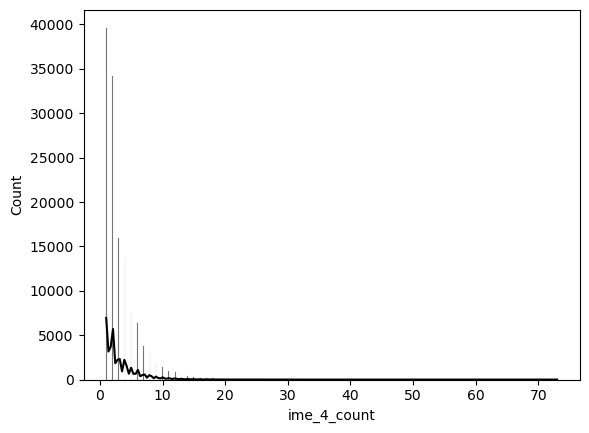

In [54]:
sns.histplot(df['ime_4_count'], color='black', kde=True)
plt.show()

In [55]:
df.loc[np.isclose(df['missing_ime_4_count'], 1, atol=1e-6) , 'ime_4_count'] = 0.0

In [56]:
test_df.loc[np.isclose(test_df['missing_ime_4_count'], 1, atol=1e-6) , 'ime_4_count'] = 0.0

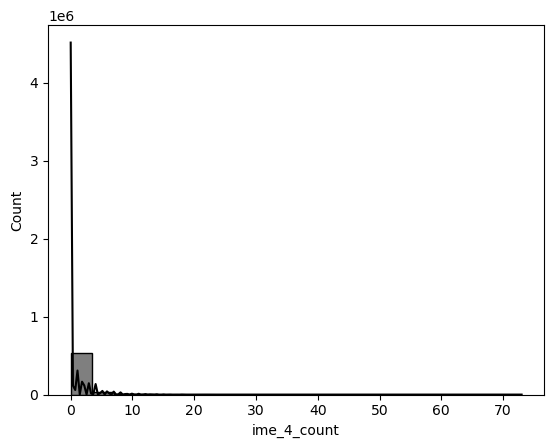

In [57]:
sns.histplot(df['ime_4_count'], color='black', kde=True)
plt.show()

In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 94 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   accident_date                              385531 non-null  datetime64[ns]
 1   age_at_injury                              370752 non-null  float64       
 2   alternative_dispute_resolution             374773 non-null  float64       
 3   assembly_date                              387975 non-null  datetime64[ns]
 4   attorney_representative                    374774 non-null  float64       
 5   average_weekly_wage                        355994 non-null  float64       
 6   birth_year                                 355816 non-null  float64       
 7   c_2_date                                   387975 non-null  datetime64[ns]
 8   c_3_date                                   387975 non-null  datetime64[ns]
 9   ca

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572325 entries, 5393875 to 6165075
Data columns (total 98 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   accident_date                              568636 non-null  datetime64[ns]
 1   age_at_injury                              566814 non-null  float64       
 2   alternative_dispute_resolution             572320 non-null  float64       
 3   assembly_date                              572325 non-null  datetime64[ns]
 4   attorney_representative                    572325 non-null  float64       
 5   average_weekly_wage                        543741 non-null  float64       
 6   birth_year                                 543333 non-null  float64       
 7   c_2_date                                   572325 non-null  datetime64[ns]
 8   c_3_date                                   572325 non-null  datetime64[ns]
 9   ca

## Note on predictions
<br>
Even though the variable itself is now coherent, it is unlikely that it gives the same level of contribution to the prediction, independently of how advanced the process is, this is because naturally, all cases start with a count of '0', and they accumulate medical examinations as needed; we can posit that the need for medical examination is a function of severety which is a key driver of the claim type. <br>

This fact, and the realization that first hearing date itself has a lot of missing values, implies that our model must be able to predict the claim type, regardless of if a hearing has or not already occured. What muddles the waters is that the target variable that requires prediction, is extremely nuanced, because it captures three distinct phenomenon, injury, death and decision reached. <br>

So an excelent model must first be able to predict what kind of claim is likely to be made, and then infer the likelyhood of that claim to succeed. The information for the first portion of this equation is likely contained within the codes that are submited in the claim, as well as the descriptors of those codes, while the outcome is likely to be dictated by the sociodemographic parameters of the individual.

## 3.2 Dimensionality reduction in Categorical Variables

### 3.2.0 Alternative Resolution Dispute

A bit of research reveled that the 'U' in alternative dispute stands for Union, so this variable actually captures two phenomenon. Is the claimant Unioninized, was an alternative dispute resolution mechanism used. Let's show this thoroughly.

In [60]:
for letter in df["alternative_dispute_resolution"].unique():
    print(letter)
    print(df[df["alternative_dispute_resolution"]==letter]["claim_injury_type"].value_counts(normalize=True))

0.0
claim_injury_type
2. NON-COMP        0.506208
4. TEMPORARY       0.260070
3. MED ONLY        0.120250
5. PPD SCH LOSS    0.083277
1. CANCELLED       0.021843
6. PPD NSL         0.007363
8. DEATH           0.000823
7. PTD             0.000165
Name: proportion, dtype: float64
1.0
claim_injury_type
2. NON-COMP     0.992715
1. CANCELLED    0.007285
Name: proportion, dtype: float64
nan
Series([], Name: proportion, dtype: float64)


In [61]:
df[df["alternative_dispute_resolution"]=="N"].describe().round(2)

accident_date  age_at_injury  alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year c_2_date c_3_date  covid_19_indicator first_hearing_date  gender  ime_4_count  number_of_dependents  target  missing_accident_date  missing_age_at_injury  missing_alternative_dispute_resolution  missing_assembly_date  missing_attorney_representative  missing_average_weekly_wage  missing_birth_year  missing_c_2_date  missing_c_3_date  missing_carrier_name  missing_carrier_type  missing_claim_injury_type  missing_county_of_injury  missing_covid_19_indicator  missing_district_name  missing_first_hearing_date  missing_gender  missing_ime_4_count  missing_industry_code  missing_industry_code_description  missing_medical_fee_region  missing_wcio_cause_of_injury_code  missing_wcio_cause_of_injury_description  missing_wcio_nature_of_injury_code  missing_wcio_nature_of_injury_description  missing_wcio_part_of_body_code  \
count             0            0.0                             0.0             0                      0.0                  0.0         0.0        0        0                 0.0                  0     0.0          0.0                   0.0     0.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0                         0.0             0.0                  0.0                    0.0                                0.0                         0.0                                0.0                                       0.0                                 0.0                                        0.0                             0.0   
mean            NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT      NaT                 NaN                NaT     NaN          NaN                   NaN     NaN                    NaN                    NaN                                     NaN                    NaN                              NaN                          NaN                 NaN               NaN               NaN                   NaN                   NaN                        NaN                       NaN                         NaN                    NaN                         NaN             NaN                  NaN                    NaN                                NaN                         NaN                                NaN                                       NaN                                 NaN                                        NaN                             NaN   
min             NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT      NaT                 NaN                NaT     NaN          NaN                   NaN     NaN                    NaN                    NaN                                     NaN                    NaN                              NaN                          NaN                 NaN               NaN               NaN                   NaN                   NaN                        NaN                       NaN                         NaN                    NaN                         NaN             NaN                  NaN                    NaN                                NaN                         NaN                                NaN                                       NaN                                 NaN                                        NaN                             NaN   
25%             NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT   

In [62]:
df[df["alternative_dispute_resolution"]=="U"].describe().round(2)

accident_date  age_at_injury  alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year c_2_date c_3_date  covid_19_indicator first_hearing_date  gender  ime_4_count  number_of_dependents  target  missing_accident_date  missing_age_at_injury  missing_alternative_dispute_resolution  missing_assembly_date  missing_attorney_representative  missing_average_weekly_wage  missing_birth_year  missing_c_2_date  missing_c_3_date  missing_carrier_name  missing_carrier_type  missing_claim_injury_type  missing_county_of_injury  missing_covid_19_indicator  missing_district_name  missing_first_hearing_date  missing_gender  missing_ime_4_count  missing_industry_code  missing_industry_code_description  missing_medical_fee_region  missing_wcio_cause_of_injury_code  missing_wcio_cause_of_injury_description  missing_wcio_nature_of_injury_code  missing_wcio_nature_of_injury_description  missing_wcio_part_of_body_code  \
count             0            0.0                             0.0             0                      0.0                  0.0         0.0        0        0                 0.0                  0     0.0          0.0                   0.0     0.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0                         0.0             0.0                  0.0                    0.0                                0.0                         0.0                                0.0                                       0.0                                 0.0                                        0.0                             0.0   
mean            NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT      NaT                 NaN                NaT     NaN          NaN                   NaN     NaN                    NaN                    NaN                                     NaN                    NaN                              NaN                          NaN                 NaN               NaN               NaN                   NaN                   NaN                        NaN                       NaN                         NaN                    NaN                         NaN             NaN                  NaN                    NaN                                NaN                         NaN                                NaN                                       NaN                                 NaN                                        NaN                             NaN   
min             NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT      NaT                 NaN                NaT     NaN          NaN                   NaN     NaN                    NaN                    NaN                                     NaN                    NaN                              NaN                          NaN                 NaN               NaN               NaN                   NaN                   NaN                        NaN                       NaN                         NaN                    NaN                         NaN             NaN                  NaN                    NaN                                NaN                         NaN                                NaN                                       NaN                                 NaN                                        NaN                             NaN   
25%             NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT   

In [63]:
df[df["alternative_dispute_resolution"]=="Y"].describe().round(2)

accident_date  age_at_injury  alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year c_2_date c_3_date  covid_19_indicator first_hearing_date  gender  ime_4_count  number_of_dependents  target  missing_accident_date  missing_age_at_injury  missing_alternative_dispute_resolution  missing_assembly_date  missing_attorney_representative  missing_average_weekly_wage  missing_birth_year  missing_c_2_date  missing_c_3_date  missing_carrier_name  missing_carrier_type  missing_claim_injury_type  missing_county_of_injury  missing_covid_19_indicator  missing_district_name  missing_first_hearing_date  missing_gender  missing_ime_4_count  missing_industry_code  missing_industry_code_description  missing_medical_fee_region  missing_wcio_cause_of_injury_code  missing_wcio_cause_of_injury_description  missing_wcio_nature_of_injury_code  missing_wcio_nature_of_injury_description  missing_wcio_part_of_body_code  \
count             0            0.0                             0.0             0                      0.0                  0.0         0.0        0        0                 0.0                  0     0.0          0.0                   0.0     0.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0                         0.0             0.0                  0.0                    0.0                                0.0                         0.0                                0.0                                       0.0                                 0.0                                        0.0                             0.0   
mean            NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT      NaT                 NaN                NaT     NaN          NaN                   NaN     NaN                    NaN                    NaN                                     NaN                    NaN                              NaN                          NaN                 NaN               NaN               NaN                   NaN                   NaN                        NaN                       NaN                         NaN                    NaN                         NaN             NaN                  NaN                    NaN                                NaN                         NaN                                NaN                                       NaN                                 NaN                                        NaN                             NaN   
min             NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT      NaT                 NaN                NaT     NaN          NaN                   NaN     NaN                    NaN                    NaN                                     NaN                    NaN                              NaN                          NaN                 NaN               NaN               NaN                   NaN                   NaN                        NaN                       NaN                         NaN                    NaN                         NaN             NaN                  NaN                    NaN                                NaN                         NaN                                NaN                                       NaN                                 NaN                                        NaN                             NaN   
25%             NaT            NaN                             NaN           NaT                      NaN                  NaN         NaN      NaT   

We map the values of our 'U' observations into the 'Y' category as their behaviours are very similar, however, we still create the 'is_unionized' variable, in case there is interplay between it and with of the other variables, that the model might pick up even if we don't. 
<br><br>
As our policy has been thus far, to create variables first, and delete them later if they turn out empty.

In [64]:
# We create the variable is_unionized 
df.loc[:, 'is_unionized'] = df.loc[:, 'alternative_dispute_resolution'].isin(['U'])
test_df.loc[:, 'is_unionized'] = test_df.loc[:, 'alternative_dispute_resolution'].isin(['U'])

# We add the feature to the metric features_list
metric_features.append('is_unionized')

# And correct the mapping of Alternative Dispute Resolution
df.loc[:, 'alternative_dispute_resolution'] = df.loc[:, 'alternative_dispute_resolution'].apply(lambda x: 1 if x in ['Y', 'U'] else 'N')

test_df.loc[:, 'alternative_dispute_resolution'] = test_df.loc[:, 'alternative_dispute_resolution'].apply(lambda x: 1 if x in ['Y', 'U'] else 'N')

/tmp/ipykernel_17886/3804213133.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['N' 'N' 'N' ... 'N' 'N' 'N']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'alternative_dispute_resolution'] = df.loc[:, 'alternative_dispute_resolution'].apply(lambda x: 1 if x in ['Y', 'U'] else 'N')
/tmp/ipykernel_17886/3804213133.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['N' 'N' 'N' ... 'N' 'N' 'N']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_df.loc[:, 'alternative_dispute_resolution'] = test_df.loc[:, 'alternative_dispute_resolution'].apply(lambda x: 1 if x in ['Y', 'U'] else 'N')


### 3.2.1 Cause of Injury

The first of a series of categorical variables that we wish to encode in a more managable way. ALbeit, arriving at a working formula was not easy. The analysis is detailed below.

In [65]:
cause_of_injury_groups = {'I. Burn or Scald – Heat or Cold Exposures – Contact With' : (1,2,3,4,5,6,7,8,9,11,14,84), 
                        'II. Caught In, Under or Between': (10,12,13,20),
                        'III. Cut, Puncture, Scrape Injured By': (15,16,17,18,19),
                        'IV. Fall, Slip or Trip Injury': (25,26,27,28,29,30,31,32,33),
                        'V. Motor Vehicle': (40,41,45,46,47,48,50),
                        'VI.  Strain or Injury By': (52,53,54,55,56,57,58,59,60,61,62,97),
                        'VII. Striking Against or Stepping On': (65,66,67,68,69,70),
                        'VIII. Struck or Injured By': (74,75,76,77,78,79,80,81,85,86),
                        'IX.  Rubbed or Abraded By': (94,95),
                        'X. Miscellaneous Causes':(82,83,87,88,89,90,91,93,96,98,99)}

In [66]:
df['cause_of_injury_group'] = df['wcio_cause_of_injury_code'].map({v: k for k, vals in cause_of_injury_groups.items() for v in vals})
df['cause_of_injury_group'].value_counts()


cause_of_injury_group
VI.  Strain or Injury By                                    146955
IV. Fall, Slip or Trip Injury                               119787
VIII. Struck or Injured By                                  100449
X. Miscellaneous Causes                                      72824
III. Cut, Puncture, Scrape Injured By                        40515
V. Motor Vehicle                                             24183
VII. Striking Against or Stepping On                         19470
II. Caught In, Under or Between                              19276
I. Burn or Scald – Heat or Cold Exposures – Contact With     12296
IX.  Rubbed or Abraded By                                      947
Name: count, dtype: int64

In [67]:
test_df['cause_of_injury_group'] = test_df['wcio_cause_of_injury_code'].map({v: k for k, vals in cause_of_injury_groups.items() for v in vals})

In [68]:
df['cause_of_injury_group'] = df['wcio_cause_of_injury_code'].map({v: k for k, vals in cause_of_injury_groups.items() for v in vals})
df['cause_of_injury_group'].value_counts()

cause_of_injury_group
VI.  Strain or Injury By                                    146955
IV. Fall, Slip or Trip Injury                               119787
VIII. Struck or Injured By                                  100449
X. Miscellaneous Causes                                      72824
III. Cut, Puncture, Scrape Injured By                        40515
V. Motor Vehicle                                             24183
VII. Striking Against or Stepping On                         19470
II. Caught In, Under or Between                              19276
I. Burn or Scald – Heat or Cold Exposures – Contact With     12296
IX.  Rubbed or Abraded By                                      947
Name: count, dtype: int64

In [69]:
df[['cause_of_injury_group','claim_injury_type']].groupby(['cause_of_injury_group','claim_injury_type'])['claim_injury_type'].count()

cause_of_injury_group                                     claim_injury_type
I. Burn or Scald – Heat or Cold Exposures – Contact With  1. CANCELLED            88
                                                          2. NON-COMP           8696
                                                          3. MED ONLY           1327
                                                          4. TEMPORARY          1939
                                                          5. PPD SCH LOSS        196
                                                          6. PPD NSL              29
                                                          7. PTD                   4
                                                          8. DEATH                17
II. Caught In, Under or Between                           1. CANCELLED           113
                                                          2. NON-COMP           9751
                                                          3. MED ONLY     

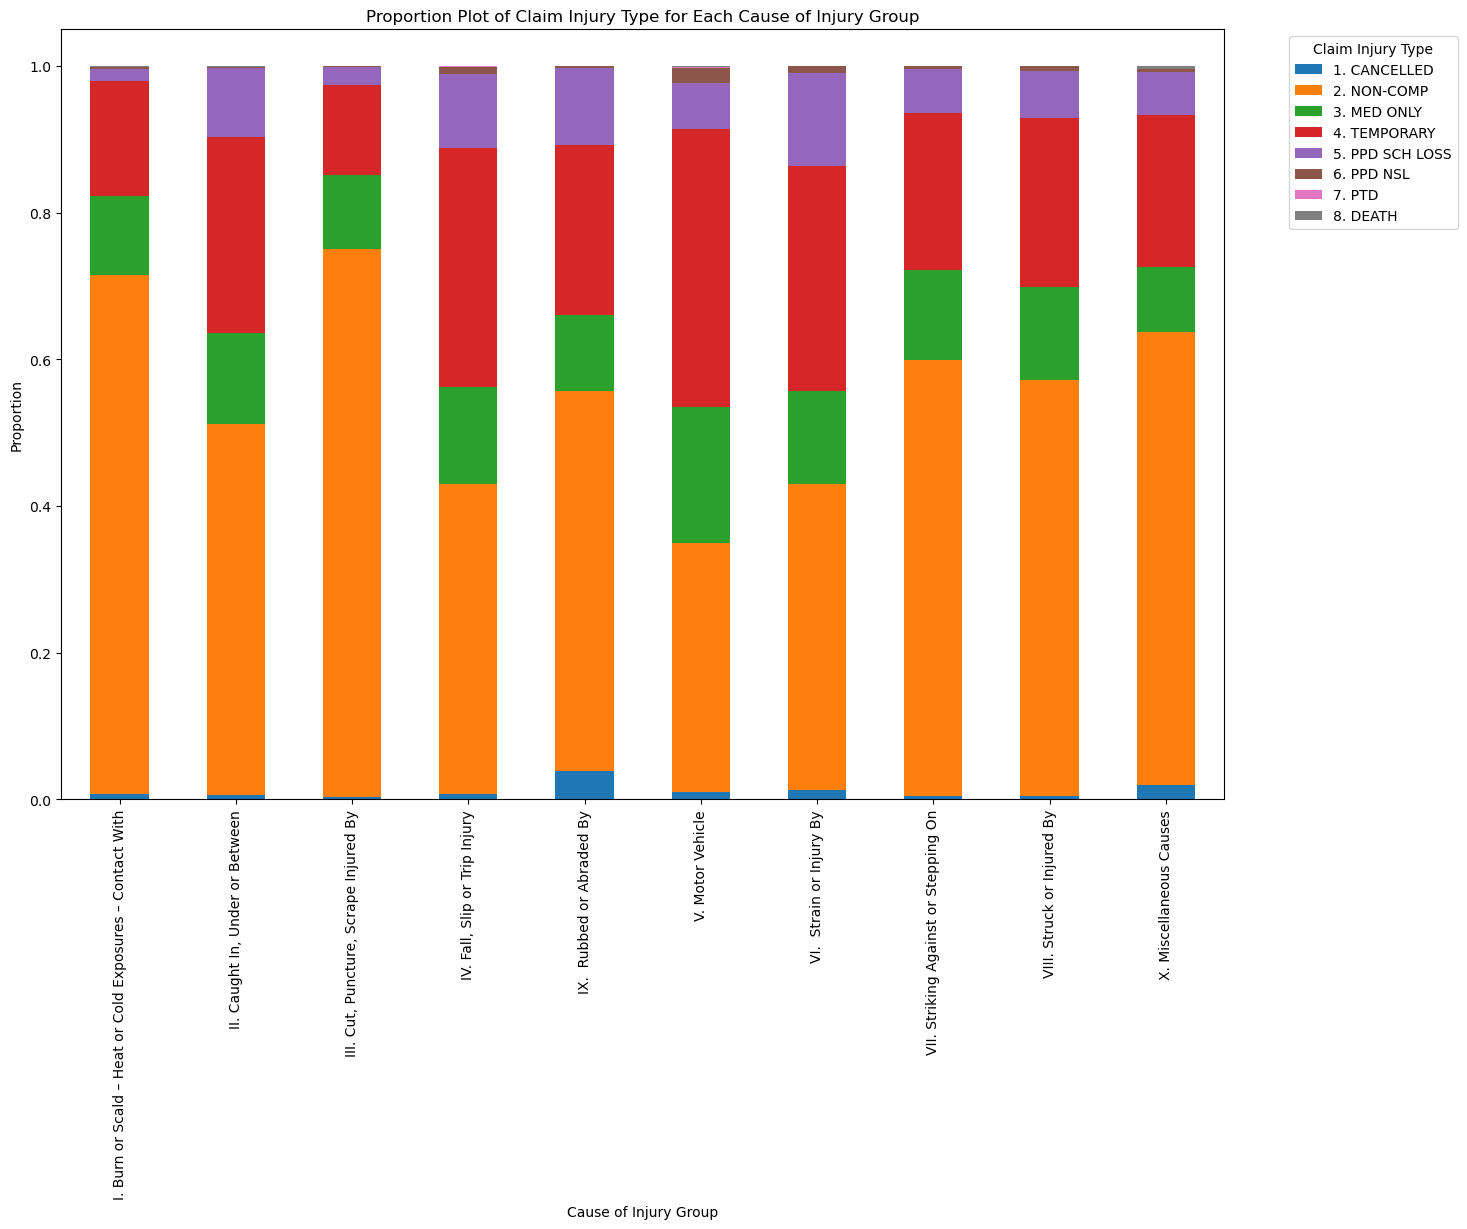

In [70]:
plt.figure(figsize=(15, 10))

# Calculate the proportion
prop_df = df.groupby(['cause_of_injury_group', 'claim_injury_type']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions
prop_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xticks(rotation=90)
plt.title('Proportion Plot of Claim Injury Type for Each Cause of Injury Group')
plt.xlabel('Cause of Injury Group')
plt.ylabel('Proportion')
plt.legend(title='Claim Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

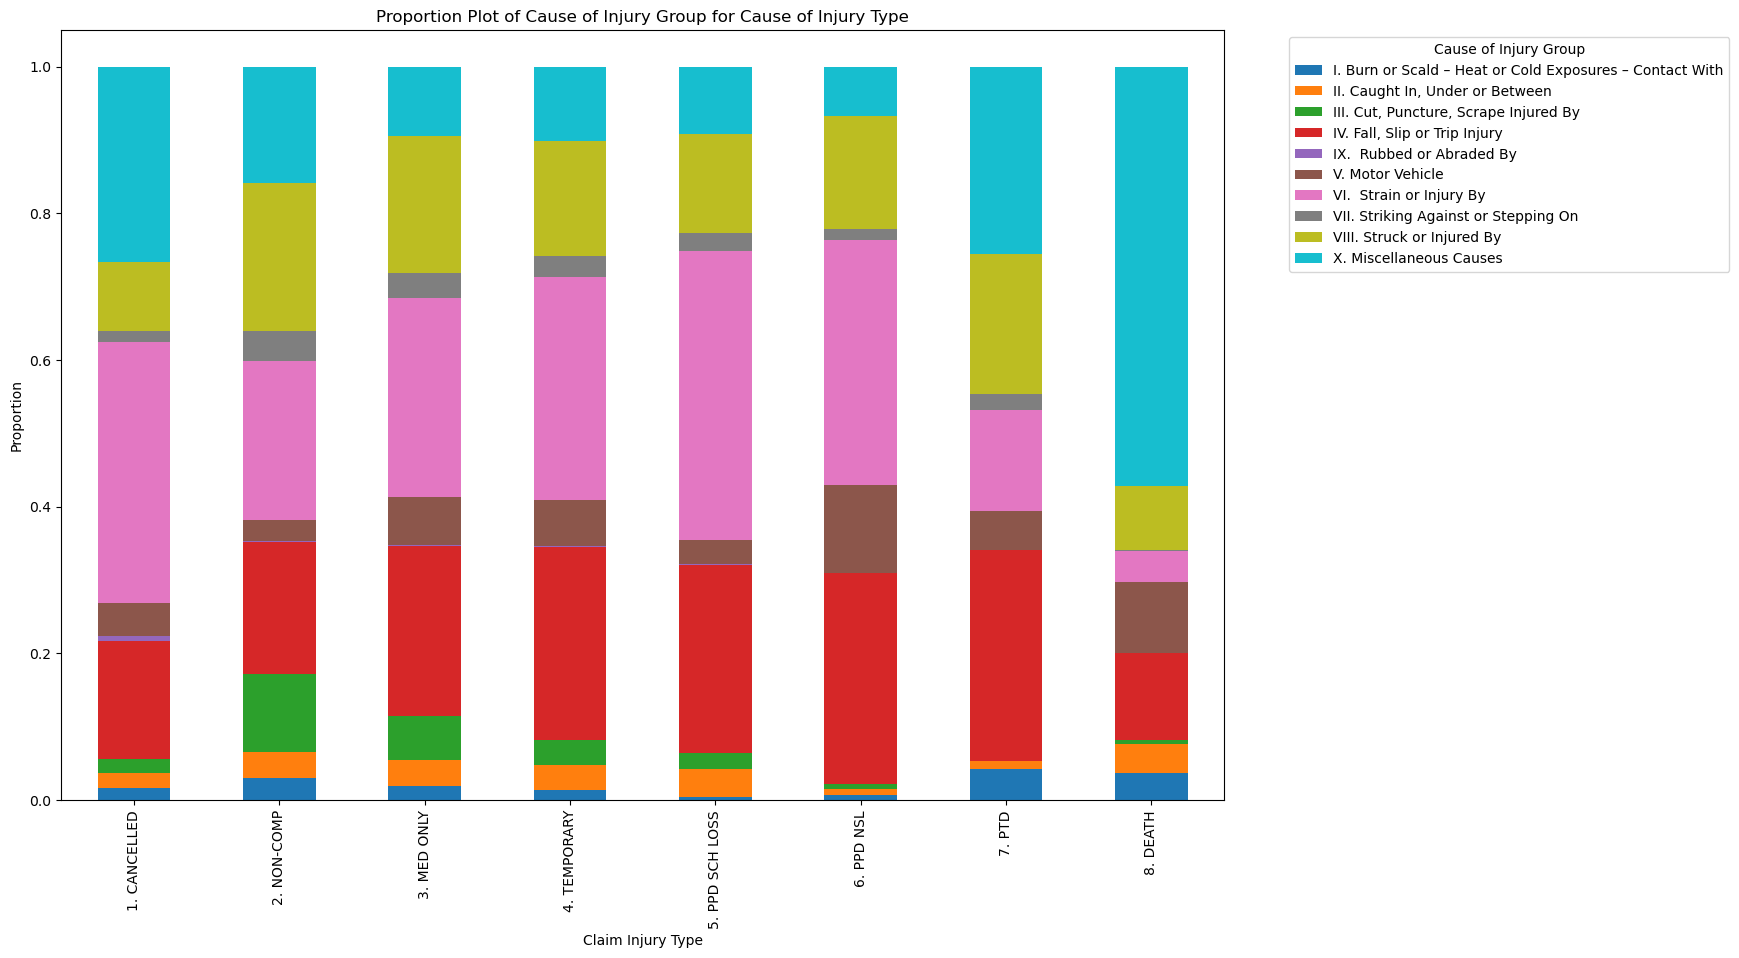

In [71]:
plt.figure(figsize=(15, 10))

# Calculate the proportion
prop_df_transposed = df.groupby(['claim_injury_type', 'cause_of_injury_group']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions
prop_df_transposed.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xticks(rotation=90)
plt.title('Proportion Plot of Cause of Injury Group for Cause of Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Proportion')
plt.legend(title='Cause of Injury Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Checking for nan relevance

In [72]:
df[df['wcio_cause_of_injury_code'].isna()][['wcio_cause_of_injury_code', 'claim_injury_type']].groupby(['wcio_cause_of_injury_code', 'claim_injury_type'], observed=False, dropna=False)['claim_injury_type'].count()

wcio_cause_of_injury_code  claim_injury_type
1.0                        1. CANCELLED            0
                           2. NON-COMP             0
                           3. MED ONLY             0
                           4. TEMPORARY            0
                           5. PPD SCH LOSS         0
                           6. PPD NSL              0
                           8. DEATH                0
2.0                        1. CANCELLED            0
                           2. NON-COMP             0
                           3. MED ONLY             0
                           4. TEMPORARY            0
                           5. PPD SCH LOSS         0
                           6. PPD NSL              0
                           8. DEATH                0
3.0                        1. CANCELLED            0
                           2. NON-COMP             0
                           3. MED ONLY             0
                           4. TEMPORARY            0
 

In [73]:
df[['wcio_part_of_body_code', 'wcio_part_of_body_description']].drop_duplicates().sort_values('wcio_part_of_body_code')


wcio_part_of_body_code                      wcio_part_of_body_description
claim_identifier                                                                          
5393974                            -9.0                                           MULTIPLE
5393889                            10.0                               MULTIPLE HEAD INJURY
5394321                            11.0                                              SKULL
5395534                            12.0                                              BRAIN
5394181                            13.0                                             EAR(S)
5394084                            14.0                                             EYE(S)
5394726                            15.0                                               NOSE
5394297                            16.0                                              TEETH
5394160                            17.0                                              MOUTH
5393980                            18.0                                        SOFT TISSUE
5394648                            19.0                                       FACIAL BONES
5393836                            20.0                               MULTIPLE NECK INJURY
5395531                            21.0                                          VERTEBRAE
5394136                            22.0                                               DISC
5393898                            23.0                                        SPINAL CORD
5396006                            24.0                                             LARYNX
5394179                            25.0                                        SOFT TISSUE
5399597                            26.0                                            TRACHEA
5393853                            30.0                         MULTIPLE UPPER EXTREMITIES
5393852                            31.0                                          UPPER ARM
5393846                            32.0                                              ELBOW
5394140                            33.0                                          LOWER ARM
5393959                            34.0                                              WRIST
5394027                            35.0                                               HAND
5393887                            36.0                                          FINGER(S)
5393985                            37.0                                              THUMB
5393091                            38.0                                        SHOULDER(S)
5395707                            39.0                                WRIST (S) & HAND(S)
5394479                            40.0                                     MULTIPLE TRUNK
5394082                            41.0                                    UPPER BACK AREA
5393838                            42.0                                    LOWER BACK AREA
5393781                            43.0                                               DISC
5393885                            44.0                                              CHEST
5395507                            45.0                                  SACRUM AND COCCYX
5394647                            46.0                                             PELVIS
5397921                            47.0                                        SPINAL CORD
5394675                            48.0                                    INTERNAL ORGANS
5394262                            49.0                                              HEART
5393906                            50.0                         MULTIPLE LOWER EXTREMITIES
5394026                            51.0                                                HIP
5393931                            52.0                                          UPPER LEG
5394187                            53.0                                               KNEE
5393811      

In [74]:
df[df['wcio_part_of_body_code'] == -9].head()

accident_date  age_at_injury alternative_dispute_resolution assembly_date  attorney_representative  average_weekly_wage  birth_year   c_2_date   c_3_date                 carrier_name     carrier_type claim_injury_type county_of_injury  covid_19_indicator district_name first_hearing_date  gender  ime_4_count industry_code industry_code_description medical_fee_region wcio_cause_of_injury_code wcio_cause_of_injury_description wcio_nature_of_injury_code wcio_nature_of_injury_description wcio_part_of_body_code wcio_part_of_body_description zip_code  number_of_dependents  target  missing_accident_date  missing_age_at_injury  missing_alternative_dispute_resolution  missing_assembly_date  missing_attorney_representative  missing_average_weekly_wage  missing_birth_year  missing_c_2_date  missing_c_3_date  missing_carrier_name  missing_carrier_type  missing_claim_injury_type  missing_county_of_injury  missing_covid_19_indicator  missing_district_name  \
claim_identifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
5393974             2019-12-19           42.0                              N    2020-01-01                      1.0              1093.74      1977.0 2019-12-31 2020-01-14  PUBLIC EMPLOYERS RISK MGMT.  3A. SELF PUBLIC      4. TEMPORARY         DUTCHESS                 0.0        ALBANY         2020-08-27     1.0          6.0          92.0     PUBLIC ADMINISTRATION                 II                      99.0       OTHER - MISCELLANEOUS, NOC                       52.0                    STRAIN OR TEAR                   -9.0                      MULTIPLE    12578                   6.0     4.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0   
5393785             2019-09-13           36.0                              N    2020-01-02                      1.0              1500.00      1983.0 2020-02-07 2019-12-27     POLICE, FIRE, SANITATION  3A. SELF PUBLIC   5. PPD SCH LOSS          SUFFOLK                 0.0     HAUPPAUGE         2020-03-12     0.0          3.0          92.0     PUBLIC ADMINISTRATION                 IV                      81.0           STRUCK OR INJURED, NOC                       10.0                         CONTUSION                   -9.0                      MULTIPLE    11704                   5.0     5.0                    0.0                    0.0                                     0.0                    0.0                              0.0                          0.0                 0.0               0.0               0.0                   0.0                   0.0                        0.0                       0.0                         0.0                    0.0   
5395679             2019-12-12           57.0                              N    2020-01-03                      1.0  

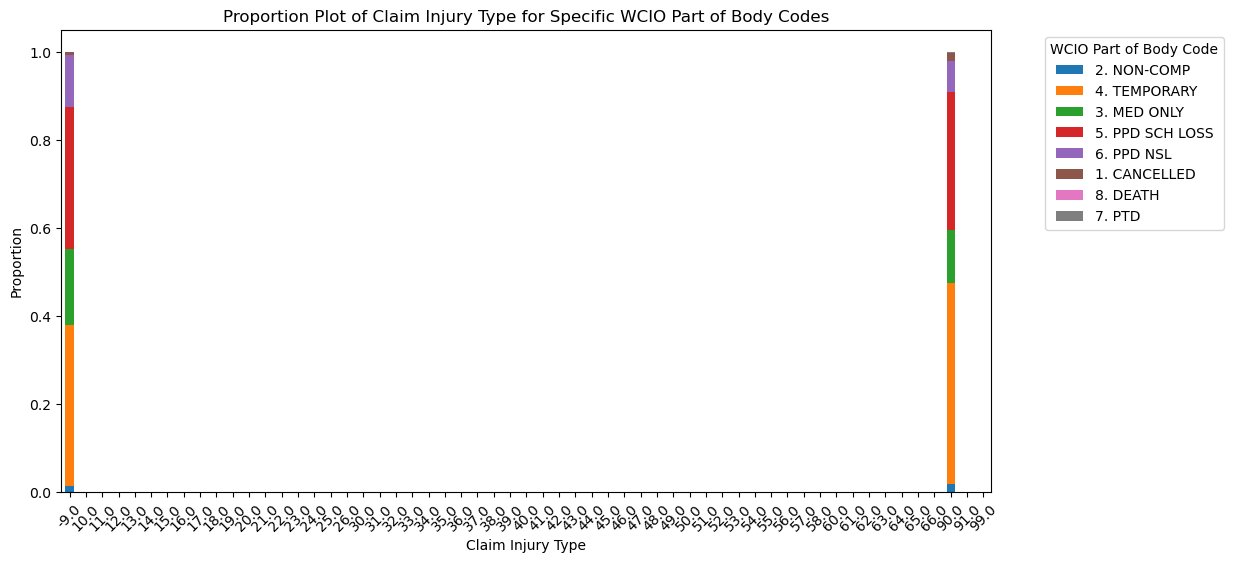

In [75]:
plt.figure(figsize=(12, 6))

# Filter the dataframe for the required conditions
df_filtered = df[df['wcio_part_of_body_code'].isin([90, -9])]

# Calculate the proportion
prop_df = df_filtered.groupby(['wcio_part_of_body_code','claim_injury_type'], observed=False).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Create the proportion plot
prop_df.plot(kind='bar', stacked=True, ax=plt.gca())

# Set plot title and labels
plt.title('Proportion Plot of Claim Injury Type for Specific WCIO Part of Body Codes')
plt.xlabel('Claim Injury Type')
plt.ylabel('Proportion')
plt.legend(title='WCIO Part of Body Code', labels=df['claim_injury_type'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [76]:
# And we add this variable to the ccategorical_features list
categorical_features.append('cause_of_injury_group')

### 3.2.2 Part of Body

The description for code '-9' is 'MULTIPLE', and upon studying Code Manual provided by WCIO, suspect that the code might have been miss inputed, because code '90's' description is 'Multiple Body Parts (Including Body Systems & Body Parts)'. Moreoever,'wcio_part_of_body_code's  '-9' and '90' have similar proportion in the target variable. And since we dont't want to work with codes that are not present in WCIO manual, we decide to replace '-9' for '90'.

In [77]:
df['wcio_part_of_body_code'] = df['wcio_part_of_body_code'].where(df['wcio_part_of_body_code'] != -9, 90)

In [78]:
df['wcio_part_of_body_code'].value_counts()

wcio_part_of_body_code
 90.0    64290
 42.0    51822
 53.0    47837
 38.0    37717
 36.0    36074
 35.0    31103
 55.0    24918
 56.0    18707
 34.0    18584
 33.0    15339
 60.0    13977
 18.0    13758
 14.0    12971
 37.0    12511
 54.0    11617
 31.0    11207
 91.0    10937
 32.0     9883
 41.0     8233
 10.0     7937
 11.0     7903
 44.0     7643
 61.0     6763
 51.0     6414
 66.0     6096
 25.0     5927
 65.0     5298
 52.0     4294
 19.0     3905
 48.0     3750
 13.0     3677
 20.0     2846
 30.0     2621
 39.0     2544
 57.0     2535
 15.0     2087
 63.0     1997
 12.0     1988
 50.0     1926
 43.0     1891
 58.0     1806
 40.0     1749
 17.0     1602
 21.0     1331
 99.0     1249
 62.0     1161
 22.0     1098
 16.0      803
 46.0      740
 49.0      637
 23.0      477
 45.0      402
 47.0      401
 24.0      141
 26.0       83
 64.0       53
-9.0         0
Name: count, dtype: int64

In [79]:
parts_of_body_groups = {'I. Head': tuple(range(10,20)),
                        'II. Neck': tuple(range(20,27)),
                        'III. Back': tuple(range(30,40)),
                        'IV. Upper Extremities': (41,42,43,44,45,46,47,48,49,60,61,62,63),
                        'V. Lower Extremities': tuple(range(50,60)),
                        'VI. Multiple Body Parts': (64,65,66,90,91,99)

}

In [80]:
df['part_of_body_group'] = df['wcio_part_of_body_code'].map({v: k for k, vals in parts_of_body_groups.items() for v in vals})
df['part_of_body_group'].value_counts()


part_of_body_group
III. Back                  177583
V. Lower Extremities       120054
IV. Upper Extremities       99417
VI. Multiple Body Parts     87923
I. Head                     56631
II. Neck                    11903
Name: count, dtype: int64

In [81]:
test_df['part_of_body_group'] = test_df['wcio_part_of_body_code'].map({v: k for k, vals in parts_of_body_groups.items() for v in vals})

In [82]:
df['part_of_body_group'].isna().sum()

18814

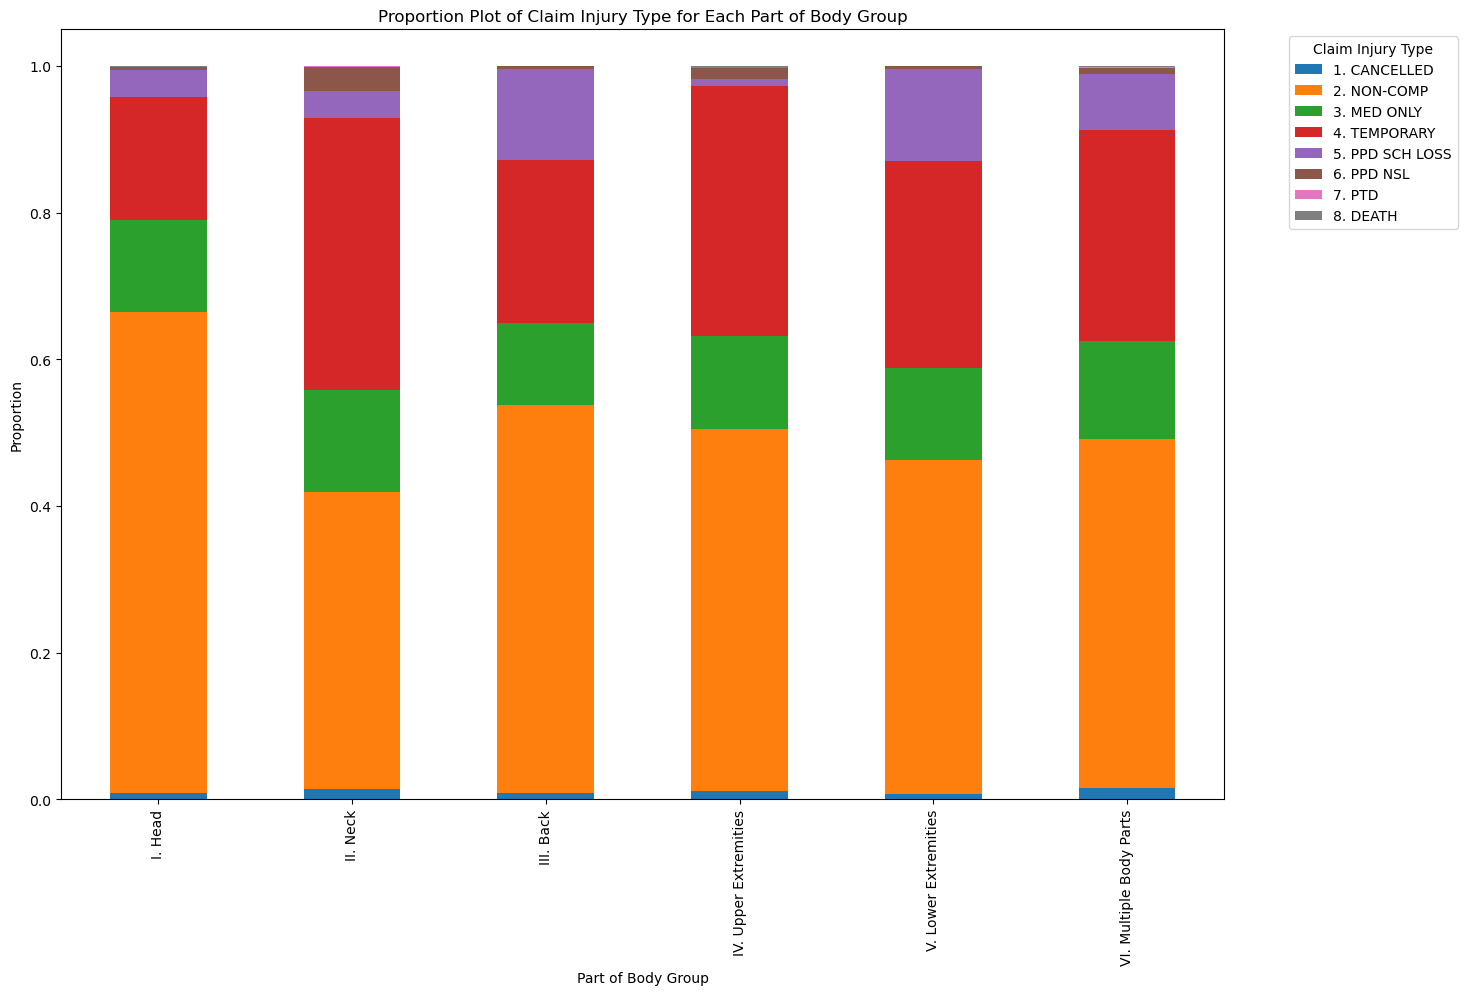

In [83]:
plt.figure(figsize=(15, 10))

# Calculate the proportion
prop_df = df.groupby(['part_of_body_group', 'claim_injury_type']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions
prop_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xticks(rotation=90)
plt.title('Proportion Plot of Claim Injury Type for Each Part of Body Group')
plt.xlabel('Part of Body Group')
plt.ylabel('Proportion')
plt.legend(title='Claim Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

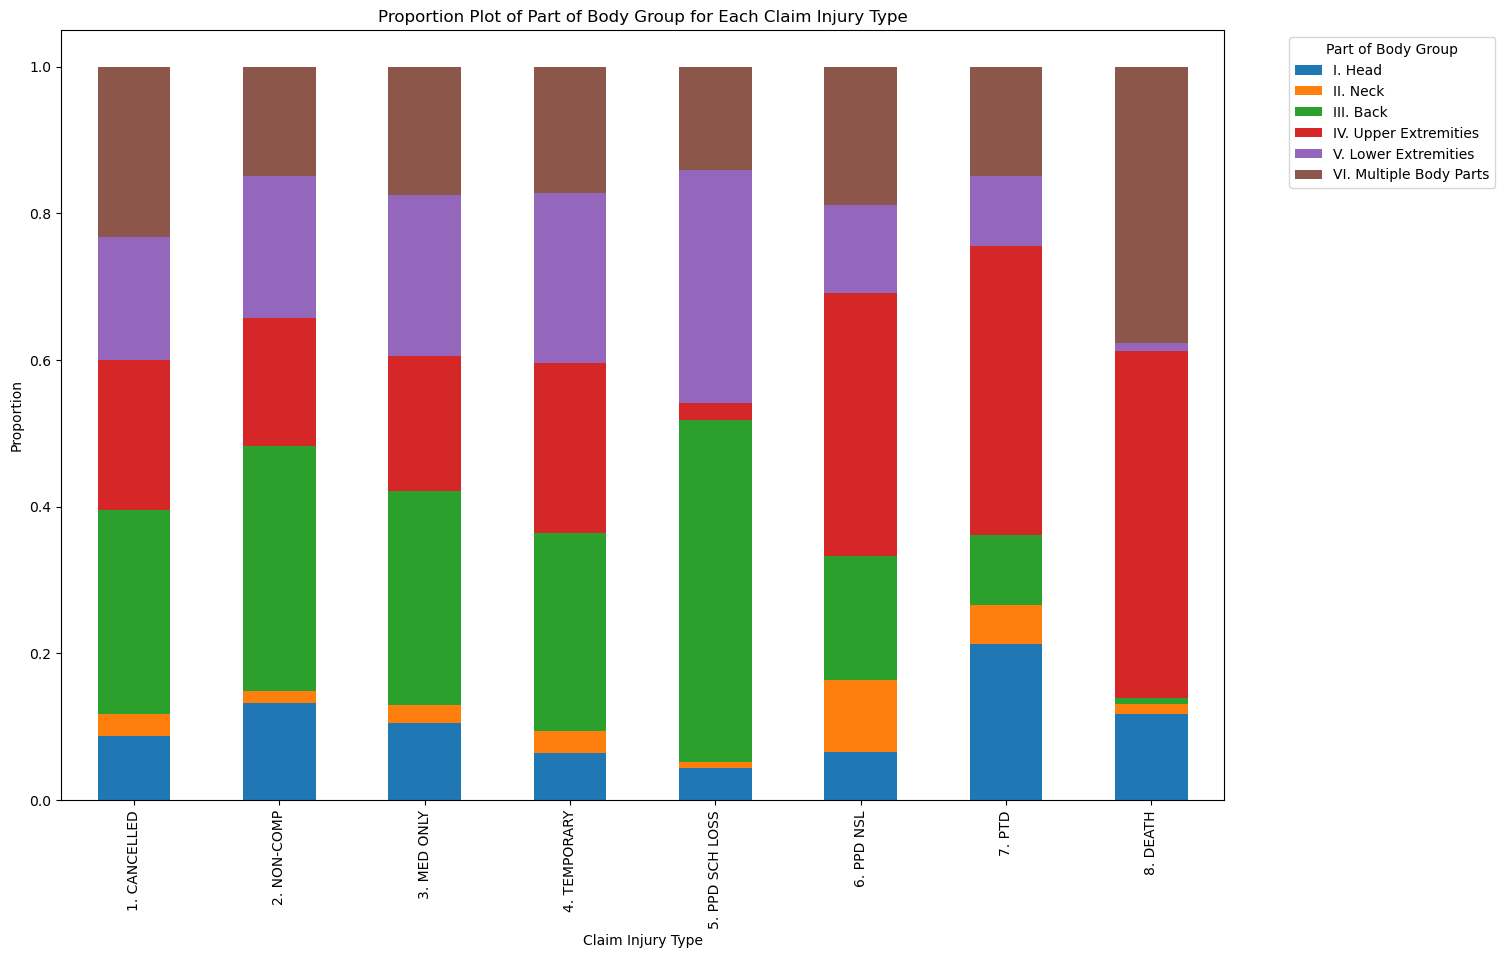

In [84]:
plt.figure(figsize=(15, 10))

# Calculate the proportion
prop_df = df.groupby(['claim_injury_type', 'part_of_body_group']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions
prop_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xticks(rotation=90)
plt.title('Proportion Plot of Part of Body Group for Each Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Proportion')
plt.legend(title='Part of Body Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Checking for NA relevance 

In [85]:
df[df['wcio_part_of_body_code'].isna()][['wcio_part_of_body_code', 'claim_injury_type']].groupby(['wcio_part_of_body_code', 'claim_injury_type'], observed=False, dropna=False)['claim_injury_type'].count()

wcio_part_of_body_code  claim_injury_type
-9.0                    1. CANCELLED            0
                        2. NON-COMP             0
                        3. MED ONLY             0
                        4. TEMPORARY            0
                        5. PPD SCH LOSS         0
                        6. PPD NSL              0
                        8. DEATH                0
 10.0                   1. CANCELLED            0
                        2. NON-COMP             0
                        3. MED ONLY             0
                        4. TEMPORARY            0
                        5. PPD SCH LOSS         0
                        6. PPD NSL              0
                        8. DEATH                0
 11.0                   1. CANCELLED            0
                        2. NON-COMP             0
                        3. MED ONLY             0
                        4. TEMPORARY            0
                        5. PPD SCH LOSS         0
        

In [86]:
# And we add this variable to the ccategorical_features list
categorical_features.append('part_of_body_group')

### 3.2.3 Nature of Injury

The first of a series of categorical variables that we wish to encode in a more managable way. ALbeit, arriving at a working formula was not easy. The analysis is detailed below.

In [87]:
df[['wcio_nature_of_injury_code', 'wcio_nature_of_injury_description']].drop_duplicates().sort_values('wcio_nature_of_injury_code')

wcio_nature_of_injury_code                  wcio_nature_of_injury_description
claim_identifier                                                                              
5393840                                 1.0                                 NO PHYSICAL INJURY
5396830                                 2.0                                         AMPUTATION
5393926                                 3.0                                    ANGINA PECTORIS
5393985                                 4.0                                               BURN
5393889                                 7.0                                         CONCUSSION
5393875                                10.0                                          CONTUSION
5394736                                13.0                                           CRUSHING
5394058                                16.0                                        DISLOCATION
5395348                                19.0                                     ELECTRIC SHOCK
5413637                                22.0                                        ENUCLEATION
5393791                                25.0                                       FOREIGN BODY
5393931                                28.0                                           FRACTURE
5442902                                30.0                                           FREEZING
5394023                                31.0                         HEARING LOSS OR IMPAIRMENT
5412358                                32.0                                   HEAT PROSTRATION
5393883                                34.0                                             HERNIA
5394623                                36.0                                          INFECTION
5394187                                37.0                                       INFLAMMATION
5555180                                38.0   ADVERSE REACTION TO A VACCINATION OR INOCULATION
5393848                                40.0                                         LACERATION
5396140                                41.0                              MYOCARDIAL INFARCTION
5394566                                42.0          POISONING - GENERAL (NOT OD OR CUMULATIVE
5393887                                43.0                                           PUNCTURE
5393066                                46.0                                            RUPTURE
5394152                                47.0                                          SEVERANCE
5393091                                49.0                                     SPRAIN OR TEAR
5393907                                52.0                                     STRAIN OR TEAR
5394350                                53.0                                            SYNCOPE
5396961                                54.0                                       ASPHYXIATION
5402690                                55.0                                           VASCULAR
5400304                                58.0                                        VISION LOSS
5393881                                59.0                   ALL OTHER SPECIFIC INJURIES, NOC
5395439                                60.0                                  DUST DISEASE, NOC
5413463                                61.0                                         ASBESTOSIS
5460862                                62.0                                         BLACK LUNG
5911919                                63.0                                         BYSSINOSIS
5540144                                64.0                                          SILICOSIS
5394193                                65.0                              RESPIRATORY DISORDERS
5398763                                66.0          POISONING - CHEMICAL, (OTHER THAN METALS)
5413970                                67.0                                  POISONING - METAL
5395435                    

In [88]:
# Group by 'wcio_nature_of_injury_code' and 'claim_injury_type' and calculate the size
grouped_injury_target_df = df.groupby(['wcio_nature_of_injury_code', 'claim_injury_type'], observed=False).size().unstack()

# Calculate the proportion for each 'wcio_nature_of_injury_code'
proportion_injury_target_df = grouped_injury_target_df.apply(lambda x: x / x.sum(), axis=1)

# Display the result
proportion_injury_target_df

claim_injury_type           1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL    7. PTD  8. DEATH
wcio_nature_of_injury_code                                                                                                       
1.0                             0.016972     0.830617     0.053941      0.082843         0.011427    0.002521  0.000336  0.001344
2.0                             0.017663     0.115489     0.085598      0.453804         0.326087    0.001359  0.000000  0.000000
3.0                             0.005525     0.740331     0.060773      0.182320         0.011050    0.000000  0.000000  0.000000
4.0                             0.004253     0.676236     0.117491      0.187002         0.014354    0.000399  0.000133  0.000133
7.0                             0.004197     0.430474     0.198905      0.344161         0.010949    0.008577  0.000730  0.002007
10.0                            0.007454     0.540463     0.126878      0.199583         0.119126    0.006370  0.000081  0.000045
13.0                            0.005941     0.440782     0.123036      0.304523         0.116520    0.002300  0.000192  0.006708
16.0                            0.006662     0.161599     0.107619      0.561838         0.134267    0.027161  0.000683  0.000171
19.0                            0.001616     0.663974     0.129241      0.169628         0.025848    0.006462  0.000000  0.003231
22.0                            0.000000     0.166667     0.166667      0.666667         0.000000    0.000000  0.000000  0.000000
25.0                            0.002979     0.797535     0.098862      0.094393         0.005553    0.000271  0.000135  0.000271
28.0                            0.005162     0.219423     0.118426      0.494396         0.154827    0.006663  0.000618  0.000485
30.0                            0.027778     0.583333     0.111111      0.250000         0.027778    0.000000  0.000000  0.000000
31.0                            0.052895     0.350223     0.046214      0.093541         0.456570    0.000557  0.000000  0.000000
32.0                            0.004717     0.761792     0.158019      0.073113         0.000000    0.000000  0.000000  0.002358
34.0                            0.010737     0.318401     0.105887      0.529804         0.029248    0.004813  0.000370  0.000740
36.0                            0.010638     0.705319     0.112766      0.150000         0.019149    0.000000  0.000000  0.002128
37.0                            0.007946     0.572598     0.112770      0.230837         0.070792    0.005057  0.000000  0.000000
38.0                            0.005405     0.789189     0.070270      0.118919         0.016216    0.000000  0.000000  0.000000
40.0                            0.003584     0.700838     0.120008      0.146708         0.027696    0.001060  0.000064  0.000042
41.0                            0.008658     0.774892     0.038961      0.138528         0.006494    0.004329  0.002165  0.025974
42.0                            0.007576     0.823232     0.111111      0.055556         0.000000    0.000000  0.000000  0.002525
43.0                            0.001326     0.857695     0.072450      0.059078         0.008761    0.000634  0.000000  0.000058
46.0                            0.004819     0.195181     0.102008      0.434538         0.250602    0.012851  0.000000  0.000000
47.0                            0.014706     0.344118     0.120588      0.344118         0.173529    0.002941  0.000000  0.000000
49.0                            0.008058     0.370906     0.150207      0.353678         0.106778    0.010301  0.000072  0.000000
52.0                            0.009915     0.426202     0.135451      0.324033         0.092463    0.011779  0.000118  0.000039
53.0                            0.002105     0.880000     0.054035      0.058947         0.002807    0.001404  0.000000  0.000702
54.0                            0.010638     0.659574     0.042553      0.212766         0.000000   

In [89]:
# One-hot encode the 'wcio_nature_of_injury_code' column in the training set
df_encoded = pd.get_dummies(df['wcio_nature_of_injury_code'])

# Train the decision tree classifier
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
tree.fit(df_encoded, df['claim_injury_type'])

# Apply the model to group categories based on leaf nodes
leaf_nodes = tree.apply(df_encoded)
df['nature_of_injury_group'] = leaf_nodes

# Now for the test set, encode it using the same method
test_encoded = pd.get_dummies(test_df['wcio_nature_of_injury_code'])

# Ensure that test_encoded has the same columns as df_encoded by aligning columns
test_encoded = test_encoded.reindex(columns=df_encoded.columns, fill_value=0)

# Apply the trained decision tree to the test set
test_leaf_nodes = tree.apply(test_encoded)

# Assign the leaf node results to the test set
test_df['nature_of_injury_group'] = test_leaf_nodes


In [90]:
df['nature_of_injury_group'].unique()

array([ 5,  8,  6,  9, 10,  7])

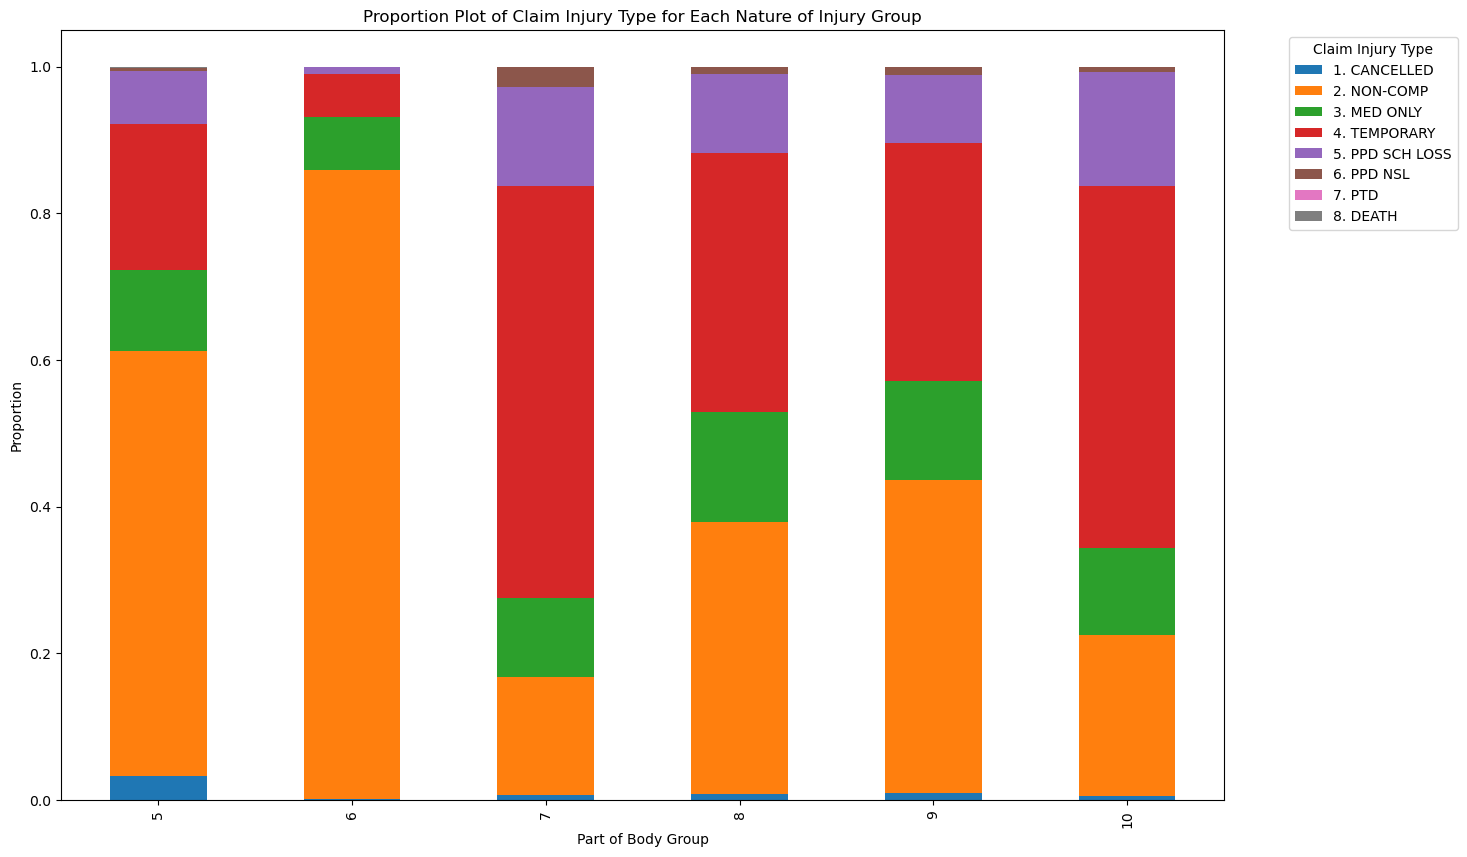

In [91]:
plt.figure(figsize=(15, 10))

# Calculate the proportion
prop_df = df.groupby(['nature_of_injury_group', 'claim_injury_type'], observed=False).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions
prop_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xticks(rotation=90)
plt.title('Proportion Plot of Claim Injury Type for Each Nature of Injury Group')
plt.xlabel('Part of Body Group')
plt.ylabel('Proportion')
plt.legend(title='Claim Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

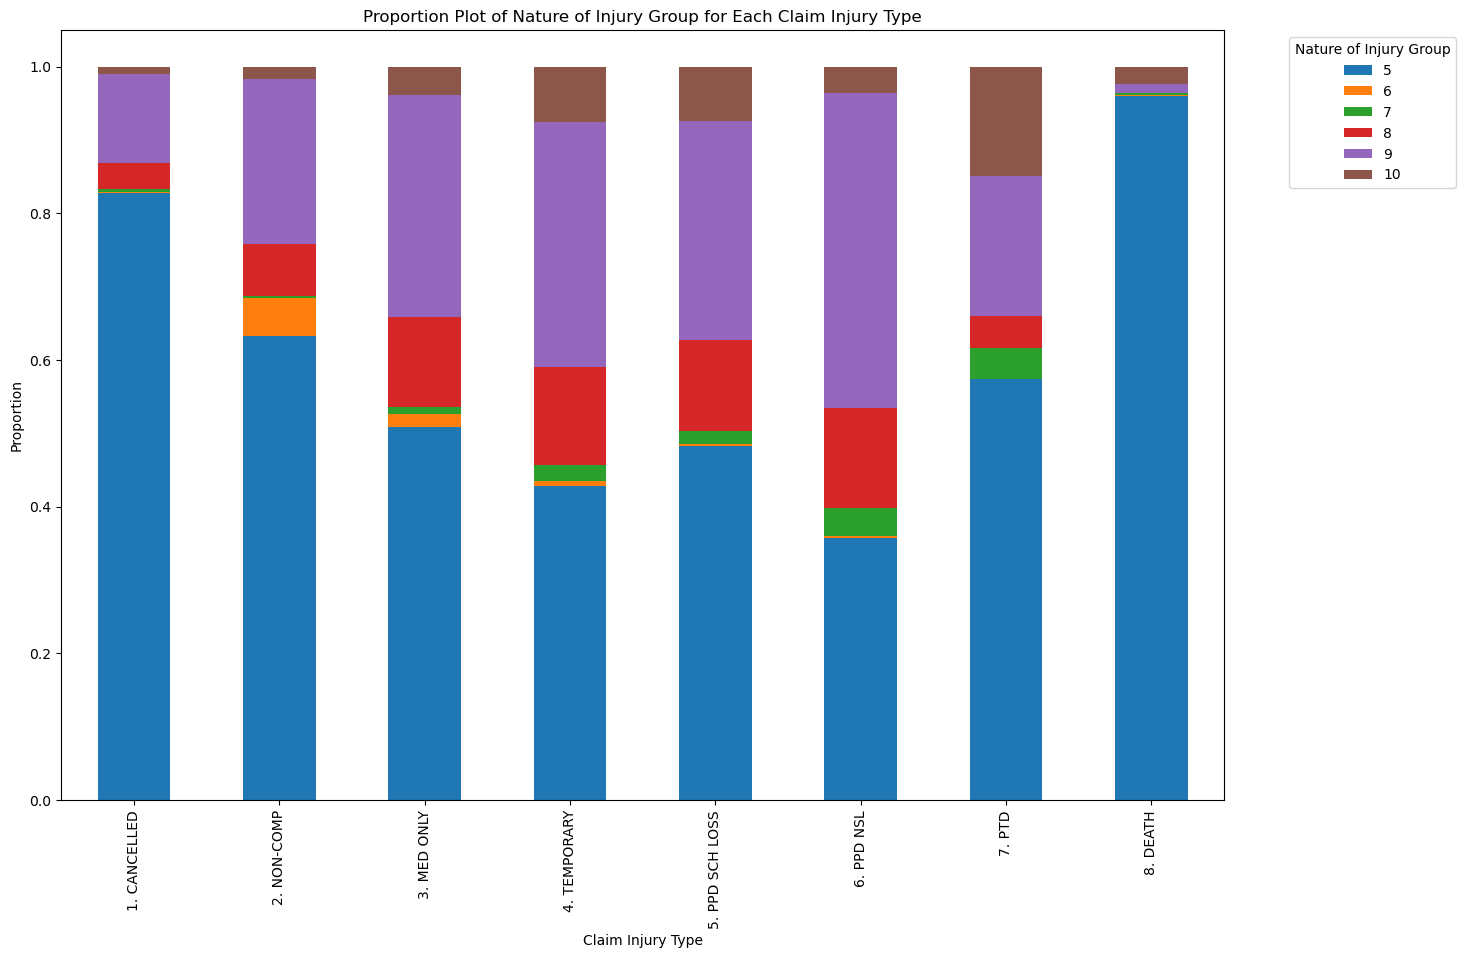

In [92]:
plt.figure(figsize=(15, 10))

# Calculate the proportion
prop_df = df.groupby(['claim_injury_type', 'nature_of_injury_group'], observed=False).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions
prop_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xticks(rotation=90)
plt.title('Proportion Plot of Nature of Injury Group for Each Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Proportion')
plt.legend(title='Nature of Injury Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Checking for NA relevance

In [93]:
df[df['wcio_nature_of_injury_code'].isna()][['wcio_nature_of_injury_code', 'claim_injury_type']].groupby(['wcio_nature_of_injury_code', 'claim_injury_type'],observed=False, dropna=False)['claim_injury_type'].count()

wcio_nature_of_injury_code  claim_injury_type
1.0                         1. CANCELLED            0
                            2. NON-COMP             0
                            3. MED ONLY             0
                            4. TEMPORARY            0
                            5. PPD SCH LOSS         0
                            6. PPD NSL              0
                            8. DEATH                0
2.0                         1. CANCELLED            0
                            2. NON-COMP             0
                            3. MED ONLY             0
                            4. TEMPORARY            0
                            5. PPD SCH LOSS         0
                            6. PPD NSL              0
                            8. DEATH                0
3.0                         1. CANCELLED            0
                            2. NON-COMP             0
                            3. MED ONLY             0
                            4. TEMPO

In [94]:
df[['industry_code', 'industry_code_description']].drop_duplicates().sort_values('industry_code')

industry_code                          industry_code_description
claim_identifier                                                                 
5394863                   11.0         AGRICULTURE, FORESTRY, FISHING AND HUNTING
5394355                   21.0                                             MINING
5394676                   22.0                                          UTILITIES
5393091                   23.0                                       CONSTRUCTION
5394012                   31.0                                      MANUFACTURING
5393828                   32.0                                      MANUFACTURING
5393066                   33.0                                      MANUFACTURING
5394160                   42.0                                    WHOLESALE TRADE
5393875                   44.0                                       RETAIL TRADE
5394026                   45.0                                       RETAIL TRADE
5393811                   48.0                     TRANSPORTATION AND WAREHOUSING
5393857                   49.0                     TRANSPORTATION AND WAREHOUSING
5394187                   51.0                                        INFORMATION
5393959                   52.0                              FINANCE AND INSURANCE
5394129                   53.0                 REAL ESTATE AND RENTAL AND LEASING
5394106                   54.0   PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES
5394222                   55.0            MANAGEMENT OF COMPANIES AND ENTERPRISES
5393889                   56.0  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
5393881                   61.0                               EDUCATIONAL SERVICES
5393887                   62.0                  HEALTH CARE AND SOCIAL ASSISTANCE
5394569                   71.0                ARTS, ENTERTAINMENT, AND RECREATION
5393848                   72.0                    ACCOMMODATION AND FOOD SERVICES
5393823                   81.0      OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)
5393901                   92.0                              PUBLIC ADMINISTRATION
5394018                    NaN                                                NaN

In [95]:
# Mapping with loc to avoid slice copy
df.loc[df['industry_code'].isin([32, 33]), 'industry_code'] = 31
df.loc[df['industry_code'] == 43, 'industry_code'] = 44
df.loc[df['industry_code'] == 49, 'industry_code'] = 48

# Mapping with loc to avoid slice copy
test_df.loc[test_df['industry_code'].isin([32, 33]), 'industry_code'] = 31
test_df.loc[test_df['industry_code'] == 43, 'industry_code'] = 44
test_df.loc[test_df['industry_code'] == 49, 'industry_code'] = 48

Checking for NA relevance

In [96]:
df[df['industry_code'].isna()][['industry_code', 'claim_injury_type']].groupby(['industry_code', 'claim_injury_type'], observed=False, dropna=False)['claim_injury_type'].count()

industry_code  claim_injury_type
11.0           1. CANCELLED            0
               2. NON-COMP             0
               3. MED ONLY             0
               4. TEMPORARY            0
               5. PPD SCH LOSS         0
               6. PPD NSL              0
               8. DEATH                0
21.0           1. CANCELLED            0
               2. NON-COMP             0
               3. MED ONLY             0
               4. TEMPORARY            0
               5. PPD SCH LOSS         0
               6. PPD NSL              0
               8. DEATH                0
22.0           1. CANCELLED            0
               2. NON-COMP             0
               3. MED ONLY             0
               4. TEMPORARY            0
               5. PPD SCH LOSS         0
               6. PPD NSL              0
               8. DEATH                0
23.0           1. CANCELLED            0
               2. NON-COMP             0
               3. MED ON

In [97]:
# And we add this variable to the ccategorical_features list
categorical_features.append('nature_of_injury_group')

In [99]:
# Ensure `test_df` only has columns that are also in `df`
test_df = test_df[test_df.columns.intersection(df.columns)]

## 3.2.4 Word Embedding

Next word embedding is performed using a pretrain model, provided by the FastText API.

Please see:
    A. Joulin, E. Grave, P. Bojanowski, T. Mikolov, Bag of Tricks for Efficient Text Classification
    A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jégou, T. Mikolov, FastText.zip: Compressing text classification models

This model ('dbpedia.bin') was trained on information collected from the Wikipedia website. The general process is to parse the textual variables, by stripping them of non alpha-numerical symbols and converting them to lower_case; then word feature is built into a sentence. Each word in each sentence is checked to see where they sit in the metric embedding (10 dimensional) and their values are averaged, the variance in each dimension (i.e. how much each sentences words point in different directions, denoting ambiguity is also considered), lastly the euclidean norm of the embedding is calculated. 

Our expectation, is that columns, for which's columns were able to form what appears to be meaningfull sentences, with their stop words removed, will them more so than not, point closer to our targets embedded values. To this end, we decided to use the three wcio_description variables. 

In [1]:
import fasttext

# 1. Preprocessing Functions
def remove_numbers_punctuation(text):
    """Remove numbers and punctuation from the text."""
    return re.sub(r'[^a-zA-Z\s_]', '', text)

def to_lowercase(text):
    """Convert text to lowercase."""
    return text.lower()

def to_snake_case(text):
    """Convert text to snake_case."""
    words = text.split()
    return '_'.join(words).lstrip('_')

# 2. FastText Embedding Functions
def extract_embeddings(sentence, model):
    """Extract the word embeddings for a given sentence."""
    words = sentence.split()  # Tokenize sentence into words
    word_vectors = []

    # Get word embeddings for each word
    for word in words:
        try:
            word_vector = model.get_word_vector(word)  # Get word vector from FastText model
            word_vectors.append(word_vector)
        except KeyError:
            continue  # Skip words not in the model's vocabulary
    
    # If no valid word vectors, return None
    if not word_vectors:
        return None
    return np.array(word_vectors)

def compute_embedding_features(word_vectors):
    """Compute the average embedding, variance, and Euclidean norm from word vectors."""
    if word_vectors is None or len(word_vectors) == 0:
        return np.zeros(300), np.zeros(300), 0  # Assuming 300 dimensions for FastText embeddings
    
    # Compute the average embedding (mean across words)
    average_embedding = np.mean(word_vectors, axis=0)
    
    # Compute the variance per dimension
    variance_embedding = np.var(word_vectors, axis=0)
    
    # Compute the Euclidean norm of the average embedding
    euclidean_norm = np.linalg.norm(average_embedding)
    
    return average_embedding, variance_embedding, euclidean_norm

# 3. Main Processing Pipeline
def process_data(train, columns_to_embed, model_path=r'../models/dbpedia.bin'):
    """Preprocess and extract features for the input data using a pretrained FastText model."""
    # Load your FastText model (pretrained, e.g., dbpedia or other embeddings)
    model = fasttext.load_model(model_path)
    
    # Select the features from the training data
    data = train[columns_to_embed].copy()

    # Preserve the original 'claim_identifier' from the train index
    data['claim_identifier'] = train.index  # Using train.index as the 'claim_identifier'

    # Apply text transformations only to non-missing rows
    for col in data.columns:
        if col != 'claim_identifier':  # Don't transform the 'claim_identifier' column
            for idx, value in data[col].items():
                try:
                    if pd.notna(value):  # Check if the value is not NaN
                        value = remove_numbers_punctuation(value)
                        value = to_lowercase(value)
                        data.at[idx, col] = value  # Update the value in the DataFrame
                except Exception as e:
                    print(f"Error processing value '{value}' in column '{col}': {e}")
                    data.at[idx, col] = np.nan  # If error occurs, set value to NaN
                    
    # Concatenate features to prepare for FastText input
    data['text_features'] = data.apply(
        lambda row: ' '.join(str(val) for val in row if val != 'claim_identifier' and pd.notna(val)), 
        axis=1
    )
    
    # Extract word embeddings row-wise
    def compute_features_for_row(row):
        try:
            word_vectors = extract_embeddings(row['text_features'], model)
            return compute_embedding_features(word_vectors)
        except Exception as e:
            print(f"Error computing features for row: {e}")
            dimension = model.get_dimension()
            return (np.zeros(dimension), np.zeros(dimension), 0)

    # Apply row-wise extraction of embeddings and features
    data['embedding_features'] = data.apply(compute_features_for_row, axis=1)
    
    # Separate average embedding dimensions into individual columns
    avg_dim_columns = [f'avg_word_emb_dim_{i}' for i in range(model.get_dimension())]
    data[avg_dim_columns] = pd.DataFrame(data['embedding_features'].map(lambda x: x[0]).tolist(), index=data.index)
    
    # Separate variance embedding dimensions into individual columns
    var_dim_columns = [f'var_word_emb_dim_{i}' for i in range(model.get_dimension())]
    data[var_dim_columns] = pd.DataFrame(data['embedding_features'].map(lambda x: x[1]).tolist(), index=data.index)
    
    # Add Euclidean norm as a single column
    data['euclidean_norm'] = data['embedding_features'].map(lambda x: x[2])
    
    # Drop intermediate columns
    data = data.drop(columns=['text_features', 'embedding_features', 'claim_identifier'] + columns_to_embed)
    
    return data

# 4. Deploy
columns_to_embed = [
    'wcio_cause_of_injury_description',
    'wcio_part_of_body_description',
    'wcio_nature_of_injury_description',
    'industry_code_description'
]

# Process the data and extract the required features
processed_data = process_data(train, columns_to_embed)

# Concatenate the original `train` DataFrame with `processed_data`
train = pd.concat([train, processed_data], axis=1)
train.drop(columns=columns_to_embed, inplace=True)

NameError: name 'train' is not defined

# Taking stock

The set of visualizations below serve as guides, we hope for the feature selection and modelling stage to come.

## Correlation Numerical Features vs Target

In [101]:
# Identify numerical and categorical columns
num_features = df.select_dtypes(include=['float64', 'int64']).columns

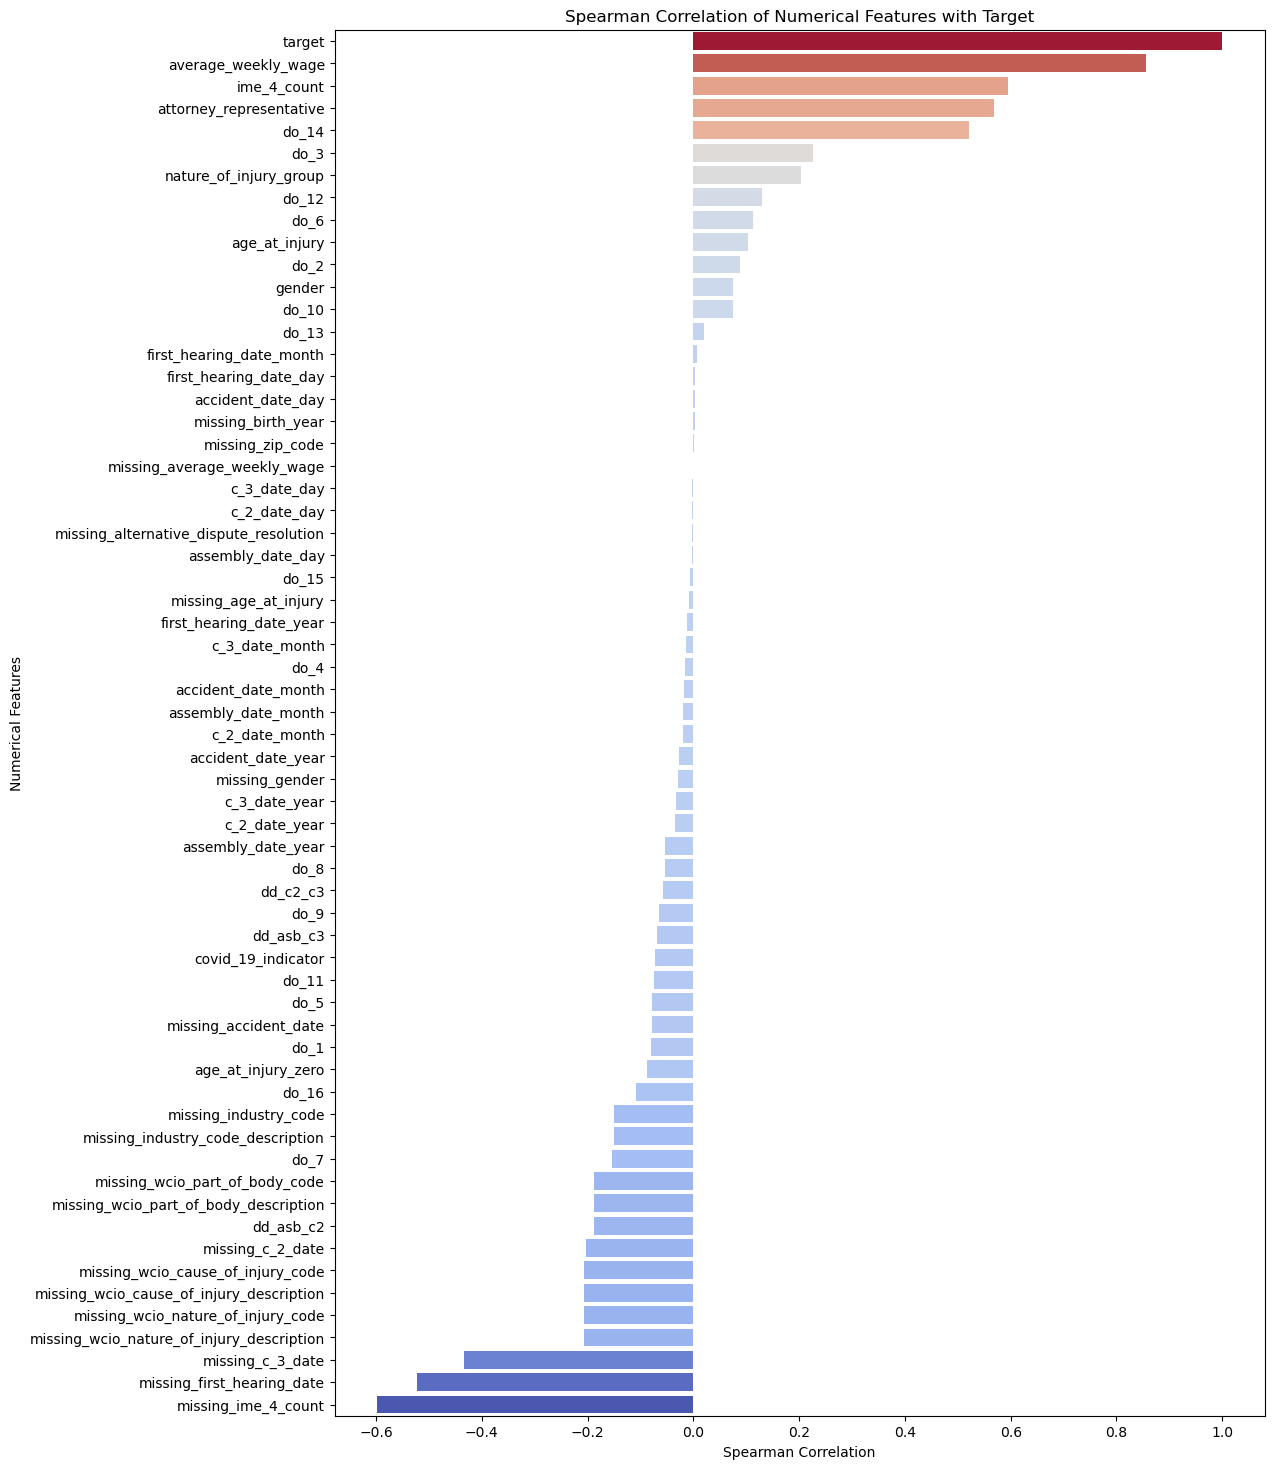

In [102]:
#  Filter out constant columns from numerical features
df_numeric = df[num_features].loc[:, (df[num_features] != df[num_features].iloc[0]).any()]

#  Calculate Spearman correlation of each numerical feature with the target column
df_numeric = df[num_features].loc[:, (df[num_features] != df[num_features].iloc[0]).any()]

# Calculate Spearman correlation of each numerical feature with the target column
spearman_corr_target = df_numeric.corrwith(df['target'], method='spearman').sort_values(ascending=False)

#  Plot the correlations as a bar chart
plt.figure(figsize=(12, 18)) 
sns.barplot(x=spearman_corr_target.values, y=spearman_corr_target.index, hue=spearman_corr_target.values, legend=False, palette='coolwarm')
plt.xlabel("Spearman Correlation")
plt.ylabel("Numerical Features")
plt.title("Spearman Correlation of Numerical Features with Target")
plt.show()


Some features like average_weekly_wage and attorney_representative show a strong positive correlation with the target variable. This suggests that higher values of these features are associated with higher values of the target variable.
While those with strong negative correlations are linked to lower target values. However, it's crucial to remember that correlation does not imply causation.


## Correlation In-Betwwen Numerical Features

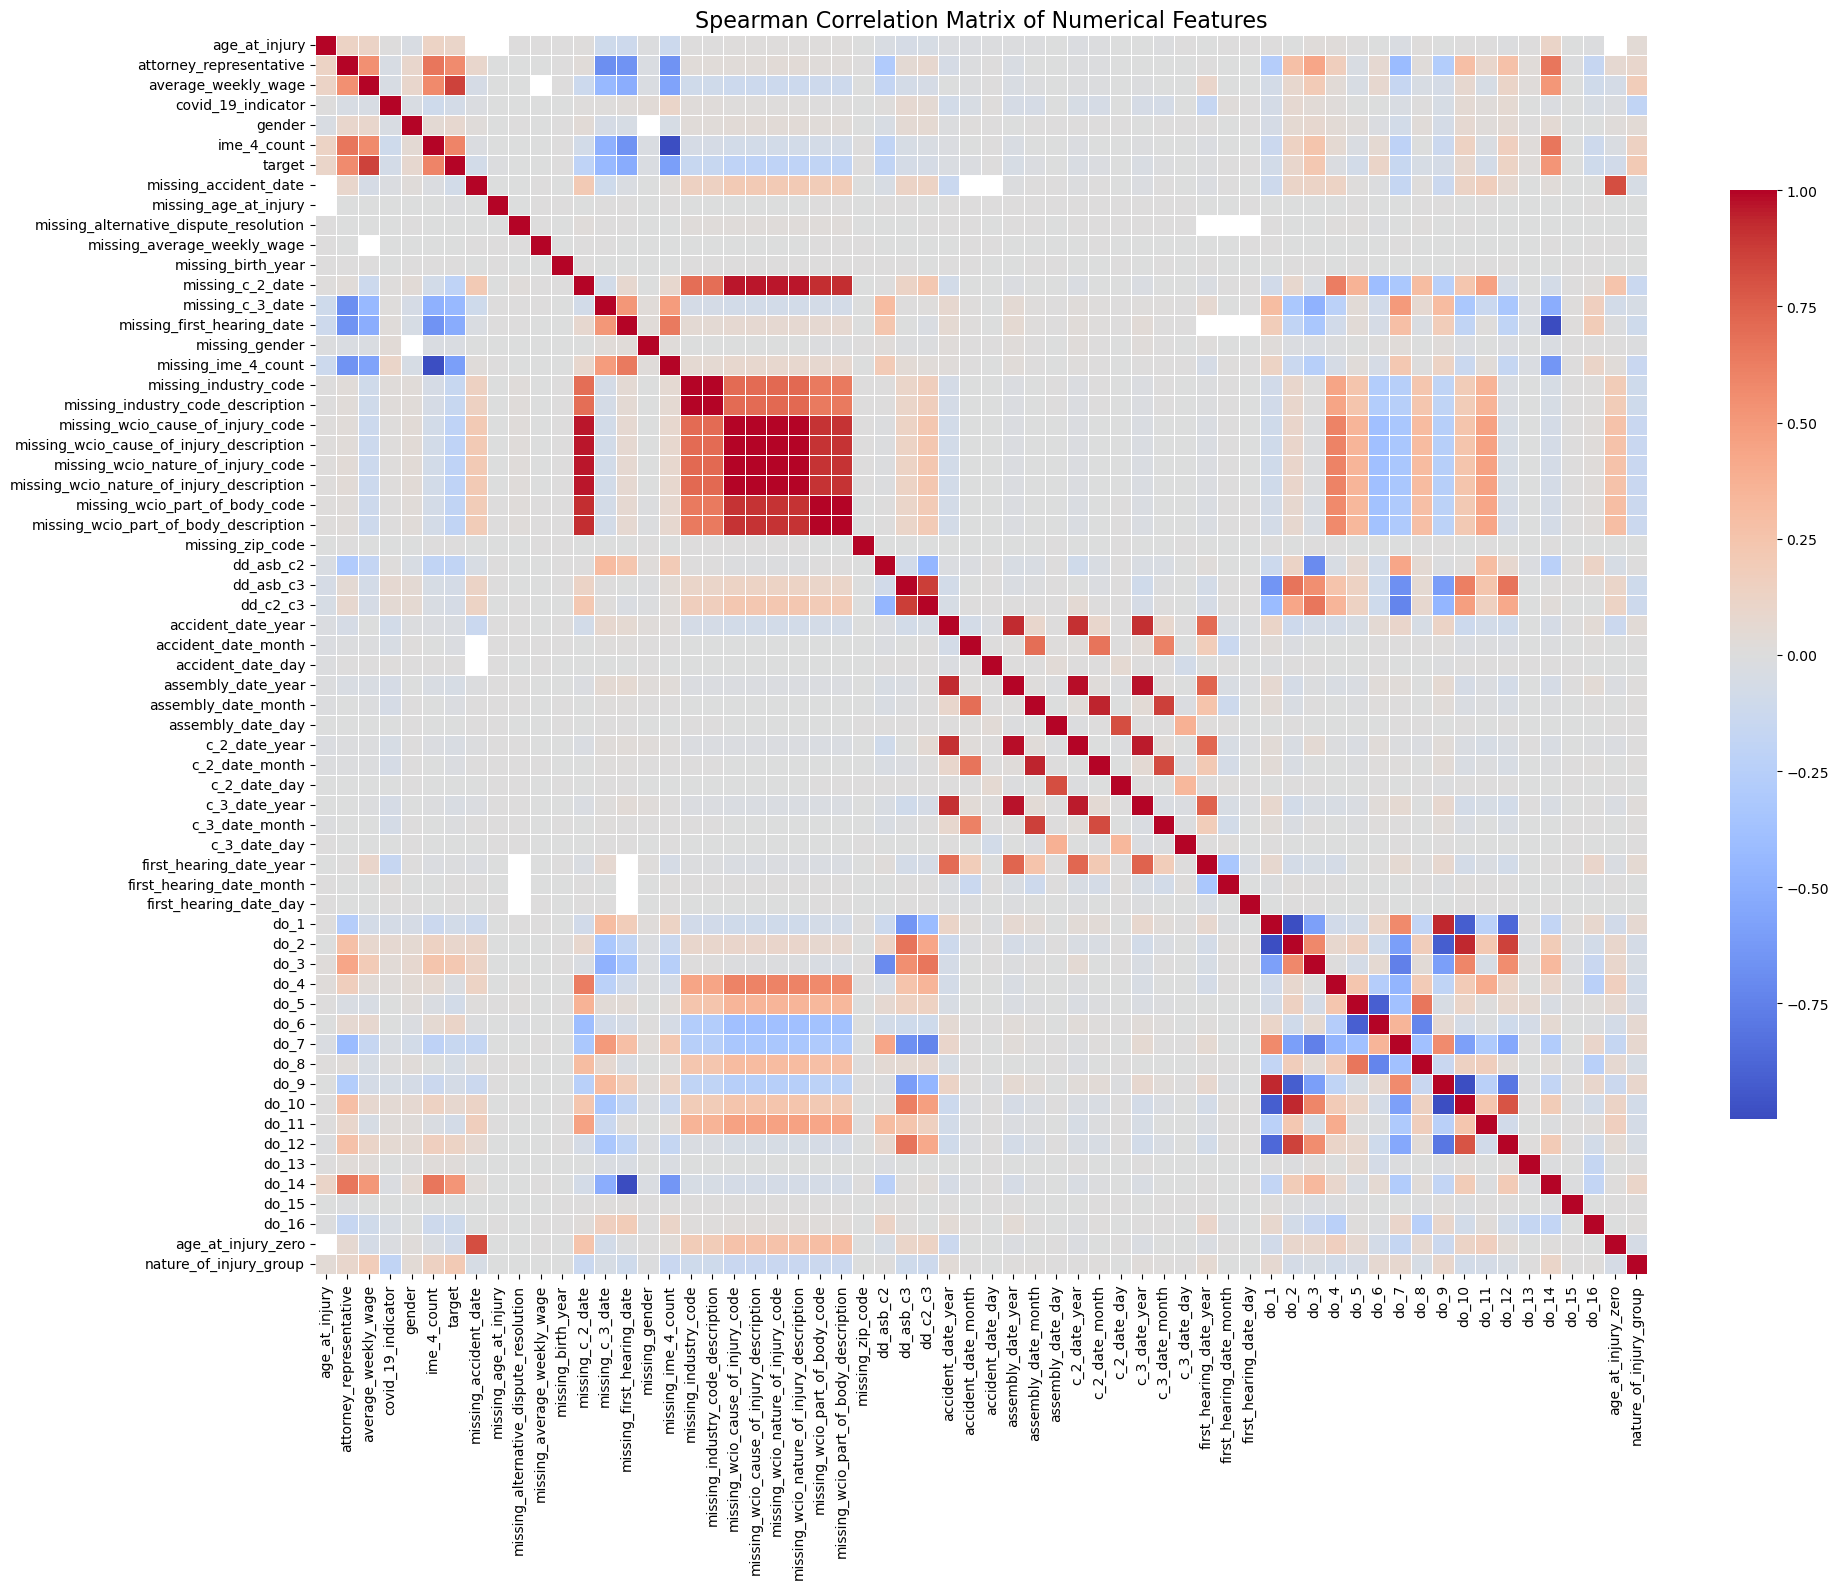

In [103]:
# Select numerical columns
num_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the Spearman correlation matrix
spearman_corr_matrix = num_features.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(20, 16))  # Increase figure size for better readability
sns.heatmap(spearman_corr_matrix, annot=False, cmap='coolwarm', center=0, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .75})

# Adjust axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.title("Spearman Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


The Spearman correlation heatmap reveals several noteworthy relationships among the numerical features in the dataset. Clusters of strong positive correlations (in red) appear among features related to specific dates or event sequences, suggesting that certain temporal variables are interconnected. For example, various date-related fields like accident_date_year, assembly_date_year, and c_date_year display correlations that likely reflect shared yearly trends or cycles in the data. Conversely, some negative correlations (in blue) hint at inverse relationships between certain features, which could indicate that increases in one variable are generally associated with decreases in another

## Correlation between categorical features and the target

In [104]:
cat_features = df.select_dtypes(include=['object', 'category']).columns

In [105]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))


In [106]:
# Calculate Cramér's V for each categorical feature against the target
cramers_v_values = {}
for feature in cat_features:
    cramers_v_values[feature] = cramers_v(df[feature], df['target'])

# Convert results to a DataFrame for easier reading
cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['Cramers V'])
cramers_v_df = cramers_v_df.sort_values(by='Cramers V', ascending=False)

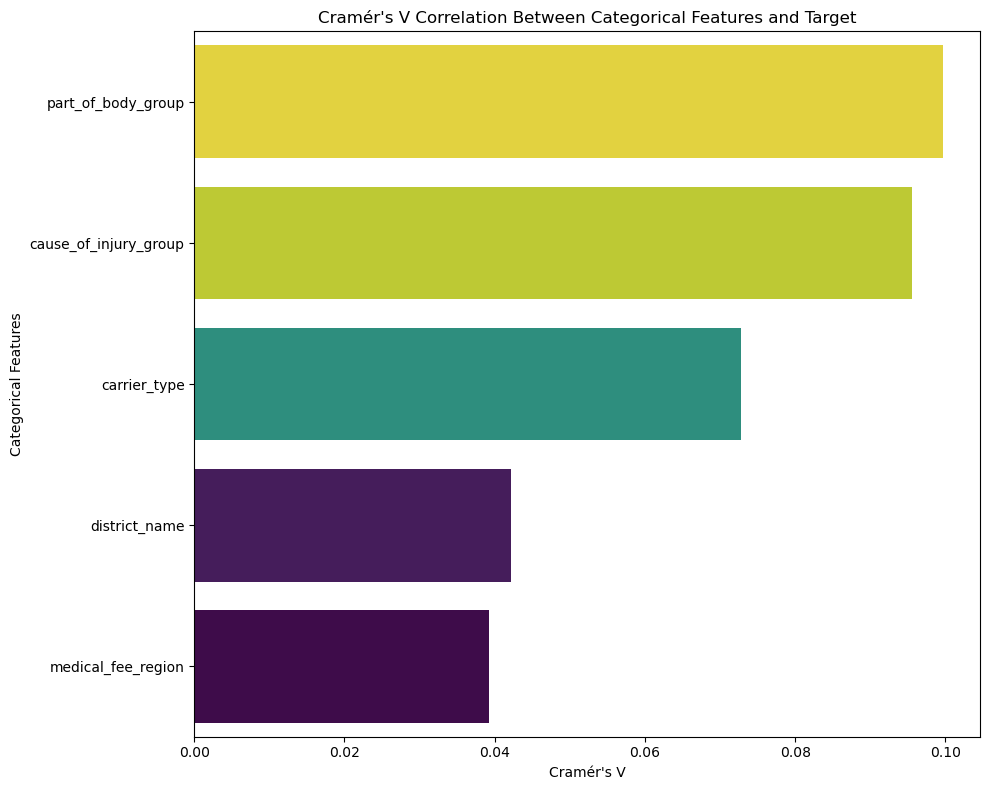

In [107]:
# Plotting 
plt.figure(figsize=(10, 8))
sns.barplot(x=cramers_v_df['Cramers V'][1:], y=cramers_v_df.index[1:], hue=cramers_v_df['Cramers V'][1:],legend=False,  palette='viridis')
plt.title("Cramér's V Correlation Between Categorical Features and Target")
plt.xlabel("Cramér's V")
plt.ylabel("Categorical Features")
plt.tight_layout()
plt.show()

We conclude that our grouping effort was not without merit as we were able to capture much of the relation with the target.

## Correlation In-Between Categorical Variables

In [108]:
# Create a DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=cat_features, columns=cat_features, dtype=float)

# Calculate Cramér's V for each pair of categorical features
for feature1 in cat_features:
    for feature2 in cat_features:
        if feature1 == feature2:
            cramers_v_matrix.loc[feature1, feature2] = 1.0  # Perfect correlation with itself
        else:
            cramers_v_matrix.loc[feature1, feature2] = cramers_v(df[feature1], df[feature2])

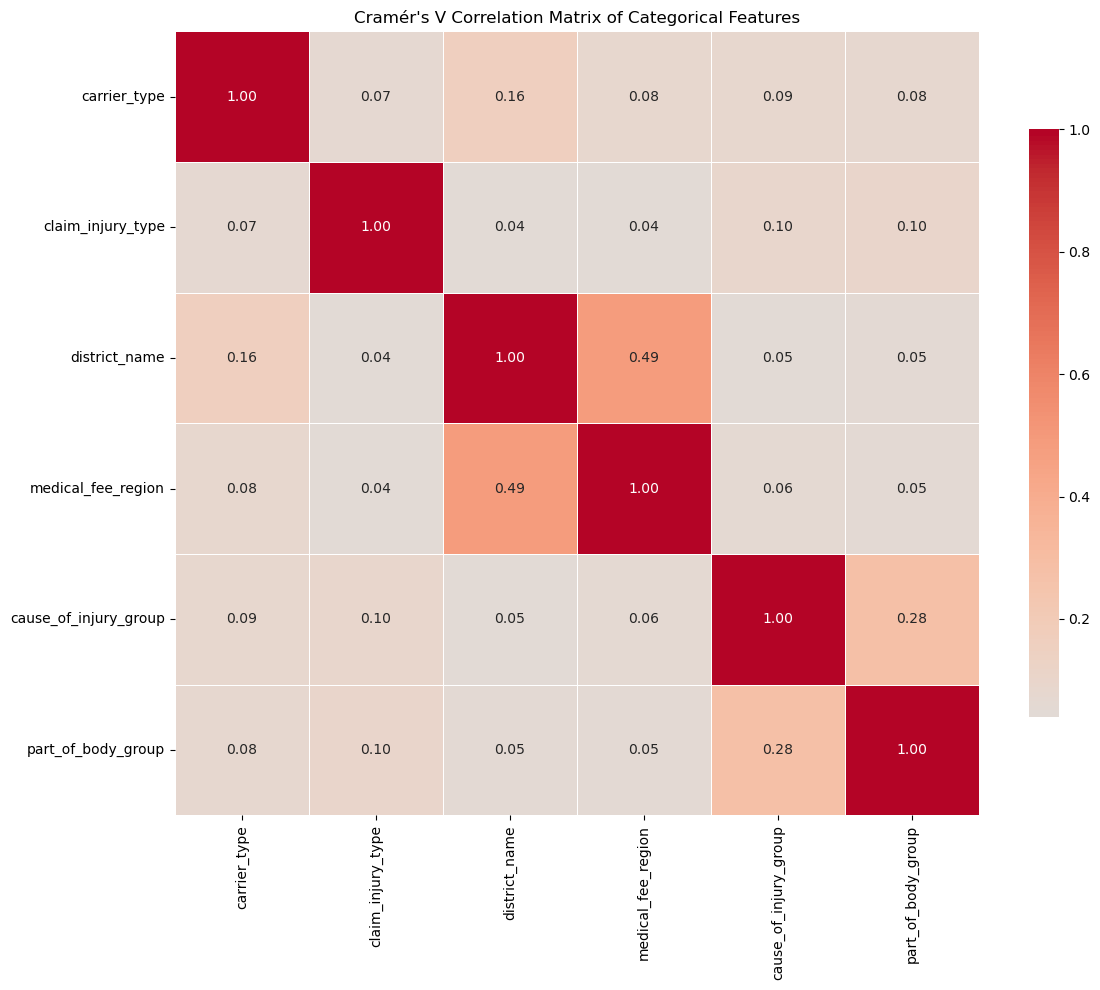

In [109]:
# Plot the Cramér's V correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title("Cramér's V Correlation Matrix of Categorical Features")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Notably, industry_code has a moderate correlation with carrier_type_encoded (0.49), indicating that the type of industry might be associated with the type of carrier involved in the data. Additionally, medical_fee_region shows a moderate correlation with district_name (0.49), suggesting that regional variations may influence medical fee classifications. Other features like wcio_cause_of_injury_code, wcio_nature_of_injury_code, and cause_of_injury_group exhibit moderate associations with one another, which is expected since they all relate to aspects of injury classification.

## In summation... 

In general the low multicolinearity between our features is good, as this is generally beneficial for machine learning models; the fact that our chi-square statistics pointed to relevance with the target, informs us that many of the features capture information about the target. Achieving a high score is therefore a matter of the quality with which our model is able to learn these patterns.